In [401]:
#Load the Package.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import missingno as msn
import warnings
warnings.filterwarnings("ignore")

In [402]:
pd.set_option("Display.max_columns", None)

In [403]:
df = pd.read_table(r'D:\Imarticus Python Project\Python Project - Bank Lending\XYZCorp_LendingData.txt')
print("Dataset has been loaded successfully")

Dataset has been loaded successfully


In [404]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [405]:
#df.to_csv(r"C:\Users\singh\OneDrive\Desktop\HOME DOCUMENTS\Hackathon\CAPSTONE PROJECT\data_full.csv")

In [406]:
df.shape

(855969, 73)

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [408]:
df.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object

In [409]:
print(df.describe())

                 id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.

In [410]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [411]:
for x in df.columns:
    print("Feature Name = {} \nData Type of the Feature is = {} \nTotal Unique Values = {} \nList of Unique Values = {} \n\n".format(x, df[x].dtypes, len(df[x].unique()), 
                                                             df[x].unique()))

Feature Name = id 
Data Type of the Feature is = int64 
Total Unique Values = 855969 
List of Unique Values = [ 1077501  1077430  1077175 ... 36271333 36490806 36271262] 


Feature Name = member_id 
Data Type of the Feature is = int64 
Total Unique Values = 855969 
List of Unique Values = [ 1296599  1314167  1313524 ... 38982739 39222577 38982659] 


Feature Name = loan_amnt 
Data Type of the Feature is = float64 
Total Unique Values = 1368 
List of Unique Values = [ 5000.  2500.  2400. ... 32825. 32575. 34175.] 


Feature Name = funded_amnt 
Data Type of the Feature is = float64 
Total Unique Values = 1368 
List of Unique Values = [ 5000.  2500.  2400. ... 32825. 32575. 34175.] 


Feature Name = funded_amnt_inv 
Data Type of the Feature is = float64 
Total Unique Values = 8818 
List of Unique Values = [ 4975.  2500.  2400. ... 33625. 34125. 30525.] 


Feature Name = term 
Data Type of the Feature is = object 
Total Unique Values = 2 
List of Unique Values = [' 36 months' ' 60 months']

In [412]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df.isnull().sum() / df.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data[missing_data['Total'] > 0]

,Total,Percentage
dti_joint,855529,99.95
verification_status_joint,855527,99.95
annual_inc_joint,855527,99.95
il_util,844360,98.64
mths_since_rcnt_il,843035,98.49
total_bal_il,842681,98.45
inq_last_12m,842681,98.45
open_acc_6m,842681,98.45
open_il_6m,842681,98.45
open_il_24m,842681,98.45


In [413]:
#Make a copy of the original dataset to work upon
df_new = pd.DataFrame(df)
df_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [414]:
print("Before dropping column shape of the Data is: ", df.shape)
df = df.drop(['il_util', 'mths_since_rcnt_il', 'total_bal_il', 'inq_last_12m', 'open_acc_6m', 'open_il_6m',
             'open_il_24m', 'open_il_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
             'total_cu_tl', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog'], axis = 1)
print("After dropping column shape of the Data is: ", df.shape)

Before dropping column shape of the Data is:  (855969, 73)
After dropping column shape of the Data is:  (855969, 56)


In [415]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df.isnull().sum() / df.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data[missing_data['Total'] > 0]

,Total,Percentage
dti_joint,855529,99.95
verification_status_joint,855527,99.95
annual_inc_joint,855527,99.95
mths_since_last_delinq,439812,51.38
next_pymnt_d,252971,29.55
tot_cur_bal,67313,7.86
tot_coll_amt,67313,7.86
total_rev_hi_lim,67313,7.86
emp_title,49443,5.78
emp_length,43061,5.03


In [416]:
colname_cat = []
for x in df.columns:
    if df[x].dtype == "object":
        colname_cat.append(x)
print("Total Categorical Data: ", len(colname_cat))
print()
for i in colname_cat:
    print(i)

Total Categorical Data:  20

term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
pymnt_plan
purpose
title
zip_code
addr_state
earliest_cr_line
initial_list_status
last_pymnt_d
next_pymnt_d
last_credit_pull_d
application_type
verification_status_joint


In [417]:
colname_num = []
for y in df.columns:
    if df[y].dtype != "object":
        colname_num.append(y)
print("Total Numerical Data: ", len(colname_num))
print()
for i in colname_num:
    print(i)

Total Numerical Data:  36

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
collections_12_mths_ex_med
policy_code
annual_inc_joint
dti_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
default_ind


### Divide the Dataset into TRAIN and TEST

In [418]:
df['issue_d'].dtype

dtype('O')

In [419]:
df['issue_d']

0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
            ...   
855964    Jan-2015
855965    Jan-2015
855966    Jan-2015
855967    Jan-2015
855968    Jan-2015
Name: issue_d, Length: 855969, dtype: object

In [420]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
print(df['issue_d'].dtype)
print()
df['issue_d']

datetime64[ns]



0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
855964   2015-01-01
855965   2015-01-01
855966   2015-01-01
855967   2015-01-01
855968   2015-01-01
Name: issue_d, Length: 855969, dtype: datetime64[ns]

In [421]:
df_train = df[df['issue_d'] <= '2015-05-01']
df_test = df[df['issue_d'] >= '2015-06-01']

In [422]:
print(df_train.shape, df_test.shape)

(598978, 56) (256991, 56)


In [423]:
(df_train.shape[0] + df_test.shape[0]) - df.shape[0]

0

In [424]:
df_test['issue_d'].unique()

array(['2015-12-01T00:00:00.000000000', '2015-11-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000'], dtype='datetime64[ns]')

## EDA & VISUALIZATION 

TERM

In [425]:
df_train.term.value_counts()

 36 months    427239
 60 months    171739
Name: term, dtype: int64

In [426]:
pd.crosstab(df_train.term, df_train.default_ind)

default_ind,0,1
term,,
36 months,397634,29605
60 months,155188,16551


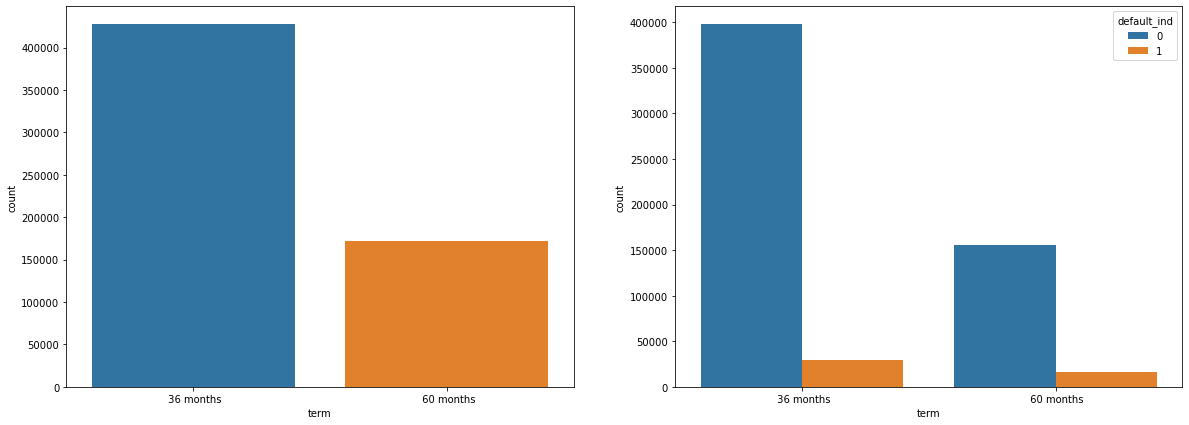

In [427]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_train.term)
plt.subplot(122)
sns.countplot("term", data = df_train, hue = "default_ind")
plt.show()

Grade = XYZ corp. assigned loan grade

In [428]:
df_train.grade.value_counts()

B    173419
C    163121
A    100727
D     96354
E     45902
F     15689
G      3766
Name: grade, dtype: int64

In [429]:
df_test.grade.value_counts()

B    74579
C    73734
A    44938
D    36448
E    20546
F     5639
G     1107
Name: grade, dtype: int64

In [430]:
pd.crosstab(df_train.grade, df_train.default_ind)

default_ind,0,1
grade,,
A,98078,2649
B,163749,9670
C,150191,12930
D,85638,10716
E,39498,6404
F,12706,2983
G,2962,804


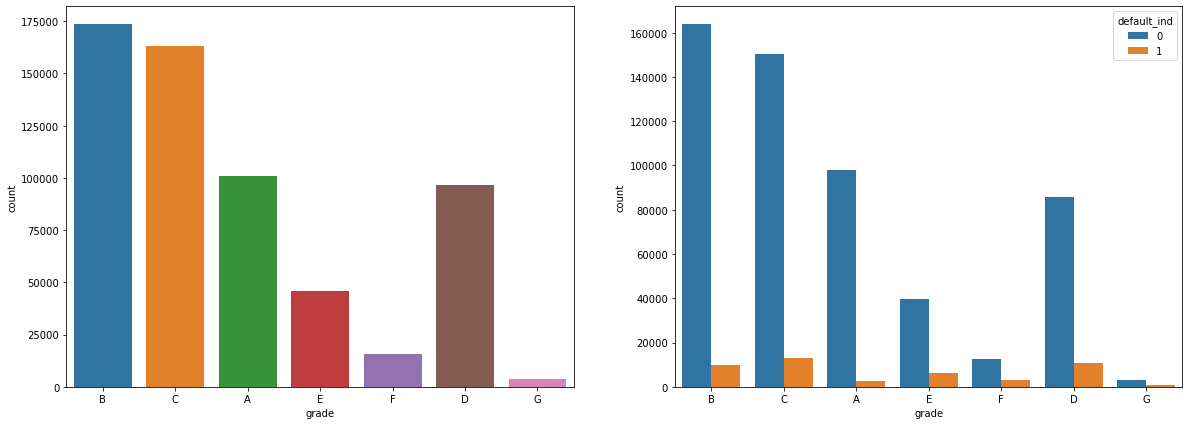

In [431]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_train.grade)
plt.subplot(122)
sns.countplot("grade", data = df_train, hue = "default_ind")
plt.show()

In [432]:
df_train.sub_grade.value_counts()

B3    39269
B4    38735
C1    35306
C2    34923
B2    33329
C3    33020
B5    32735
C4    31765
A5    30307
B1    29351
C5    28107
A4    25170
D1    24542
D2    20997
D3    18547
D4    17638
A3    16473
A2    15089
D5    14630
A1    13688
E1    11870
E2    11074
E3     9055
E4     7586
E5     6317
F1     4762
F2     3571
F3     3118
F4     2431
F5     1807
G1     1307
G2      956
G3      673
G4      451
G5      379
Name: sub_grade, dtype: int64

In [433]:
len(df_train.sub_grade.unique())

35

In [434]:
len(df_test.sub_grade.unique())

35

Employee_Title = The job title supplied by the Borrower when applying for the loan.

In [435]:
len(df_train.emp_title.unique())

235313

In [436]:
len(df_test.emp_title.unique())

81157

In [437]:
len(df.emp_title.unique())

290913

In [438]:
print(df.emp_title.isnull().sum(), df_train.emp_title.isnull().sum(), df_test.emp_title.isnull().sum())

49443 34465 14978


EMPLOYEE LENGTH = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [439]:
df_train.emp_length.value_counts()

10+ years    195407
2 years       53373
3 years       47128
< 1 year      46526
5 years       38429
1 year        37879
4 years       35792
7 years       32676
6 years       31338
8 years       29126
9 years       23199
Name: emp_length, dtype: int64

In [440]:
df_test.emp_length.value_counts()

10+ years    86683
2 years      22613
< 1 year     21071
3 years      20264
1 year       16976
5 years      15383
4 years      14851
8 years      13295
7 years      10528
9 years      10263
6 years      10108
Name: emp_length, dtype: int64

In [441]:
print(len(df_train.emp_length.unique()), len(df_test.emp_length.unique()))

12 12


In [442]:
# Removing years 
df_train.emp_length = df_train.emp_length.str.rsplit(' ',1).str[0]

# Removing irrelevant characters like <, +
df_train.emp_length = df_train.emp_length.replace("10+", "10")
df_train.emp_length = df_train.emp_length.replace("< 1", "0.5")
print(df_train.emp_length.value_counts())
print(df_train.emp_length.dtype)

10     195407
2       53373
3       47128
0.5     46526
5       38429
1       37879
4       35792
7       32676
6       31338
8       29126
9       23199
Name: emp_length, dtype: int64
object


In [443]:
# Removing years 
df_test.emp_length = df_test.emp_length.str.rsplit(' ',1).str[0]

# Removing irrelevant characters like <, +
df_test.emp_length = df_test.emp_length.replace("10+", "10")
df_test.emp_length = df_test.emp_length.replace("< 1", "0.5")
print(df_test.emp_length.value_counts())
print(df_test.emp_length.dtype)

10     86683
2      22613
0.5    21071
3      20264
1      16976
5      15383
4      14851
8      13295
7      10528
9      10263
6      10108
Name: emp_length, dtype: int64
object


In [444]:
pd.crosstab(df_train.default_ind, df_train.emp_length)

emp_length,0.5,1,10,2,3,4,5,6,7,8,9
default_ind,,,,,,,,,,,
0,42612,34847,181985,49277,43516,32967,35173,28589,30016,26920,21387
1,3914,3032,13422,4096,3612,2825,3256,2749,2660,2206,1812


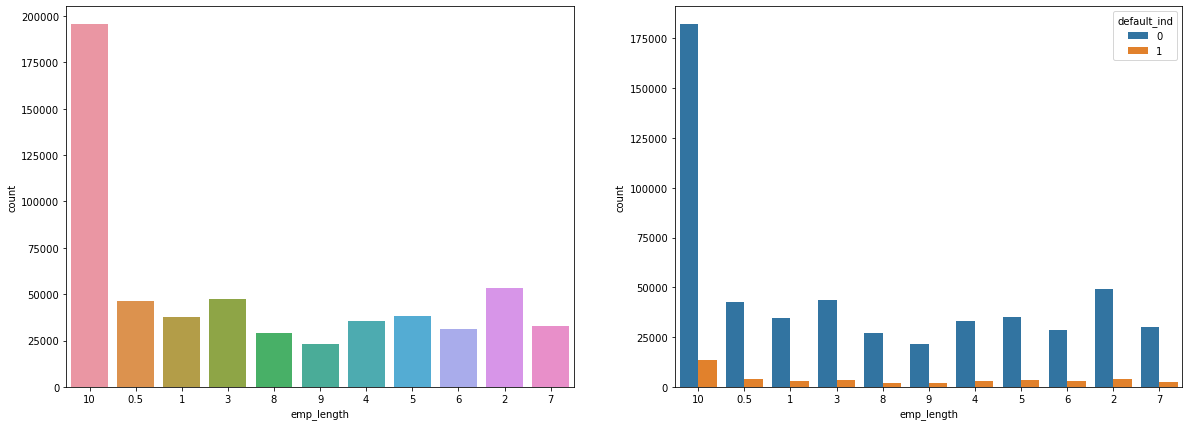

In [445]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_train.emp_length)
plt.subplot(122)
sns.countplot("emp_length", data = df_train, hue = "default_ind")
plt.show()

In [446]:
df_train['emp_length'].dtype

dtype('O')

In [447]:
df_train['emp_length'] = df_train['emp_length'].astype("float")
print(df_train.emp_length.dtype)
print()
df_train.emp_length.value_counts()

float64



10.0    195407
2.0      53373
3.0      47128
0.5      46526
5.0      38429
1.0      37879
4.0      35792
7.0      32676
6.0      31338
8.0      29126
9.0      23199
Name: emp_length, dtype: int64

In [448]:
df_test['emp_length'] = df_test['emp_length'].astype("float")
print(df_test.emp_length.dtype)
print()
df_test.emp_length.value_counts()

float64



10.0    86683
2.0     22613
0.5     21071
3.0     20264
1.0     16976
5.0     15383
4.0     14851
8.0     13295
7.0     10528
9.0     10263
6.0     10108
Name: emp_length, dtype: int64

In [449]:
df_train.emp_length.isnull().sum()

28105

In [450]:
df_test.emp_length.isnull().sum()

14956

In [451]:
df_train.emp_length.fillna(10.0, inplace = True)
df_test.emp_length.fillna(10.0, inplace = True)

In [452]:
df_train.emp_length.isnull().sum()

0

In [453]:
df_test.emp_length.isnull().sum()

0

home_ownership = The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [454]:
df_train.home_ownership.value_counts()

MORTGAGE    301448
RENT        241692
OWN          55648
OTHER          144
NONE            45
ANY              1
Name: home_ownership, dtype: int64

In [455]:
df_test.home_ownership.value_counts()

MORTGAGE    127658
RENT        100843
OWN          28488
ANY              2
Name: home_ownership, dtype: int64

In [456]:
df_train.home_ownership = df_train.home_ownership.replace("NONE", "OTHER")
df_train.home_ownership = df_train.home_ownership.replace("ANY", "OTHER")
df_train.home_ownership.value_counts()

MORTGAGE    301448
RENT        241692
OWN          55648
OTHER          190
Name: home_ownership, dtype: int64

In [457]:
df_test.home_ownership = df_test.home_ownership.replace("ANY", "OTHER")
df_test.home_ownership.value_counts()

MORTGAGE    127658
RENT        100843
OWN          28488
OTHER            2
Name: home_ownership, dtype: int64

In [458]:
df_train.verification_status.value_counts()

Source Verified    210453
Verified           203959
Not Verified       184566
Name: verification_status, dtype: int64

In [459]:
df_test.verification_status.value_counts()

Source Verified    107725
Verified            76090
Not Verified        73176
Name: verification_status, dtype: int64

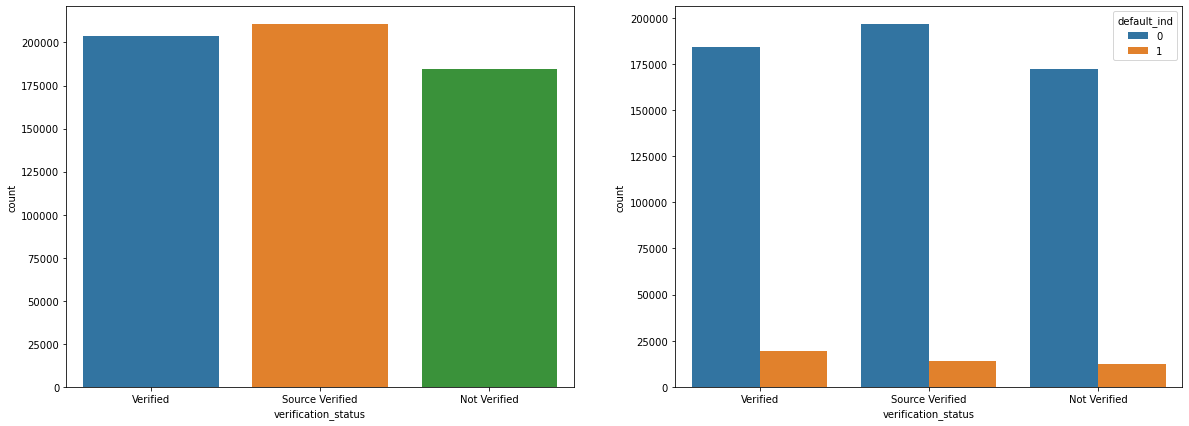

In [460]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_train.verification_status)
plt.subplot(122)
sns.countplot("verification_status", data = df_train, hue = "default_ind")
plt.show()

Payment Plan = Indicates if a payment plan has been put in place for the loan

In [461]:
df_train.pymnt_plan.value_counts()

n    598973
y         5
Name: pymnt_plan, dtype: int64

In [462]:
df_test.pymnt_plan.value_counts()

n    256991
Name: pymnt_plan, dtype: int64

Purpose = Category provided by borrower for loan request

In [463]:
df_train.purpose.value_counts()

debt_consolidation    356155
credit_card           135758
home_improvement       33805
other                  29008
major_purchase         11883
small_business          7800
car                     6401
medical                 5644
moving                  3676
vacation                3143
house                   2685
wedding                 2279
renewable_energy         415
educational              326
Name: purpose, dtype: int64

In [464]:
df_test.purpose.value_counts()

debt_consolidation    149237
credit_card            64386
home_improvement       16151
other                  11941
major_purchase          4704
medical                 2549
car                     2192
small_business          1985
moving                  1484
vacation                1399
house                    828
renewable_energy         134
wedding                    1
Name: purpose, dtype: int64

In [465]:
print(len(df_train.purpose.unique()), len(df_test.purpose.unique()))

14 13


Title = The loan title provided by the borrower

In [466]:
len(df_train.title.unique())

60991

In [467]:
len(df_test.title.unique())

15

In [468]:
len(df.title.unique())

60992

In [469]:
df.title.isnull().sum()

33

ZIP CODE = The first 3 numbers of the zip code provided by the borrower in the loan application.

In [470]:
print(len(df.zip_code.unique()), len(df_train.zip_code.unique()), len(df_test.zip_code.unique()))

931 901 900


Address State = The state provided by the borrower in the loan application

In [471]:
len(df_train.addr_state.unique())

50

In [472]:
len(df_test.addr_state.unique())

49

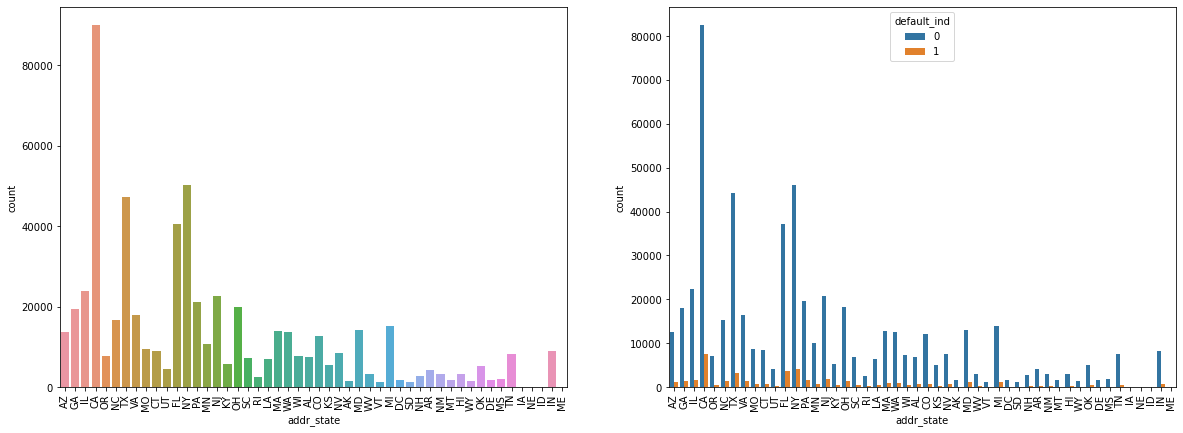

In [473]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_train.addr_state)
plt.xticks(rotation = 90)
plt.subplot(122)
sns.countplot("addr_state", data = df_train, hue = "default_ind")
plt.xticks(rotation = 90)
plt.show()

Ealries credit line = The month the borrower's earliest reported credit line was opened

In [474]:
len(df_train.earliest_cr_line.unique())

677

In [475]:
len(df_test.earliest_cr_line.unique())

655

Initial List Status = The initial listing status of the loan. Possible values are – W, F

In [476]:
df_train.initial_list_status.value_counts()

f    361847
w    237131
Name: initial_list_status, dtype: int64

In [477]:
df_test.initial_list_status.value_counts()

w    176283
f     80708
Name: initial_list_status, dtype: int64

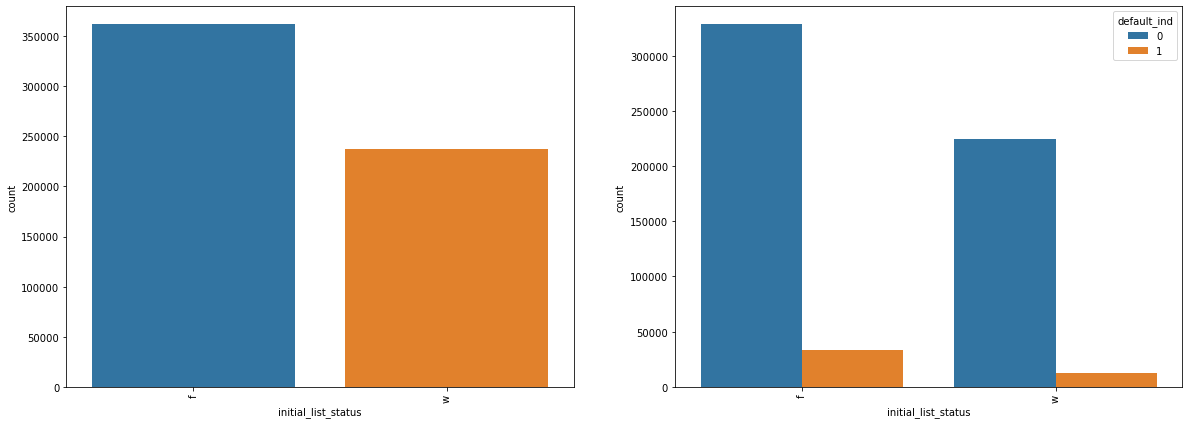

In [478]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_train.initial_list_status)
plt.xticks(rotation = 90)
plt.subplot(122)
sns.countplot("initial_list_status", data = df_train, hue = "default_ind")
plt.xticks(rotation = 90)
plt.show()

Last Payment Date = Last Month Payment was received                                                                          
Next Payment Date = Next Scheduled Payment date

In [479]:
print(df_train.last_pymnt_d.isnull().sum())
print(df_test.last_pymnt_d.isnull().sum())
print(df_train.next_pymnt_d.isnull().sum())
print(df_test.next_pymnt_d.isnull().sum())

456
8406
244687
8284


In [480]:
df_train['last_pymnt_d'].fillna(df_train.last_pymnt_d.mode()[0], inplace = True)
df_train['next_pymnt_d'].fillna(df_train.next_pymnt_d.mode()[0], inplace = True)
print(df_train.last_pymnt_d.isnull().sum())
print(df_train.next_pymnt_d.isnull().sum())

0
0


In [481]:
df_test['last_pymnt_d'].fillna(df_test.last_pymnt_d.mode()[0], inplace = True)
df_test['next_pymnt_d'].fillna(df_test.next_pymnt_d.mode()[0], inplace = True)
print(df_test.last_pymnt_d.isnull().sum())
print(df_test.next_pymnt_d.isnull().sum())

0
0


Last Credit Pull date = The most recent month XYZ corp. pulled credit for this loan

In [482]:
df_train.last_credit_pull_d.isnull().sum()

43

In [483]:
df_test.last_credit_pull_d.isnull().sum()

7

In [484]:
df_train['last_credit_pull_d'].fillna(df_train.last_credit_pull_d.mode()[0], inplace = True)
print(df_train.last_credit_pull_d.isnull().sum())
print()
df_test['last_credit_pull_d'].fillna(df_test.last_credit_pull_d.mode()[0], inplace = True)
df_test.last_credit_pull_d.isnull().sum()

0



0

Application Type = Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [485]:
df_train.application_type.value_counts()

INDIVIDUAL    598978
Name: application_type, dtype: int64

In [486]:
df_test.application_type.value_counts()

INDIVIDUAL    256549
JOINT            442
Name: application_type, dtype: int64

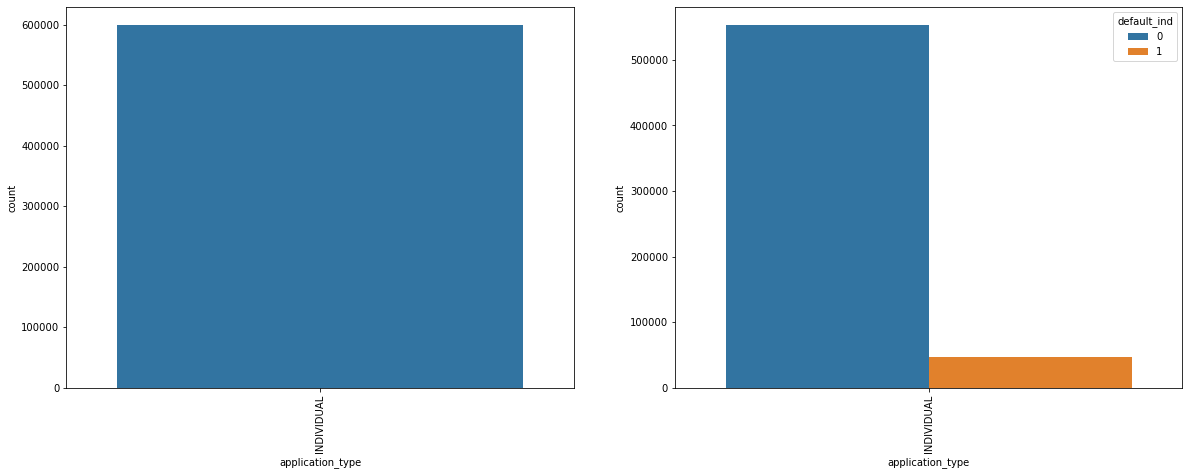

In [487]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_train.application_type)
plt.xticks(rotation = 90)
plt.subplot(122)
sns.countplot("application_type", data = df_train, hue = "default_ind")
plt.xticks(rotation = 90)
plt.show()

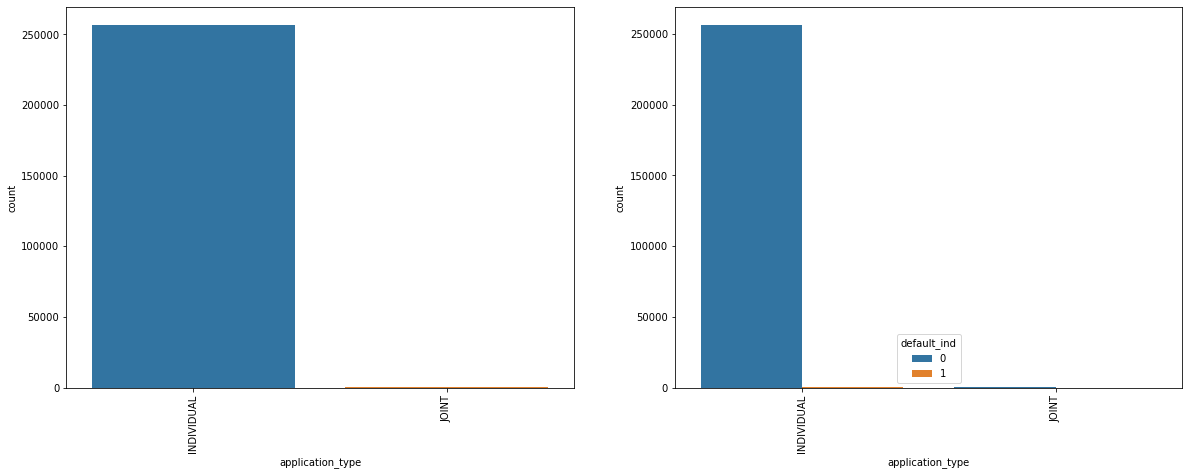

In [488]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.countplot(df_test.application_type)
plt.xticks(rotation = 90)
plt.subplot(122)
sns.countplot("application_type", data = df_test, hue = "default_ind")
plt.xticks(rotation = 90)
plt.show()

In [489]:
colname_num

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'default_ind']

ID = A unique assigned ID for the loan listing.                                                                                   
MEMBER_ID = A unique Id for the borrower member.

In [490]:
print(len(df_train.id.unique()))
print(len(df_train.member_id.unique()))
print(len(df_test.id.unique()))
print(len(df_test.member_id.unique()))

598978
598978
256991
256991


Loan Amount = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [491]:
df_train.loan_amnt.describe()

count    598978.000000
mean      14540.642519
std        8336.476483
min         500.000000
25%        8000.000000
50%       12600.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [492]:
print("Skewness: ", round(df_train.loan_amnt.skew(),2))
print("Kurtosis: ", round(df_train.loan_amnt.kurt(),2))

Skewness:  0.71
Kurtosis:  -0.19


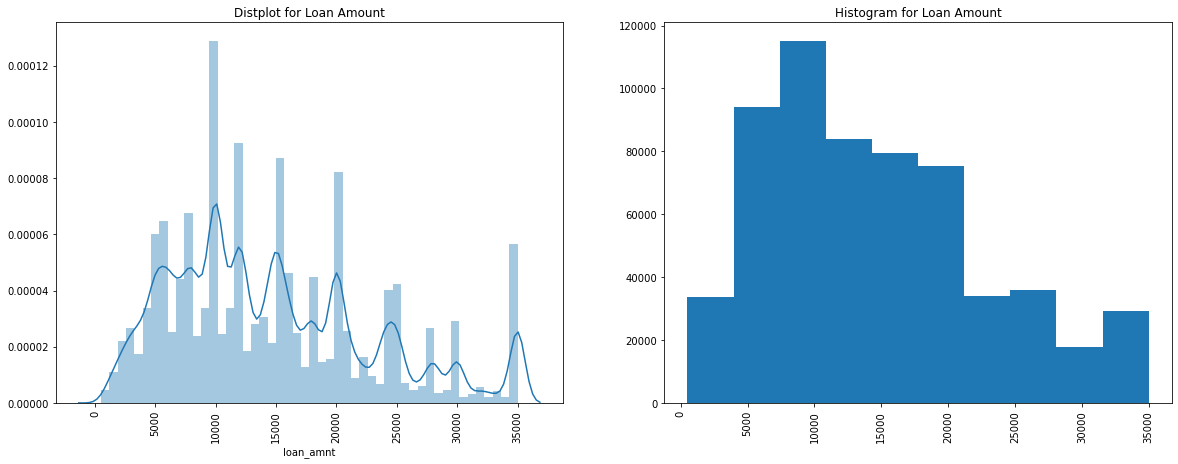

In [493]:
plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.distplot(df_train.loan_amnt)
plt.title("Distplot for Loan Amount")
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.loan_amnt)
plt.title("Histogram for Loan Amount")
plt.xticks(rotation = 90)
plt.show()

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

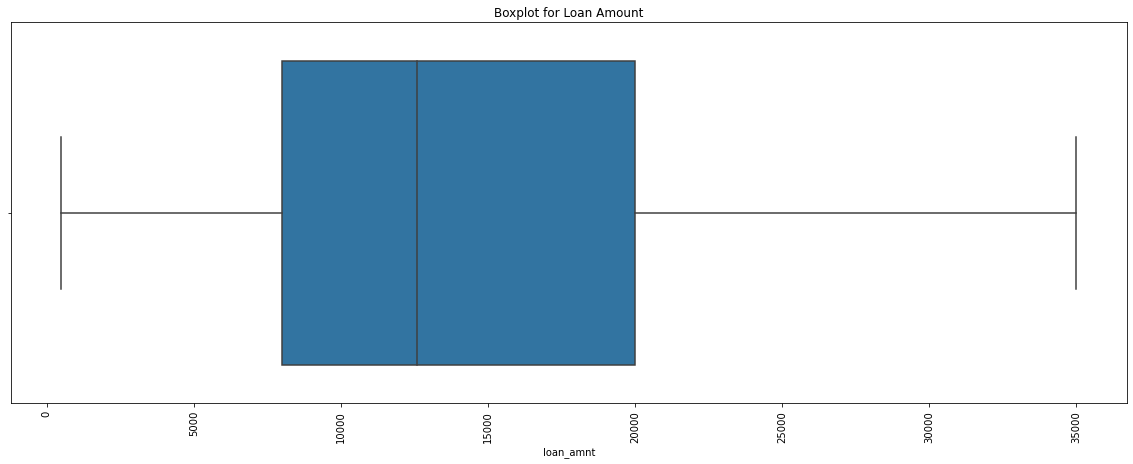

In [494]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.loan_amnt)
plt.title("Boxplot for Loan Amount")
plt.xticks(rotation = 90)

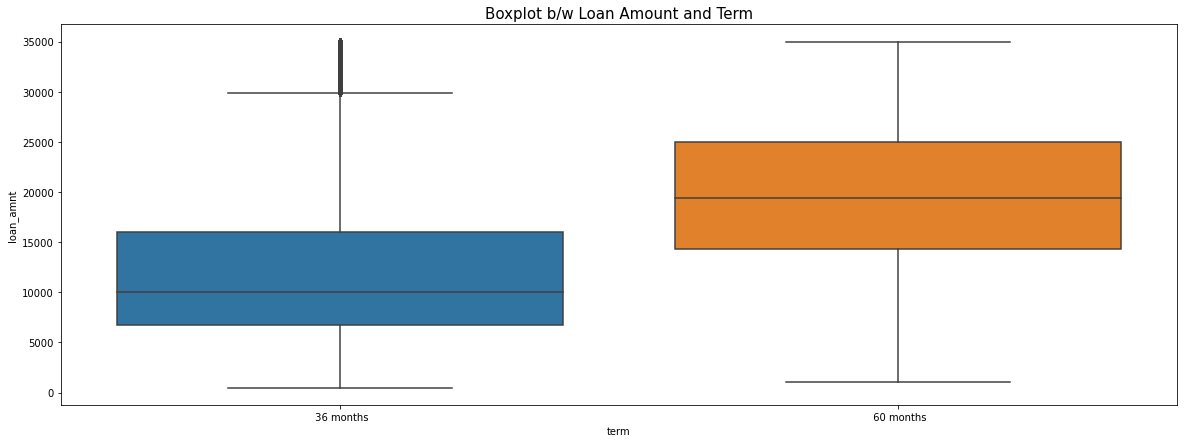

In [495]:
plt.figure(figsize=(20, 7))
sns.boxplot(x=df_train.term, y=df_train.loan_amnt)
plt.title("Boxplot b/w Loan Amount and Term", size = 15)
plt.show()

Funded Amount = The total amount committed to that loan at that point in time.

In [496]:
df_train.funded_amnt.describe()

count    598978.000000
mean      14521.789031
std        8327.529212
min         500.000000
25%        8000.000000
50%       12525.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [497]:
print("Skewness: ", round(df_train.funded_amnt.skew(),2))
print("Kurtosis: ", round(df_train.funded_amnt.kurt(),2))

Skewness:  0.71
Kurtosis:  -0.18


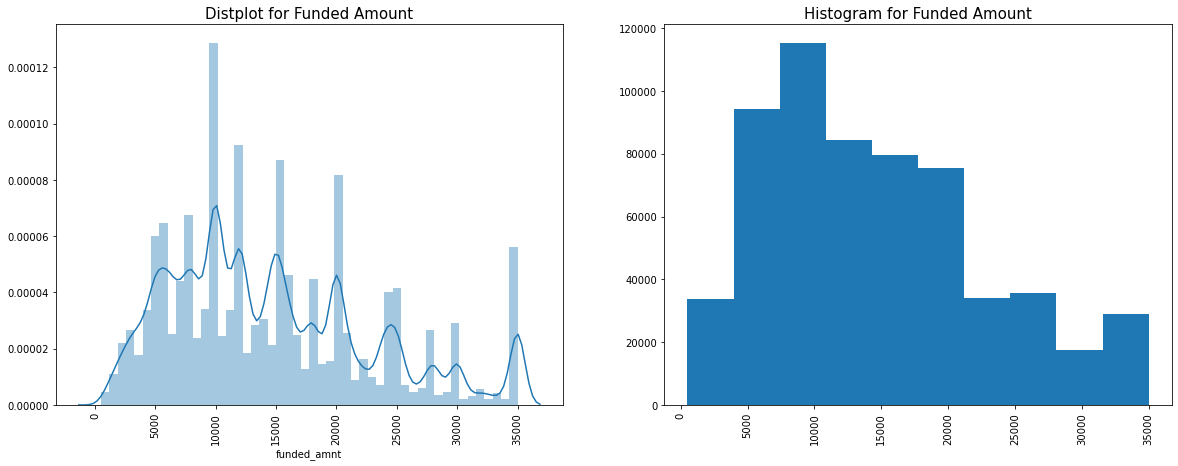

In [498]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.funded_amnt)
plt.title("Distplot for Funded Amount", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.funded_amnt)
plt.xticks(rotation = 90)
plt.title("Histogram for Funded Amount", size = 15)
plt.show()

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

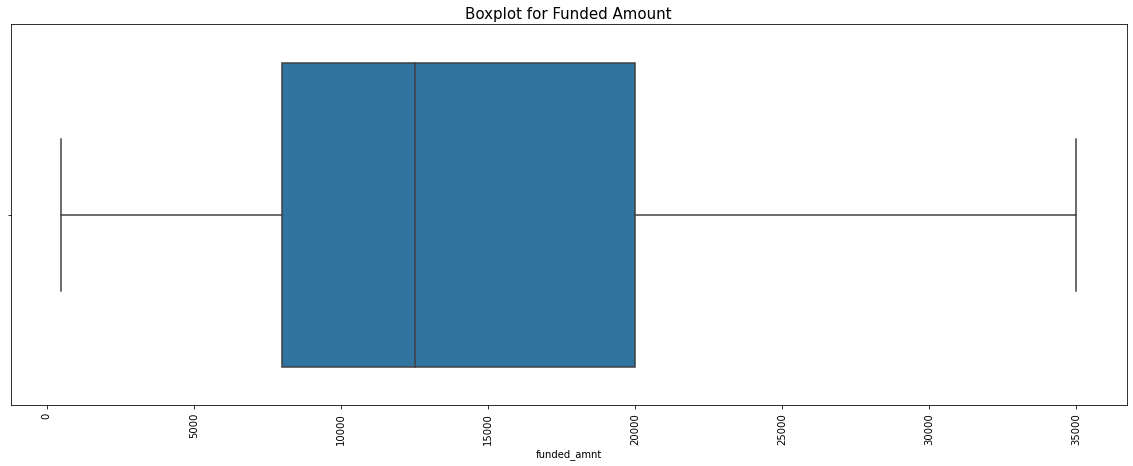

In [499]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.funded_amnt)
plt.title("Boxplot for Funded Amount", size = 15)
plt.xticks(rotation = 90)

Funded Amount Investor = The total amount committed by investors for that loan at that point in time.

In [500]:
df_train.funded_amnt_inv.describe()

count    598978.000000
mean      14478.973948
std        8337.695086
min           0.000000
25%        8000.000000
50%       12500.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64

In [501]:
print("Skewness: ", round(df_train.funded_amnt_inv.skew(),2))
print("Kurtosis: ", round(df_train.funded_amnt_inv.kurt(),2))

Skewness:  0.71
Kurtosis:  -0.18


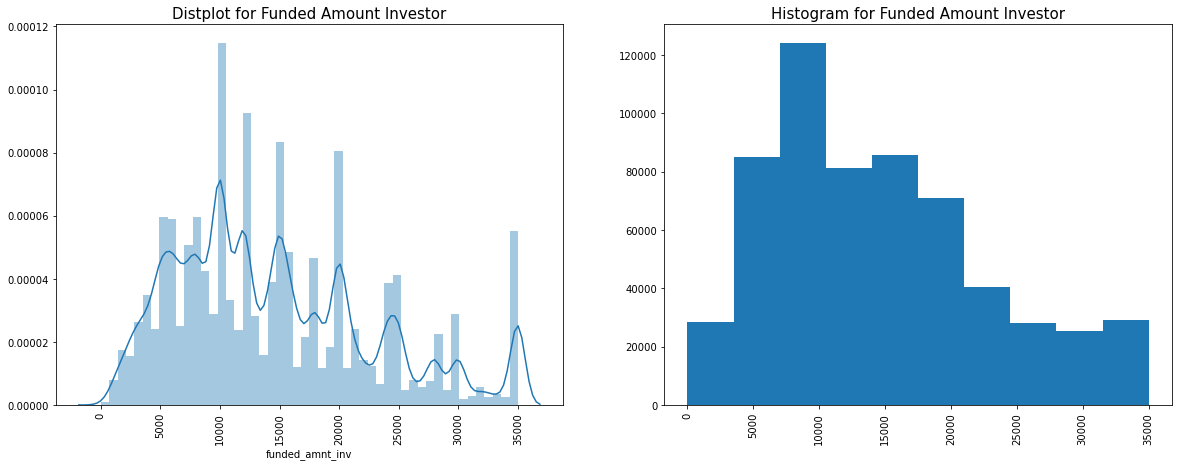

In [502]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.funded_amnt_inv)
plt.title("Distplot for Funded Amount Investor", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.funded_amnt_inv)
plt.xticks(rotation = 90)
plt.title("Histogram for Funded Amount Investor", size = 15)
plt.show()

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

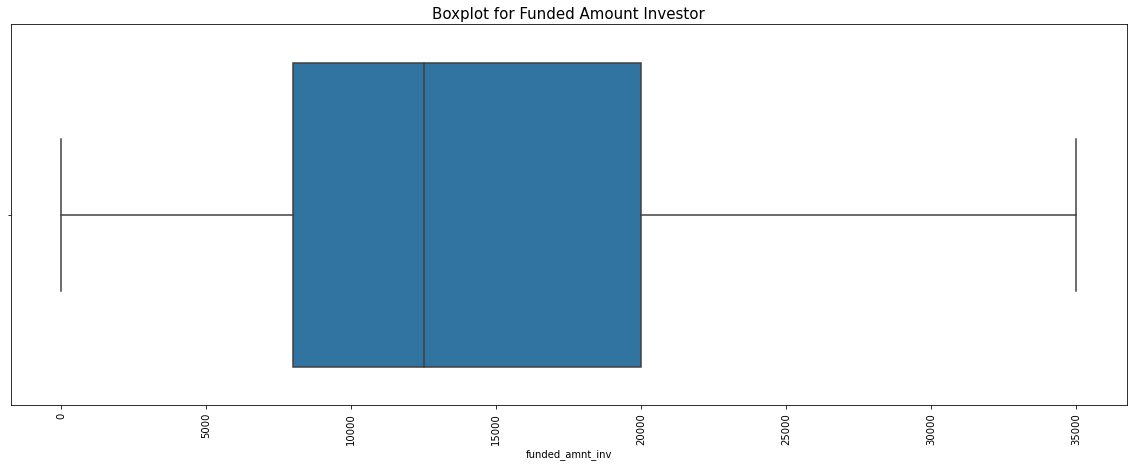

In [503]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.funded_amnt_inv)
plt.title("Boxplot for Funded Amount Investor", size = 15)
plt.xticks(rotation = 90)

In [504]:
round(((len(df_train[df_train["funded_amnt"] == df_train["funded_amnt_inv"]]) / df_train.shape[0]) * 100 ), 2)

88.03

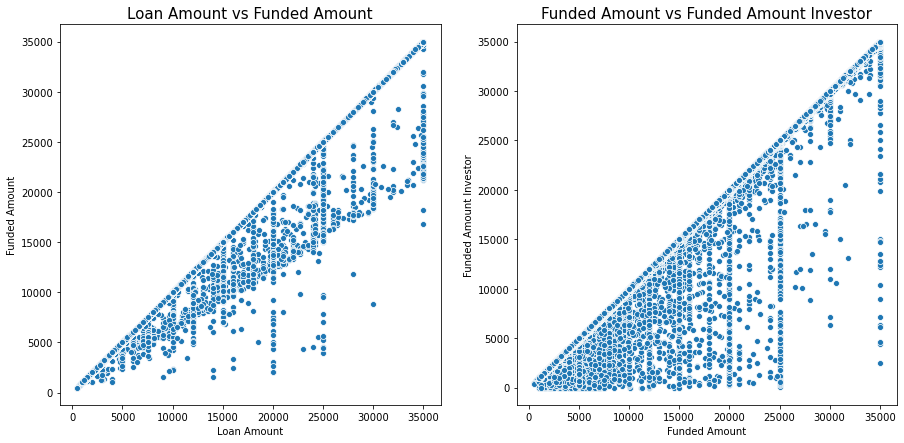

In [505]:
plt.figure(figsize = (15, 7))
plt.subplot(121)
sns.scatterplot(x = 'loan_amnt', y = 'funded_amnt',  data = df_train)
plt.xlabel("Loan Amount")
plt.ylabel("Funded Amount")
plt.title("Loan Amount vs Funded Amount", size = 15)
plt.subplot(122)
sns.scatterplot(x = 'funded_amnt', y = 'funded_amnt_inv', data = df_train)
plt.xlabel("Funded Amount")
plt.ylabel("Funded Amount Investor")
plt.title("Funded Amount vs Funded Amount Investor", size = 15)
plt.show()

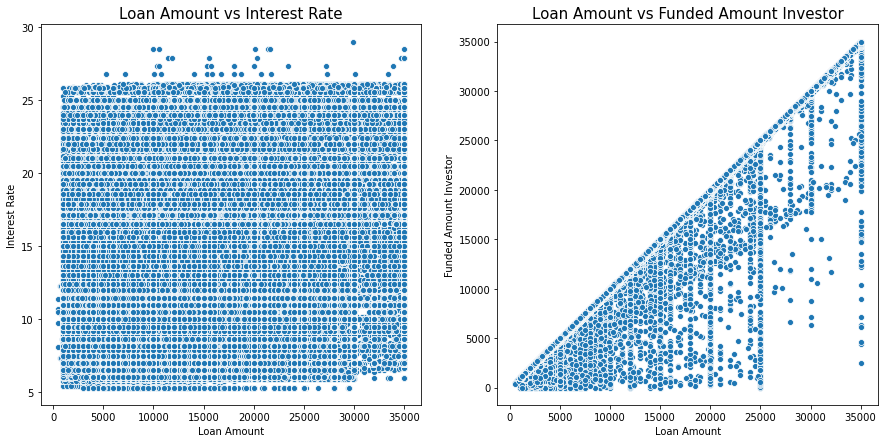

In [506]:
plt.figure(figsize = (15, 7))
plt.subplot(121)
sns.scatterplot(x = 'loan_amnt', y = 'int_rate', data = df_train)
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.title("Loan Amount vs Interest Rate", size = 15)
plt.subplot(122)
sns.scatterplot(x = 'loan_amnt', y = 'funded_amnt_inv', data = df_train)
plt.xlabel("Loan Amount")
plt.ylabel("Funded Amount Investor")
plt.title("Loan Amount vs Funded Amount Investor", size = 15)
plt.show()

Interest Rate = Interest Rate on the loan

In [507]:
df_train.int_rate.describe()

count    598978.000000
mean         13.520911
std           4.370961
min           5.320000
25%          10.160000
50%          13.330000
75%          16.290000
max          28.990000
Name: int_rate, dtype: float64

In [508]:
df_test.int_rate.describe()

count    256991.000000
mean         12.426461
std           4.265164
min           5.320000
25%           9.170000
50%          12.290000
75%          14.650000
max          28.990000
Name: int_rate, dtype: float64

In [509]:
print("Skewness: ", round(df_train.int_rate.skew(),2))
print("Kurtosis: ", round(df_train.int_rate.kurt(),2))

Skewness:  0.39
Kurtosis:  -0.23


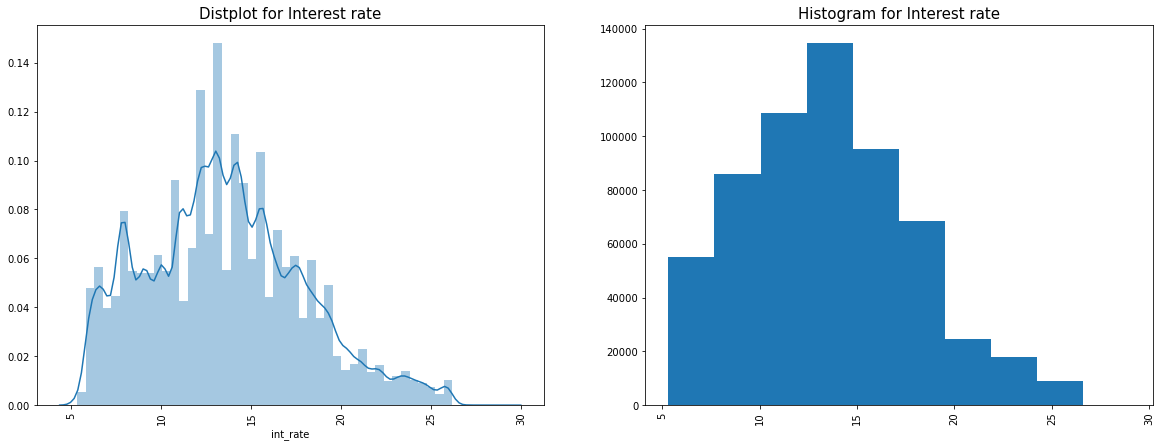

In [510]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.int_rate)
plt.title("Distplot for Interest rate", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.int_rate)
plt.xticks(rotation = 90)
plt.title("Histogram for Interest rate", size = 15)
plt.show()

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

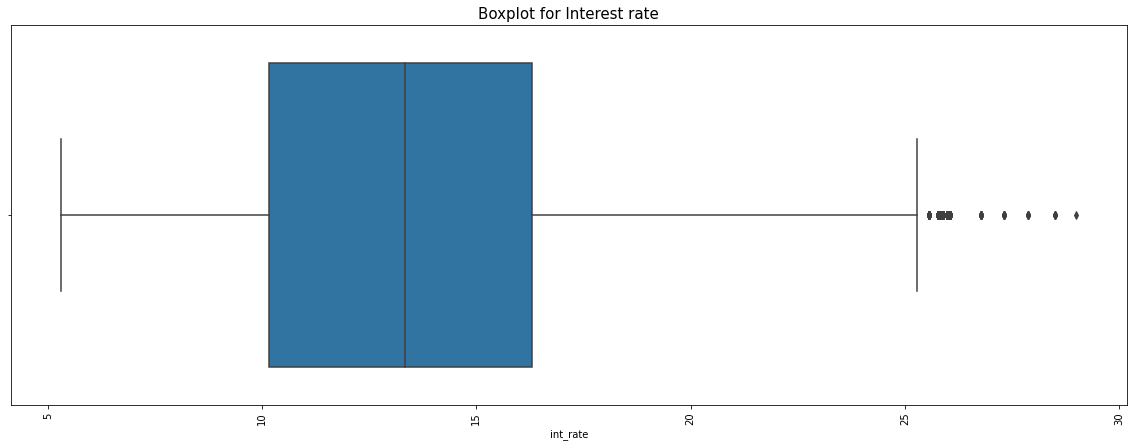

In [511]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.int_rate)
plt.title("Boxplot for Interest rate", size = 15)
plt.xticks(rotation = 90)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

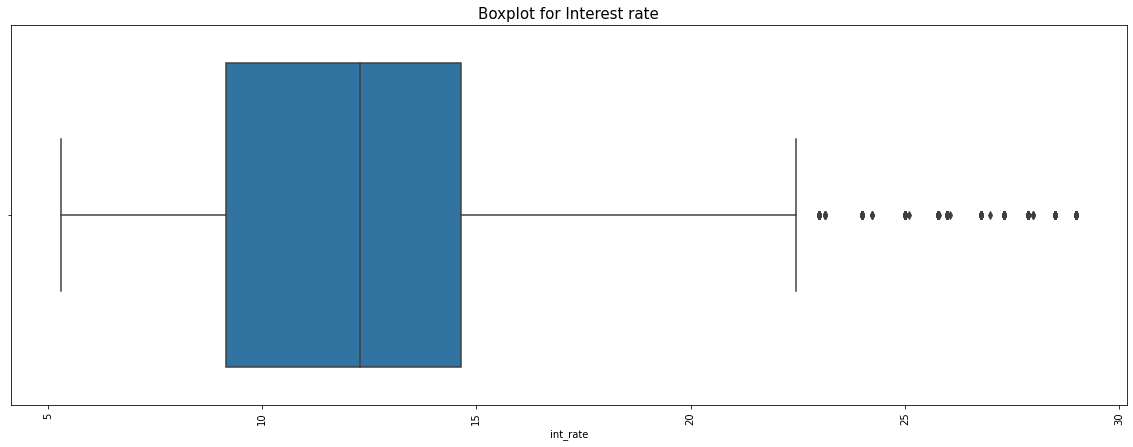

In [512]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.int_rate)
plt.title("Boxplot for Interest rate", size = 15)
plt.xticks(rotation = 90)

Installment = The monthly payment owed by the borrower if the loan originates.

In [513]:
df_train.installment.describe()

count    598978.000000
mean        434.562058
std         242.892709
min          15.690000
25%         259.642500
50%         381.840000
75%         568.900000
max        1409.990000
Name: installment, dtype: float64

In [514]:
df_test.installment.describe()

count    256991.000000
mean        440.144417
std         245.616191
min          30.120000
25%         261.880000
50%         382.550000
75%         578.680000
max        1445.460000
Name: installment, dtype: float64

In [515]:
print("Skewness: ", round(df_train.installment.skew(),2))
print("Kurtosis: ", round(df_train.installment.kurt(),2))

Skewness:  0.95
Kurtosis:  0.75


In [516]:
print("Skewness: ", round(df_test.installment.skew(),2))
print("Kurtosis: ", round(df_test.installment.kurt(),2))

Skewness:  0.92
Kurtosis:  0.56


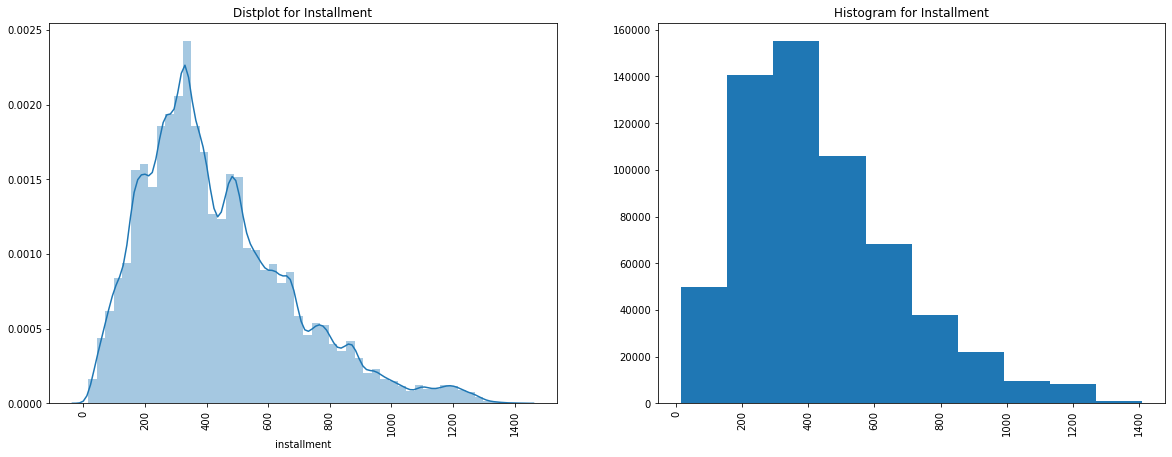

In [517]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.installment)
plt.title("Distplot for Installment")
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.installment)
plt.xticks(rotation = 90)
plt.title("Histogram for Installment")
plt.show()

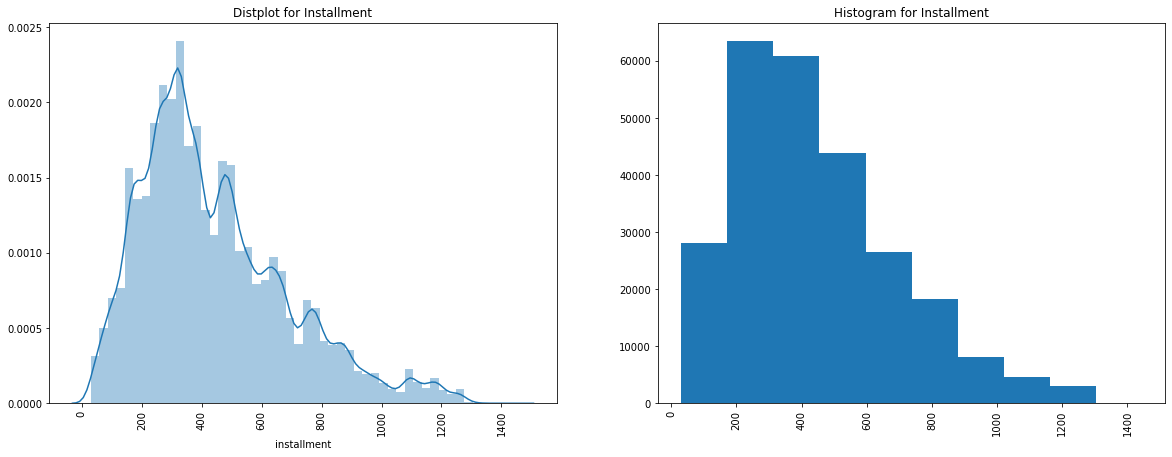

In [518]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.installment)
plt.title("Distplot for Installment")
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.installment)
plt.xticks(rotation = 90)
plt.title("Histogram for Installment")
plt.show()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 <a list of 10 Text major ticklabel objects>)

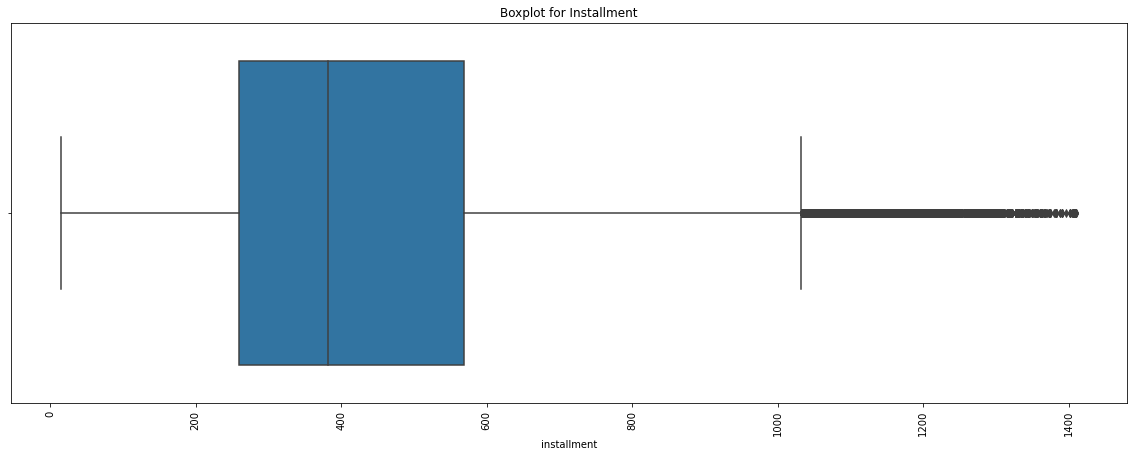

In [519]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.installment)
plt.title("Boxplot for Installment")
plt.xticks(rotation = 90)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 <a list of 10 Text major ticklabel objects>)

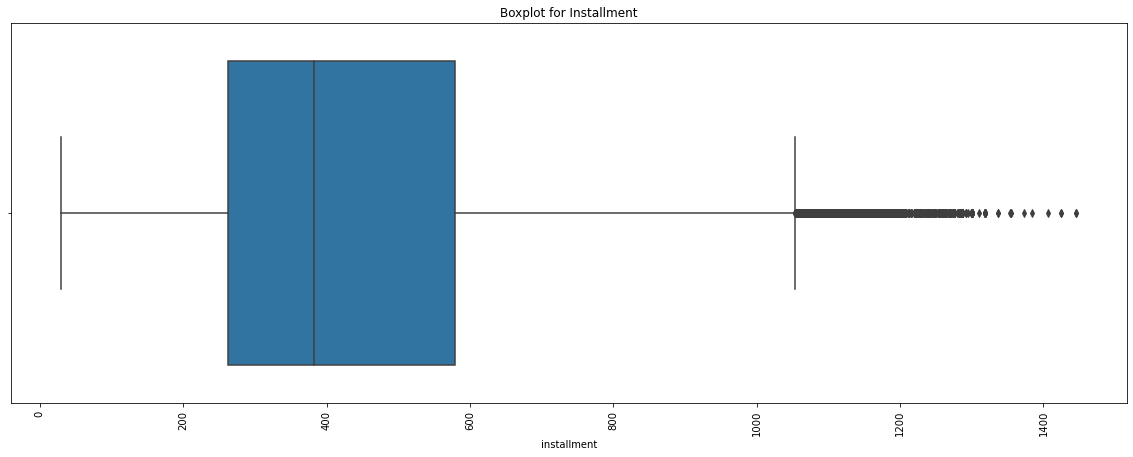

In [520]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.installment)
plt.title("Boxplot for Installment")
plt.xticks(rotation = 90)

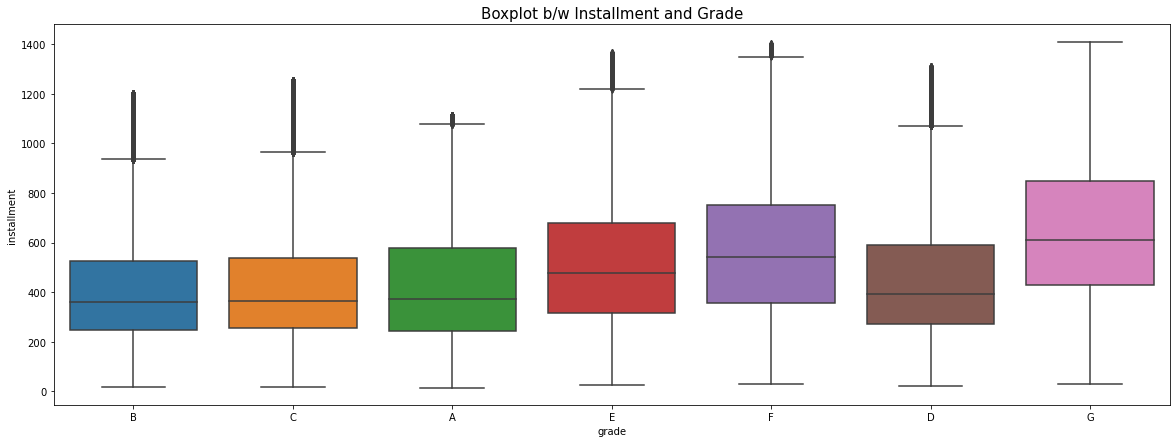

In [521]:
plt.figure(figsize=(20, 7))
sns.boxplot(x=df_train.grade, y=df_train.installment)
plt.title("Boxplot b/w Installment and Grade", size = 15)
plt.show()

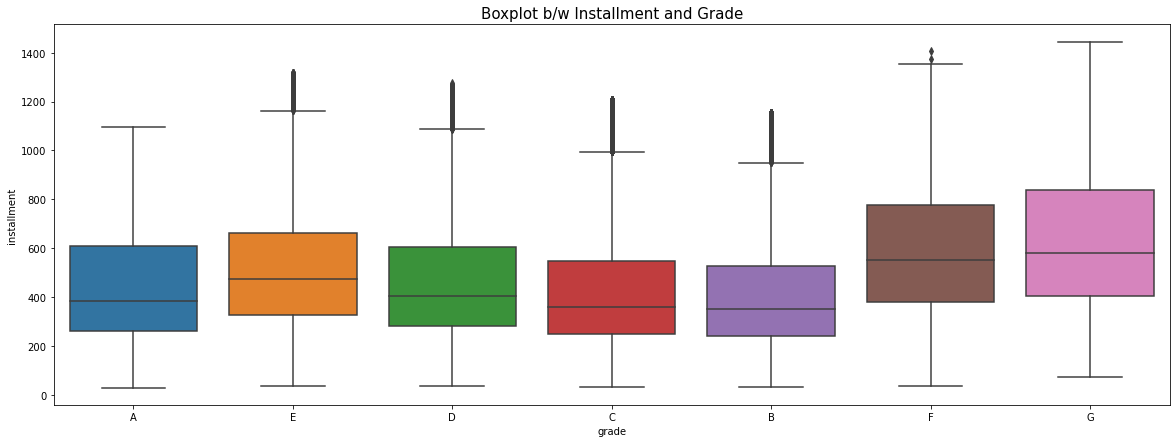

In [522]:
plt.figure(figsize=(20, 7))
sns.boxplot(x=df_test.grade, y=df_test.installment)
plt.title("Boxplot b/w Installment and Grade", size = 15)
plt.show()

Annual Income = The self-reported annual income provided by the borrower during registration.

In [523]:
df_train.annual_inc.describe()

count    5.989780e+05
mean     7.397280e+04
std      5.676163e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

In [524]:
df_test.annual_inc.describe()

count    2.569910e+05
mean     7.763123e+04
std      7.897454e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.200000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [525]:
print("Skewness: ", round(df_train.annual_inc.skew(),2))
print("Kurtosis: ", round(df_train.annual_inc.kurt(),2))
print("Skewness: ", round(df_test.annual_inc.skew(),2))
print("Kurtosis: ", round(df_test.annual_inc.kurt(),2))

Skewness:  32.6
Kurtosis:  3530.49
Skewness:  50.02
Kurtosis:  4643.35


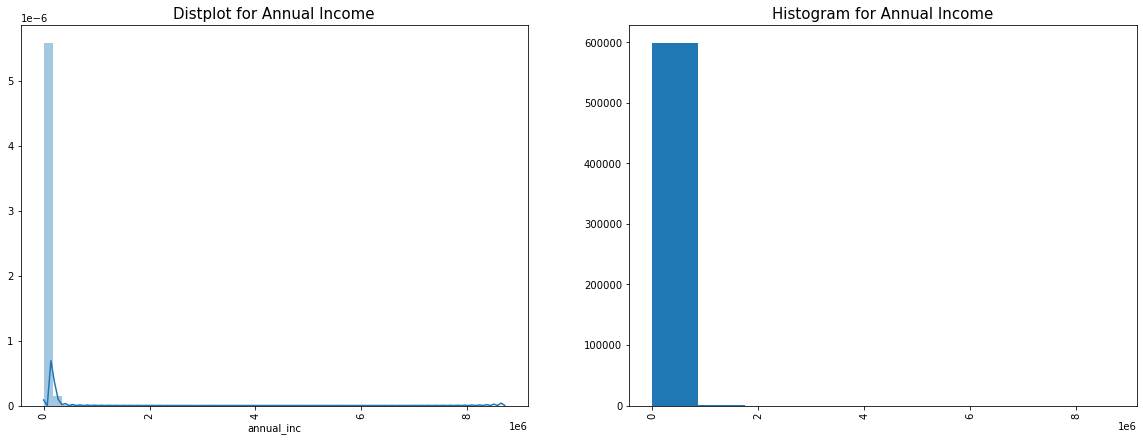

In [526]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.annual_inc)
plt.title("Distplot for Annual Income", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.annual_inc)
plt.xticks(rotation = 90)
plt.title("Histogram for Annual Income", size = 15)
plt.show()

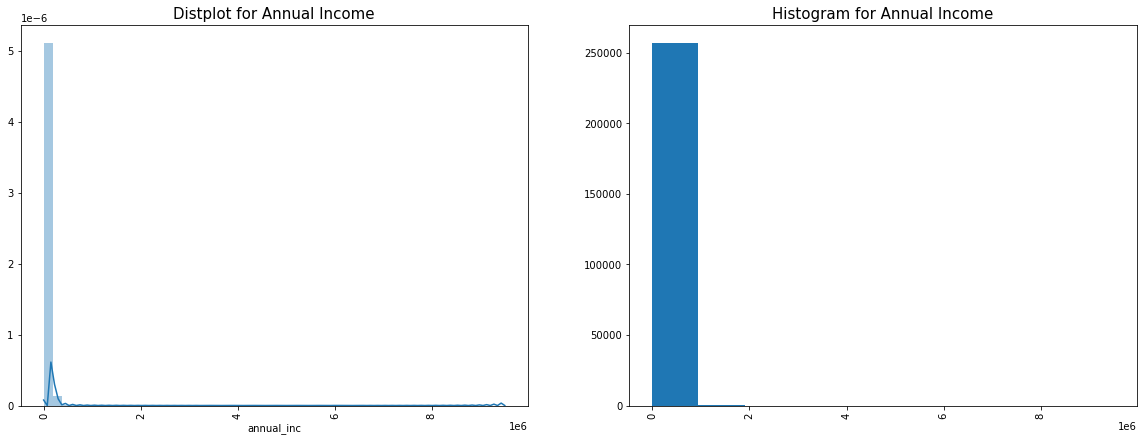

In [527]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.annual_inc)
plt.title("Distplot for Annual Income", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.annual_inc)
plt.xticks(rotation = 90)
plt.title("Histogram for Annual Income", size = 15)
plt.show()

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]),
 <a list of 7 Text major ticklabel objects>)

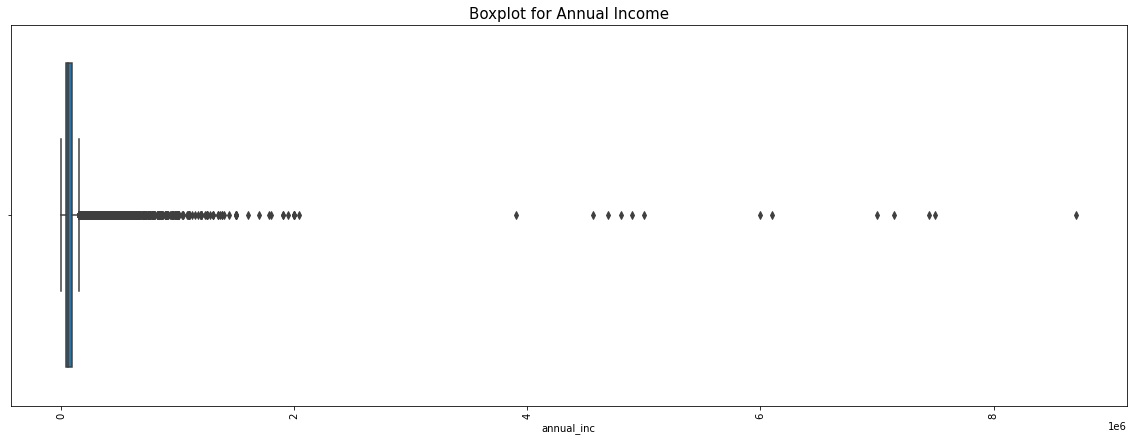

In [528]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.annual_inc)
plt.title("Boxplot for Annual Income", size = 15)
plt.xticks(rotation = 90)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]),
 <a list of 7 Text major ticklabel objects>)

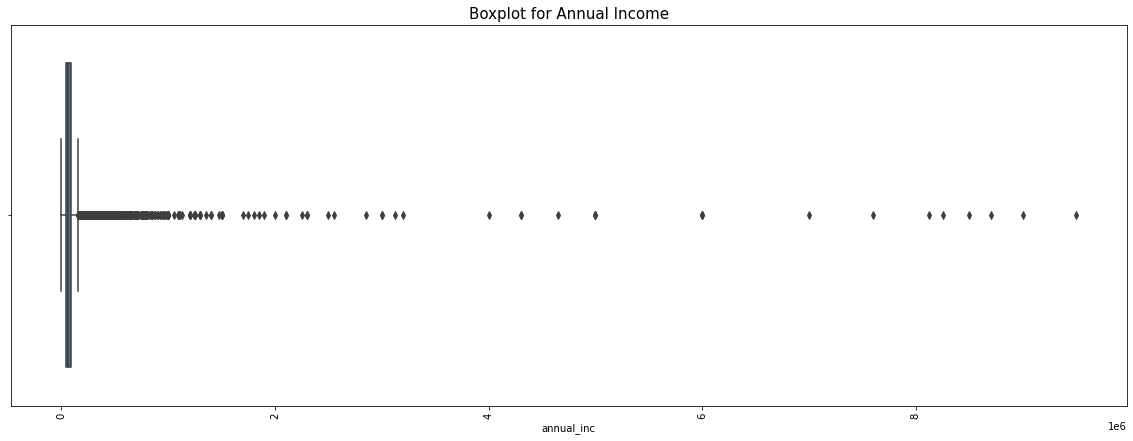

In [529]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.annual_inc)
plt.title("Boxplot for Annual Income", size = 15)
plt.xticks(rotation = 90)

In [530]:
print("Min Value:",df_train.annual_inc.min(),'\n',"Median Value",df_train.annual_inc.median(),'\n' 
      "Third quartile" ,np.quantile(df_train.annual_inc, .75),'\n',"Max Value" ,df_train.annual_inc.max())

Min Value: 3000.0 
 Median Value 63000.0 
Third quartile 90000.0 
 Max Value 8706582.0


In [531]:
df_train[df_train['annual_inc'] > 90000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
14,1069057,1303503,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,SFMTA,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,951xx,CA,7.06,0.0,May-1991,2.0,NaN,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,Oct-2013,325.74,Feb-2016,Mar-2014,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
17,1069971,1304884,3600.0,3600.0,3600.0,36 months,6.03,109.57,A,A1,Duracell,10.0,MORTGAGE,110000.0,Not Verified,2011-12-01,n,major_purchase,Holiday,067xx,CT,10.52,0.0,Aug-1993,0.0,NaN,20.0,0.0,22836.0,16.0,42.0,f,0.00,0.00,3785.02,3785.02,3600.00,185.02,0.0,0.0,0.0000,May-2013,583.45,Feb-2016,May-2014,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
21,1039153,1269083,21000.0,21000.0,21000.0,36 months,12.42,701.73,B,B4,Osram Sylvania,10.0,RENT,105000.0,Verified,2011-12-01,n,debt_consolidation,Debt Cleanup,335xx,FL,13.22,0.0,Feb-1983,0.0,NaN,7.0,0.0,32135.0,90.3,38.0,f,0.00,0.00,14025.40,14025.40,10694.96,3330.44,0.0,0.0,0.0000,Sep-2013,701.73,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1
25,1069697,1273773,15000.0,15000.0,15000.0,36 months,9.91,483.38,B,B1,Winfield Pathology Consultants,2.0,MORTGAGE,92000.0,Verified,2011-12-01,n,credit_card,No more credit card debt!,605xx,IL,29.44,0.0,Feb-2002,0.0,NaN,8.0,0.0,13707.0,93.9,31.0,f,0.00,0.00,15823.48,15823.48,15000.00,823.48,0.0,0.0,0.0000,Sep-2012,2447.05,Feb-2016,Sep-2012,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
28,1069799,1304678,4000.0,4000.0,4000.0,36 months,11.71,132.31,B,B3,Shands Hospital at the University of Fl,10.0,MORTGAGE,106000.0,Not Verified,2011-12-01,n,debt_consolidation,Debt Consolidation,326xx,FL,5.63,1.0,Aug-1984,0.0,18.0,12.0,0.0,6110.0,37.7,44.0,f,0.00,0.00,4484.79,4484.79,4000.00,484.79,0.0,0.0,0.0000,Apr-2013,2638.77,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855933,35034116,37717438,16000.0,16000.0,16000.0,36 months,8.19,502.79,A,A5,Manager,9.0,MORTGAGE,200000.0,Source Verified,2015-01-01,n,debt_consolidation,Debt consolidation,760xx,TX,26.82,0.0,May-2002,0.0,NaN,29.0,0.0,29564.0,62.5,46.0,f,11095.53,11095.53,6018.92,6018.92,4904.47,1114.45,0.0,0.0,0.0000,Jan-2016,502.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,349131.0,47300.0,0
855940,36500819,39232937,10300.0,10300.0,10300.0,60 months,13.66,237.86,C,C3,Business agent,10.0,RENT,93600.0,Source Verified,2015-01-01,n,debt_consolidation,Debt consolidation,925xx,CA,15.72,1.0,Aug-2002,0.0,17.0,13.0,0.0,10260.0,46.6,24.0,f,8758.52,8758.52,2838.69,2838.69,1541.48,1297.21,0.0,0.0,0.0000,Jan-2016,237.86,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,50.0,41956.0,22000.0,0
855948,36440728,39152101,25000.0,25000.0,25000.0,60 months,15.99,607.82,D,D2,Owner,3.0,RENT,103000.0,Source Verified,2015-01-01,n,debt_consolidation,Debt consolidation,282xx,NC,5.27,0.0,May-2003,0.0,NaN,5.0,0.0,17275.0,92.4,7.0,w,21451.02,21451.02,7249.42,7249.42,3548.98,3700.44,0.0,0.0,0.0000,Jan-2016,607.82,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,17275.0,18700.0,0
855950,36361

In [532]:
df_train[df_train['annual_inc'] == 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind


In [533]:
df_test[df_test['annual_inc'] == 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
462577,66415476,71141331,20000.0,20000.0,20000.0,36 months,16.99,712.96,D,D3,NaN,10.0,MORTGAGE,0.0,Not Verified,2015-12-01,n,debt_consolidation,Debt consolidation,760xx,TX,9999.0,0.0,Jul-2001,1.0,NaN,7.0,0.0,7161.0,88.4,11.0,w,19570.21,19570.21,694.08,694.08,429.79,264.29,0.0,0.0,0.0,Jan-2016,712.96,Feb-2016,Jan-2016,0.0,1.0,JOINT,185000.0,5.31,Not Verified,0.0,0.0,8715.0,8100.0,0
508976,65199509,69726237,3700.0,3700.0,3700.0,36 months,12.59,123.94,C,C2,NaN,10.0,MORTGAGE,0.0,Not Verified,2015-11-01,n,credit_card,Credit card refinancing,765xx,TX,9999.0,2.0,Aug-1978,1.0,10.0,8.0,0.0,10649.0,56.9,20.0,f,3528.87,3528.87,242.70,242.70,171.13,71.57,0.0,0.0,0.0,Jan-2016,123.94,Feb-2016,Jan-2016,0.0,1.0,JOINT,40988.0,28.72,Not Verified,0.0,0.0,24521.0,18700.0,0


In [534]:
df_test = df_test[df_test['annual_inc'] !=0 ]

In [535]:
df_test[df_test['annual_inc'] == 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind


DTI = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

In [536]:
df_train.dti.describe()

count    598978.000000
mean         17.638408
std           8.070746
min           0.000000
25%          11.610000
50%          17.210000
75%          23.290000
max          39.990000
Name: dti, dtype: float64

In [537]:
df_test.dti.describe()

count    256989.000000
mean         19.172008
std           9.078862
min           0.000000
25%          12.580000
50%          18.620000
75%          25.390000
max        1092.520000
Name: dti, dtype: float64

In [538]:
print("Skewness: ", round(df_train.dti.skew(),2))
print("Kurtosis: ", round(df_train.dti.kurt(),2))
print("Skewness: ", round(df_test.dti.skew(),2))
print("Kurtosis: ", round(df_test.dti.kurt(),2))

Skewness:  0.22
Kurtosis:  -0.52
Skewness:  8.34
Kurtosis:  873.69


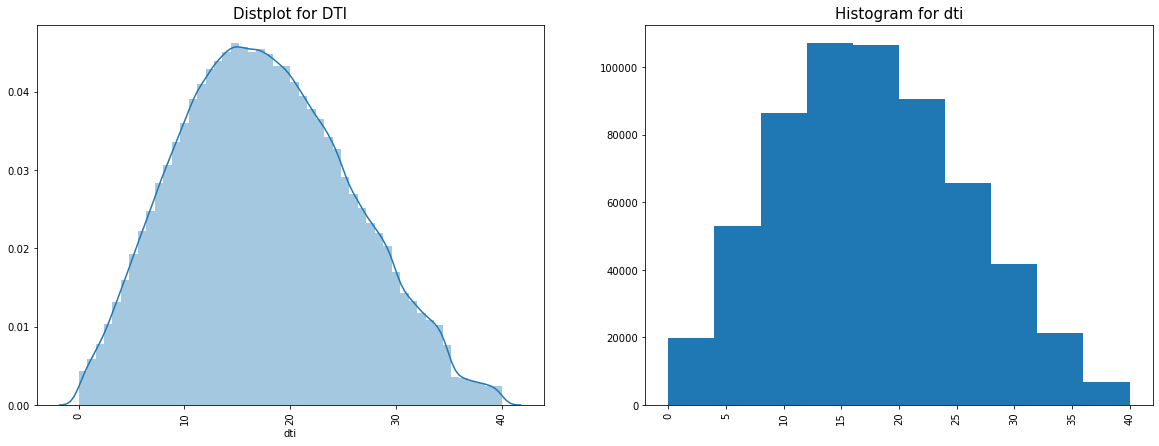

In [539]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.dti)
plt.title("Distplot for DTI", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.dti)
plt.xticks(rotation = 90)
plt.title("Histogram for dti", size = 15)
plt.show()

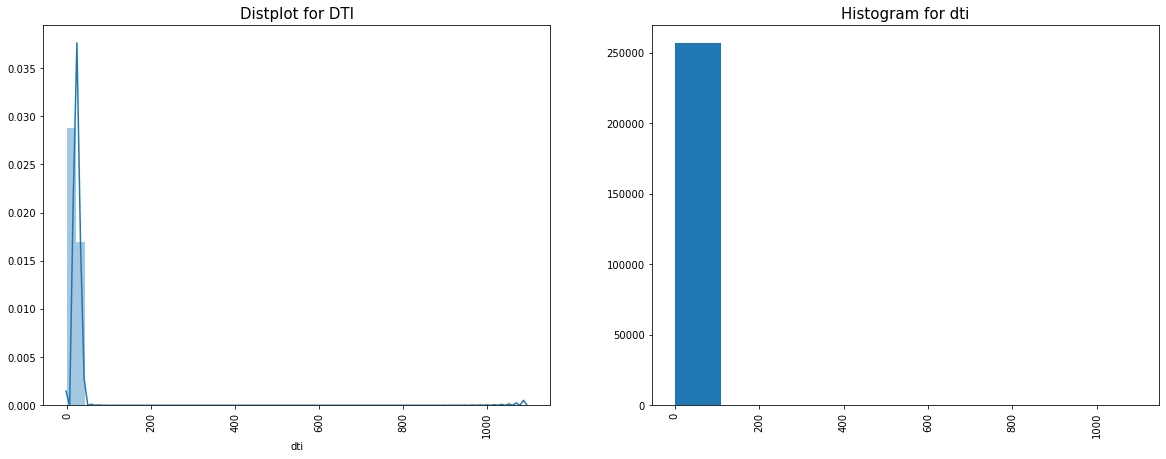

In [540]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.dti)
plt.title("Distplot for DTI", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.dti)
plt.xticks(rotation = 90)
plt.title("Histogram for dti", size = 15)
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

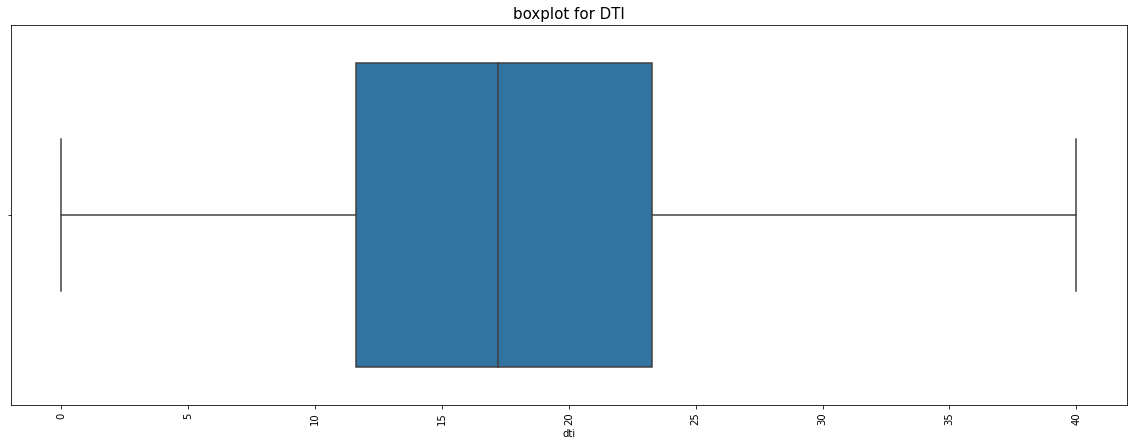

In [541]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.dti)
plt.title("boxplot for DTI", size = 15)
plt.xticks(rotation = 90)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

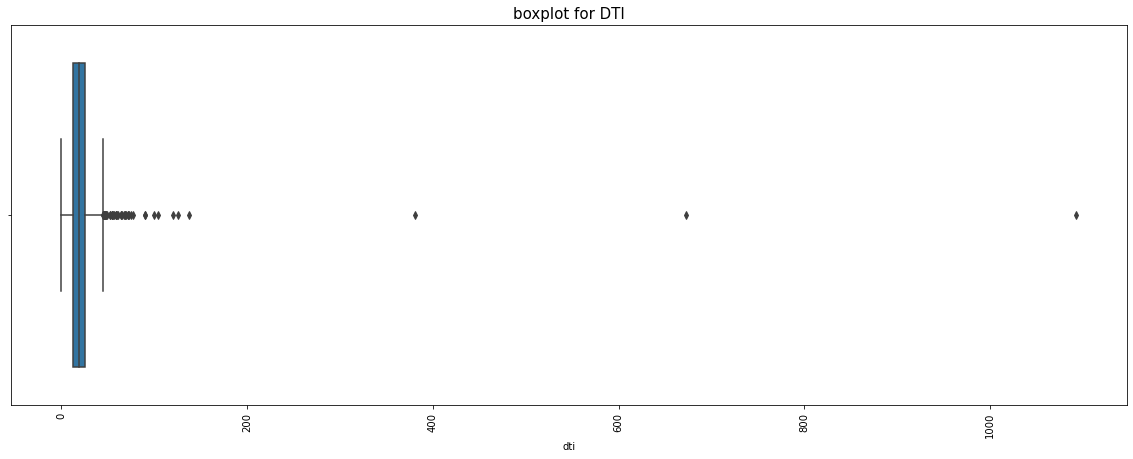

In [542]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.dti)
plt.title("boxplot for DTI", size = 15)
plt.xticks(rotation = 90)

In [543]:
max_dti = df_test['dti'].quantile(0.99)
max_dti

38.4

In [544]:
df_test['dti'].fillna(38.4, inplace = True)

In [545]:
print("Skewness: ", round(df_test.dti.skew(),2))
print("Kurtosis: ", round(df_test.dti.kurt(),2))

Skewness:  8.34
Kurtosis:  873.69


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

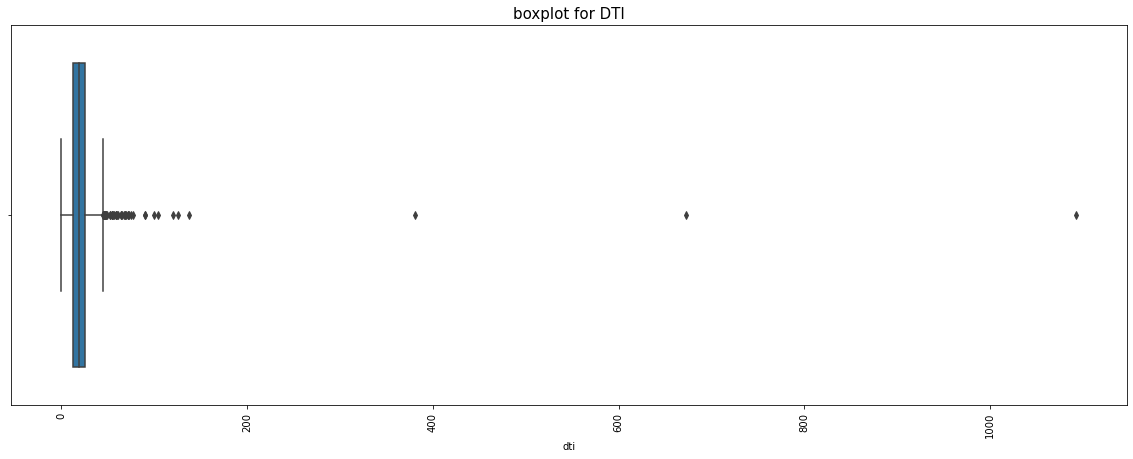

In [546]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.dti)
plt.title("boxplot for DTI", size = 15)
plt.xticks(rotation = 90)

Delinquency 2 years = The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [547]:
df_train.delinq_2yrs.describe()

count    598978.000000
mean          0.297171
std           0.828659
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

In [548]:
df_test.delinq_2yrs.describe()

count    256989.000000
mean          0.345295
std           0.919378
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: delinq_2yrs, dtype: float64

In [549]:
print("Skewness: ", round(df_train.delinq_2yrs.skew(),2))
print("Kurtosis: ", round(df_train.delinq_2yrs.kurt(),2))
print("Skewness: ", round(df_test.delinq_2yrs.skew(),2))
print("Kurtosis: ", round(df_test.delinq_2yrs.kurt(),2))

Skewness:  5.57
Kurtosis:  61.78
Skewness:  5.31
Kurtosis:  51.07


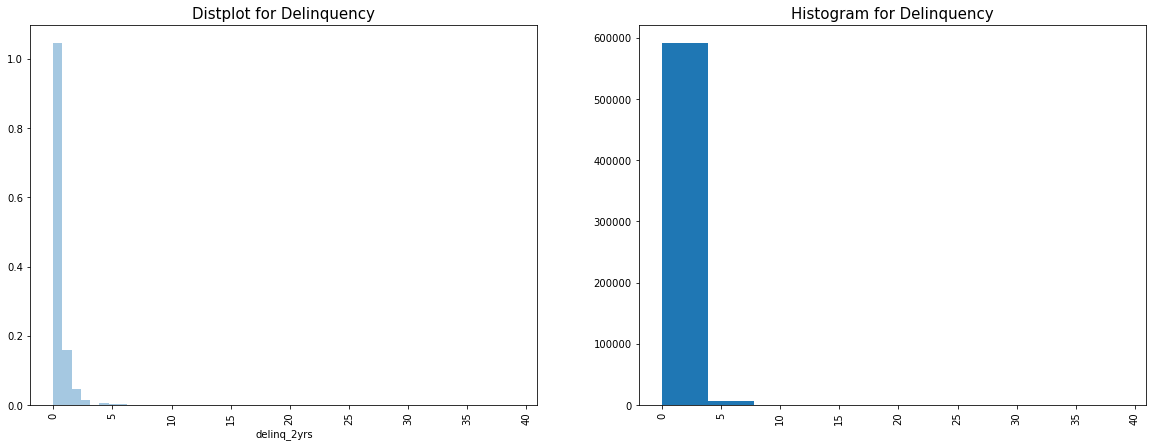

In [550]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.delinq_2yrs)
plt.title("Distplot for Delinquency", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.delinq_2yrs)
plt.xticks(rotation = 90)
plt.title("Histogram for Delinquency", size = 15)
plt.show()

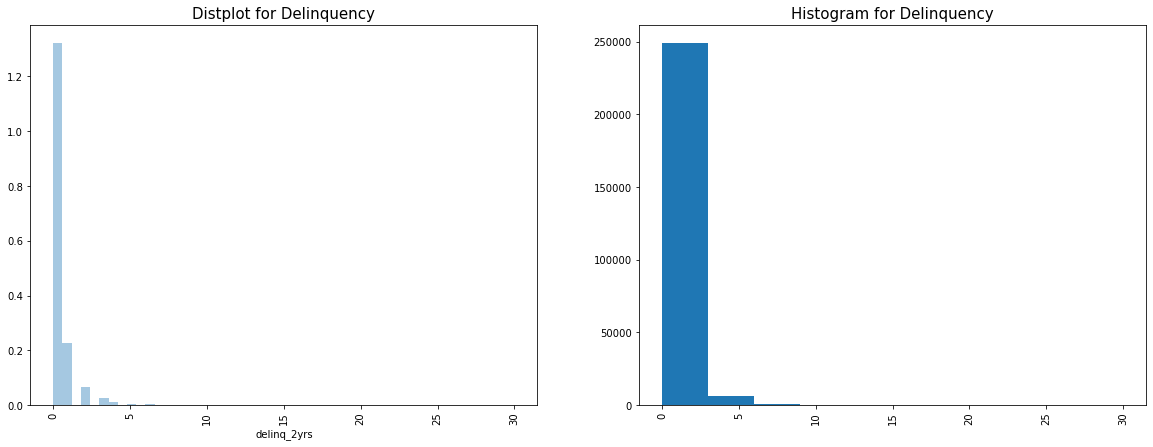

In [551]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.delinq_2yrs)
plt.title("Distplot for Delinquency", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.delinq_2yrs)
plt.xticks(rotation = 90)
plt.title("Histogram for Delinquency", size = 15)
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 11 Text major ticklabel objects>)

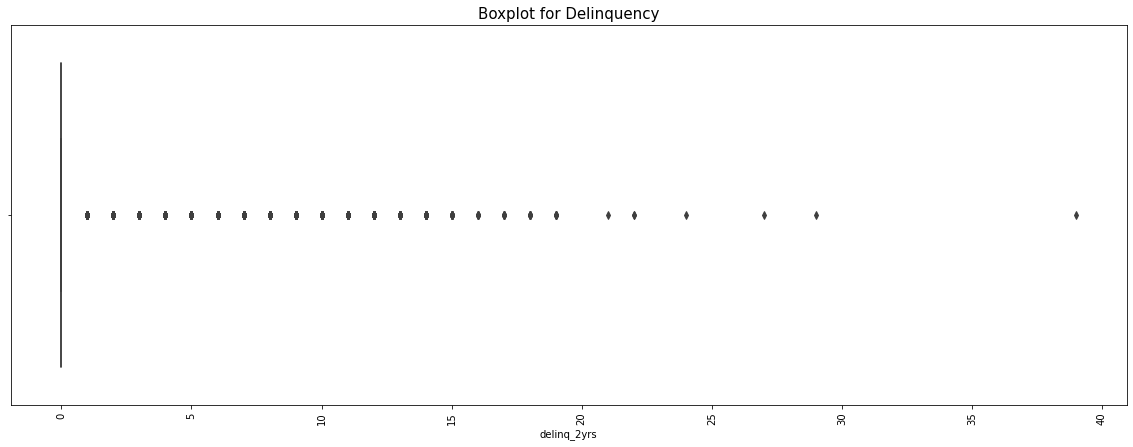

In [552]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.delinq_2yrs)
plt.title("Boxplot for Delinquency", size = 15)
plt.xticks(rotation = 90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

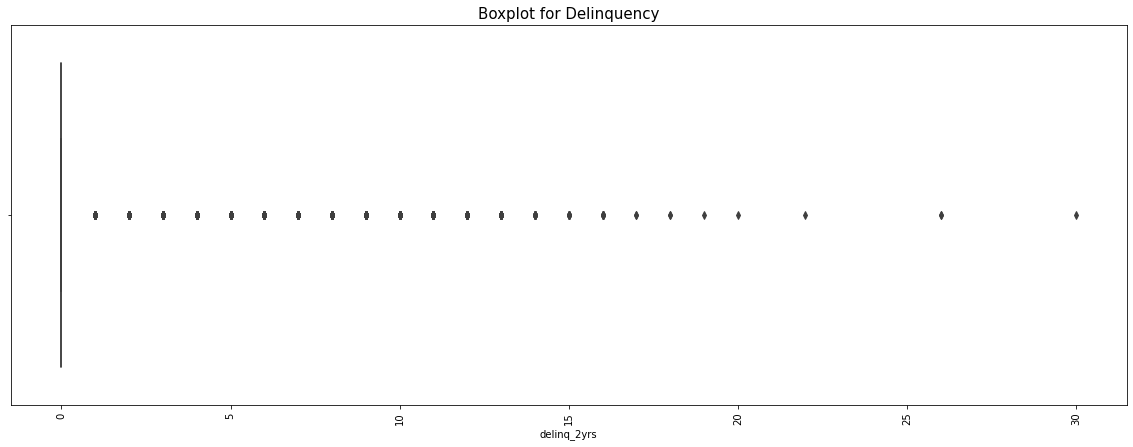

In [553]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.delinq_2yrs)
plt.title("Boxplot for Delinquency", size = 15)
plt.xticks(rotation = 90)

In [554]:
(len(df_train[df_train['delinq_2yrs'] == 0]) / df_train.shape[0]) * 100

81.59448260203213

In [555]:
(len(df_test[df_test['delinq_2yrs'] == 0]) / df_test.shape[0]) * 100

79.36176256571294

Last 6 Months Inquiry = The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [556]:
df_train.inq_last_6mths.describe()

count    598978.000000
mean          0.731226
std           1.000495
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64

In [557]:
df_test.inq_last_6mths.describe()

count    256989.000000
mean          0.563651
std           0.861839
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: inq_last_6mths, dtype: float64

In [558]:
print("Skewness: ", round(df_train.inq_last_6mths.skew(),2))
print("Kurtosis: ", round(df_train.inq_last_6mths.kurt(),2))
print("Skewness: ", round(df_test.inq_last_6mths.skew(),2))
print("Kurtosis: ", round(df_test.inq_last_6mths.kurt(),2))

Skewness:  1.62
Kurtosis:  3.0
Skewness:  1.81
Kurtosis:  3.67


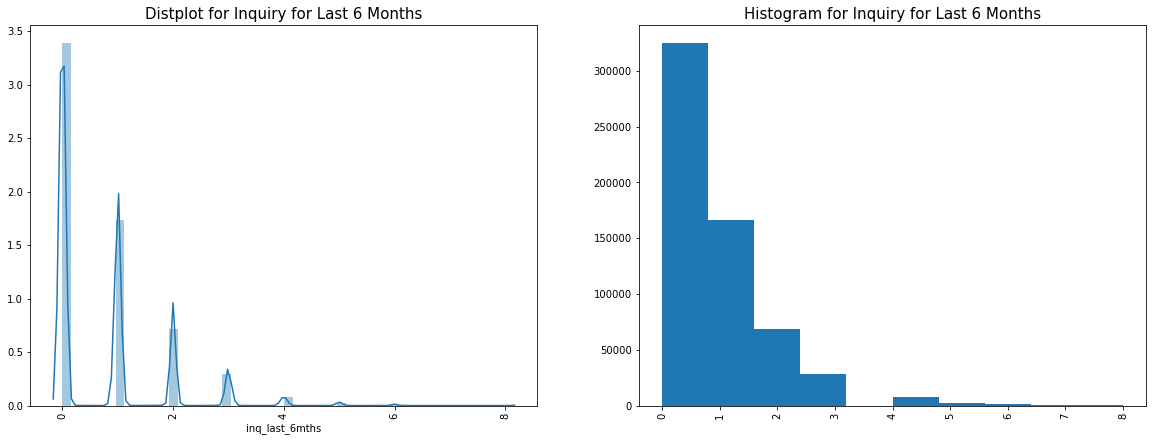

In [559]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.inq_last_6mths)
plt.title("Distplot for Inquiry for Last 6 Months", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.inq_last_6mths)
plt.xticks(rotation = 90)
plt.title("Histogram for Inquiry for Last 6 Months", size = 15)
plt.show()

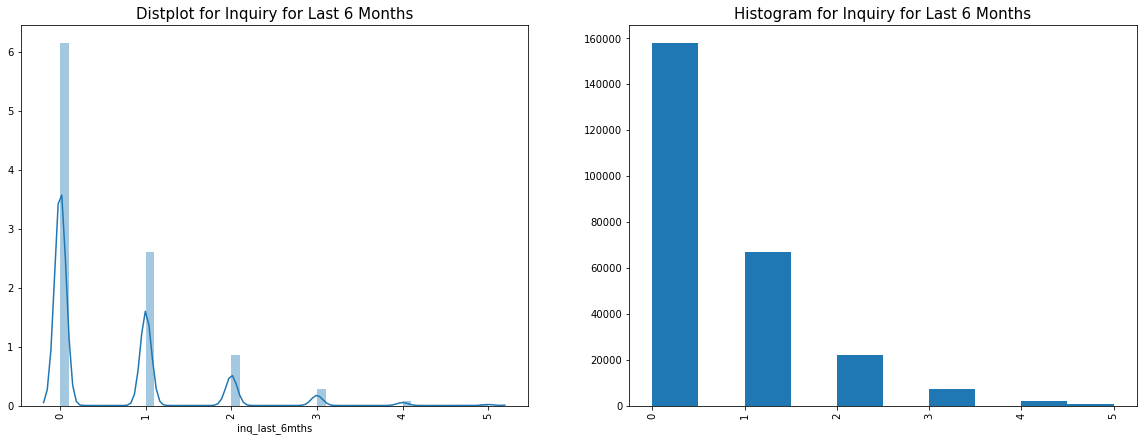

In [560]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.inq_last_6mths)
plt.title("Distplot for Inquiry for Last 6 Months", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.inq_last_6mths)
plt.xticks(rotation = 90)
plt.title("Histogram for Inquiry for Last 6 Months", size = 15)
plt.show()

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text major ticklabel objects>)

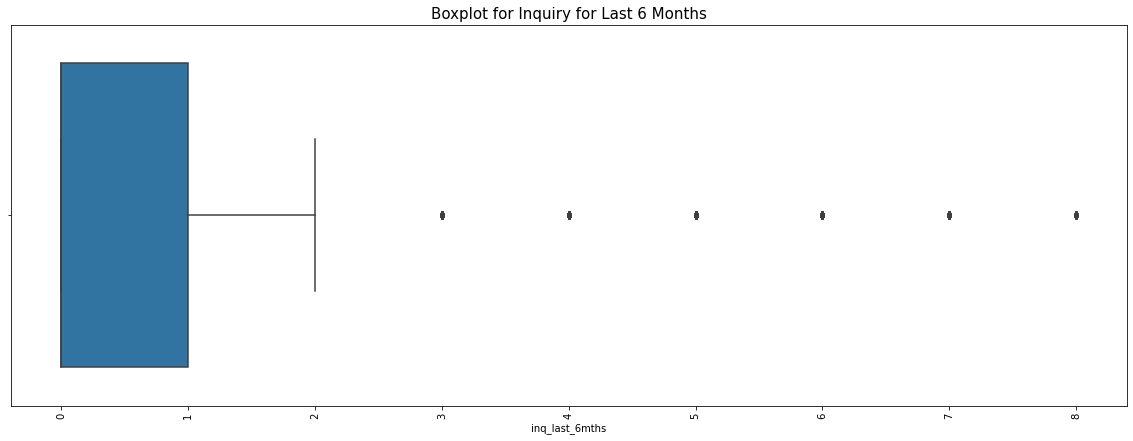

In [561]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.inq_last_6mths)
plt.title("Boxplot for Inquiry for Last 6 Months", size = 15)
plt.xticks(rotation = 90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

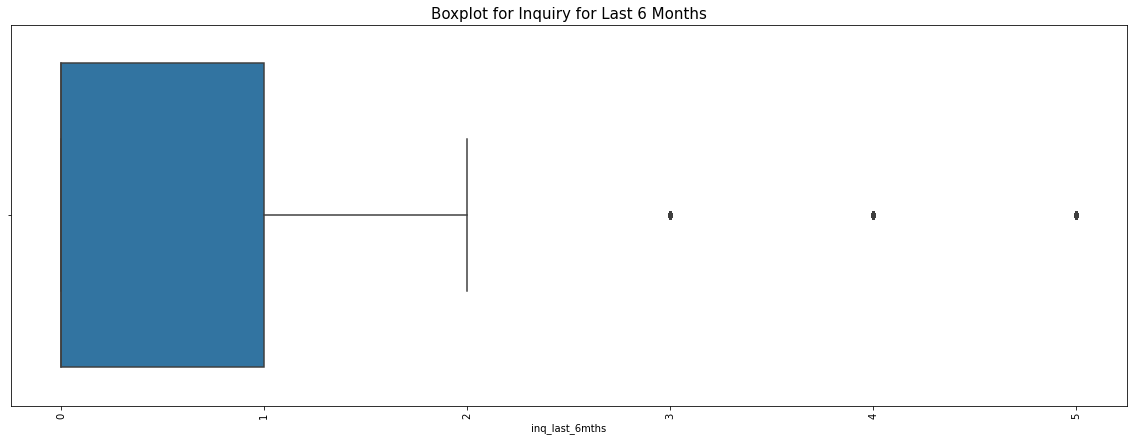

In [562]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.inq_last_6mths)
plt.title("Boxplot for Inquiry for Last 6 Months", size = 15)
plt.xticks(rotation = 90)

In [563]:
(len(df_train[df_train['inq_last_6mths'] == 0]) / df_train.shape[0]) * 100

54.21467900323551

In [564]:
(len(df_test[df_test['inq_last_6mths'] == 0]) / df_test.shape[0]) * 100

61.454381315931805

In [565]:
len(df_train.inq_last_6mths.unique())

9

Months Since last Delinquency = The number of months since the borrower's last delinquency.

In [566]:
df_train.mths_since_last_delinq.isnull().sum()

314968

In [567]:
df_test.mths_since_last_delinq.isnull().sum()

124843

In [568]:
df_train.mths_since_last_delinq.describe()

count    284010.000000
mean         34.131985
std          21.796878
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

In [569]:
df_test.mths_since_last_delinq.describe()

count    132146.000000
mean         34.188723
std          22.021657
min           0.000000
25%          15.000000
50%          31.000000
75%          50.000000
max         171.000000
Name: mths_since_last_delinq, dtype: float64

In [570]:
print("Skewness: ", round(df_train.mths_since_last_delinq.skew(),2))
print("Kurtosis: ", round(df_train.mths_since_last_delinq.kurt(),2))
print("Skewness: ", round(df_test.mths_since_last_delinq.skew(),2))
print("Kurtosis: ", round(df_test.mths_since_last_delinq.kurt(),2))

Skewness:  0.46
Kurtosis:  -0.75
Skewness:  0.44
Kurtosis:  -0.8


In [571]:
df_train.mths_since_last_delinq.unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84.,  88.,
        87., 122.,  91., 146., 134., 114.,  99.,  93., 127., 101.,  94.,
       102., 129., 113., 139., 131., 156., 143., 109., 119., 149., 118.,
       130., 148., 126.,  90., 141., 116., 100., 152.,  98.,  92., 108.,
       133., 104., 111., 135., 105., 170., 124., 136., 180., 188., 140.,
       151., 159., 121., 117., 123., 112., 176., 13

In [572]:
df_test.mths_since_last_delinq.unique()

array([ nan,  23.,  29.,   3.,   4.,  42.,  24.,  43.,  67.,  13.,  44.,
        47.,  32.,  64.,  66.,  61.,  10.,  14.,  69.,  30.,   1.,  19.,
        41.,  39.,  12.,  31.,   7.,  25.,  48.,  49.,  71.,  60.,  21.,
        46.,  73.,  22.,   9.,  20.,  18.,  80.,  16.,  57.,  40.,   2.,
        28.,  68.,  58.,  11.,  75.,  51.,  34.,  52.,   8.,  38.,  78.,
         6.,  36.,   5.,  62.,  70.,  77.,  15.,  33.,  74.,  17.,  81.,
        37.,  65.,  45.,  56.,  59.,  54.,  35.,  76., 109.,  53.,  63.,
        50.,   0.,  72.,  26.,  27.,  79.,  55.,  92.,  82.,  84.,  85.,
       101.,  88., 119., 120.,  83.,  98.,  96.,  90.,  86., 106.,  95.,
        87., 115., 108., 152., 100.,  91., 105., 134., 146.,  93., 123.,
       131., 157.,  94.,  99.,  89., 122., 104., 112.,  97., 154., 103.,
       121., 113., 127., 170., 171., 110., 142., 125., 118., 102., 129.,
       114., 117.])

In [573]:
df_train['mths_since_last_delinq'].fillna(df_train['mths_since_last_delinq'].median(), inplace = True)
df_test['mths_since_last_delinq'].fillna(df_test['mths_since_last_delinq'].median(), inplace = True)
print(df_train.mths_since_last_delinq.isnull().sum(), df_test.mths_since_last_delinq.isnull().sum())

0 0


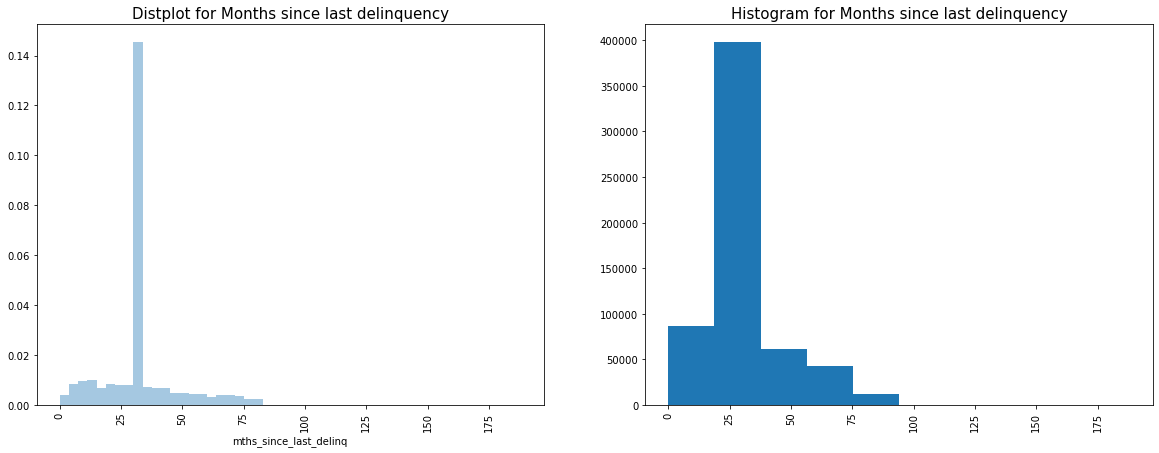

In [574]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.mths_since_last_delinq)
plt.title("Distplot for Months since last delinquency", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.mths_since_last_delinq)
plt.xticks(rotation = 90)
plt.title("Histogram for Months since last delinquency", size = 15)
plt.show()

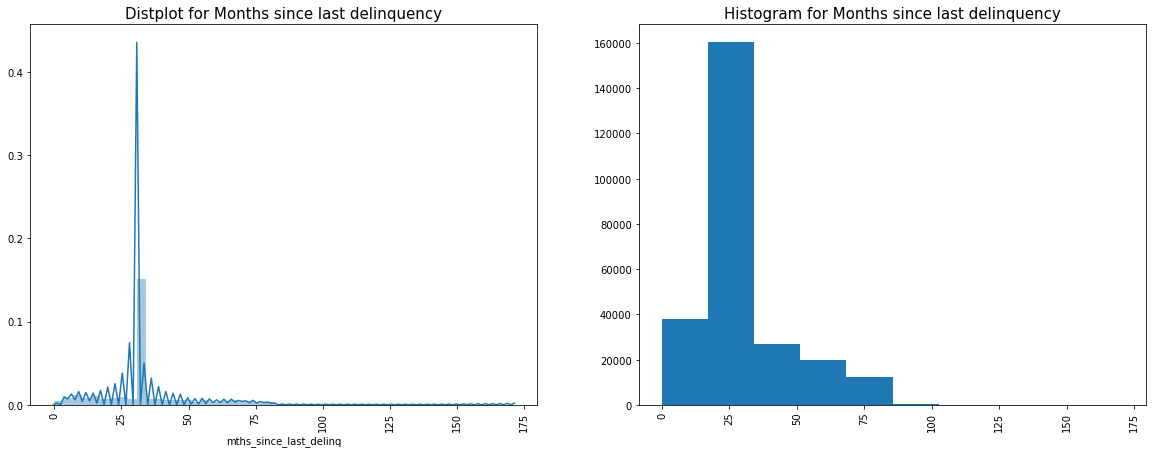

In [575]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.mths_since_last_delinq)
plt.title("Distplot for Months since last delinquency", size = 15)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.mths_since_last_delinq)
plt.xticks(rotation = 90)
plt.title("Histogram for Months since last delinquency", size = 15)
plt.show()

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

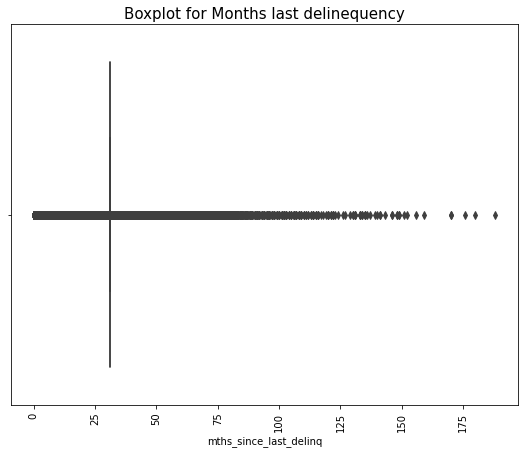

In [576]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.boxplot(df_train.mths_since_last_delinq)
plt.title("Boxplot for Months last delinequency", size = 15)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

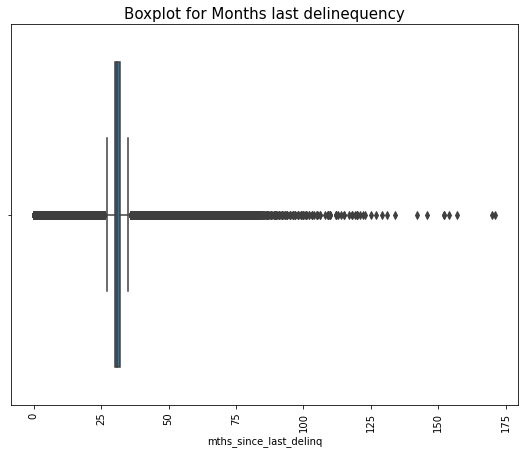

In [577]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.boxplot(df_test.mths_since_last_delinq)
plt.title("Boxplot for Months last delinequency", size = 15)
plt.xticks(rotation = 90)

In [578]:
q3 = np.quantile(df_train['mths_since_last_delinq'], 0.75) + 1.5*((np.quantile(df_train['mths_since_last_delinq'], 0.75)) - 
                                                           (np.quantile(df_train['mths_since_last_delinq'], 0.25)))
q1 = np.quantile(df_train['mths_since_last_delinq'], 0.25) - 1.5*((np.quantile(df_train['mths_since_last_delinq'], 0.75)) - 
                                                           (np.quantile(df_train['mths_since_last_delinq'], 0.25)))
print(q1, q3)

31.0 31.0


Open Account = The number of open credit lines in the borrower's credit file.

In [579]:
df_train.open_acc.describe()

count    598978.000000
mean         11.357197
std           5.138351
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

In [580]:
df_test.open_acc.describe()

count    256989.000000
mean         11.974252
std           5.660612
min           1.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          82.000000
Name: open_acc, dtype: float64

In [581]:
print("Skewness: ", round(df_train.open_acc.skew(),2))
print("Kurtosis: ", round(df_train.open_acc.kurt(),2))
print("Skewness: ", round(df_test.open_acc.skew(),2))
print("Kurtosis: ", round(df_test.open_acc.kurt(),2))

Skewness:  1.21
Kurtosis:  3.01
Skewness:  1.27
Kurtosis:  3.0


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text major ticklabel objects>)

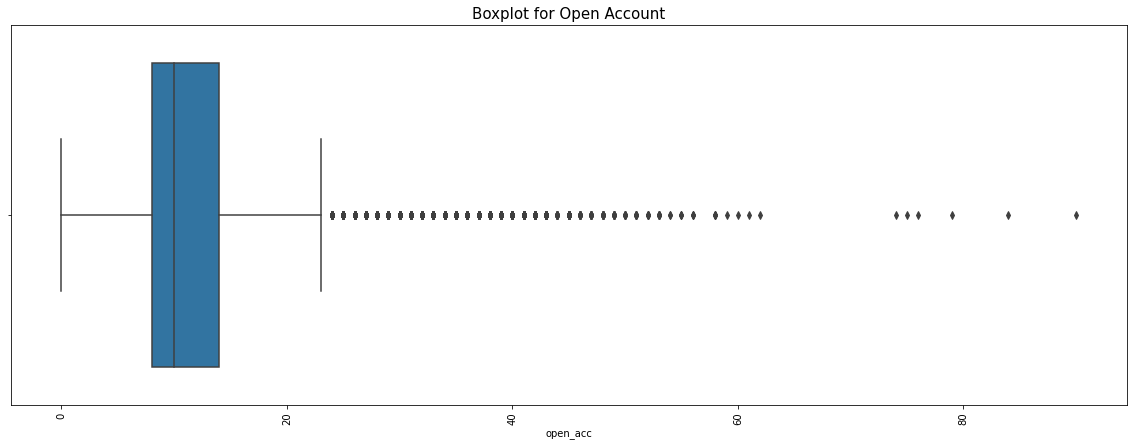

In [582]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.open_acc)
plt.title("Boxplot for Open Account", size = 15)
plt.xticks(rotation = 90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text major ticklabel objects>)

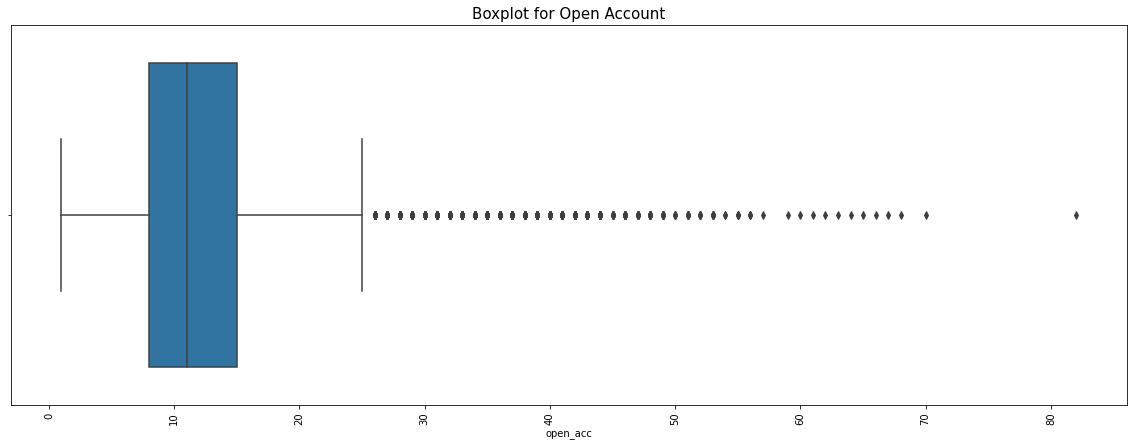

In [583]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.open_acc)
plt.title("Boxplot for Open Account", size = 15)
plt.xticks(rotation = 90)

Public Records = Number of Public derogatory records

In [584]:
df_train.pub_rec.describe()

count    598978.000000
mean          0.177768
std           0.547331
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

In [585]:
df_test.pub_rec.describe()

count    256989.000000
mean          0.233625
std           0.652834
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [586]:
round((len(df_train[df_train['pub_rec'] == 0]) / df_train.shape[0]) * 100, 2)

85.79

In [587]:
round((len(df_test[df_test['pub_rec'] == 0]) / df_test.shape[0]) * 100, 2)

82.32

In [588]:
print("Skewness: ", round(df_train.pub_rec.skew(),2))
print("Kurtosis: ", round(df_train.pub_rec.kurt(),2))
print("Skewness: ", round(df_test.pub_rec.skew(),2))
print("Kurtosis: ", round(df_test.pub_rec.kurt(),2))

Skewness:  12.76
Kurtosis:  796.41
Skewness:  14.33
Kurtosis:  1241.72


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

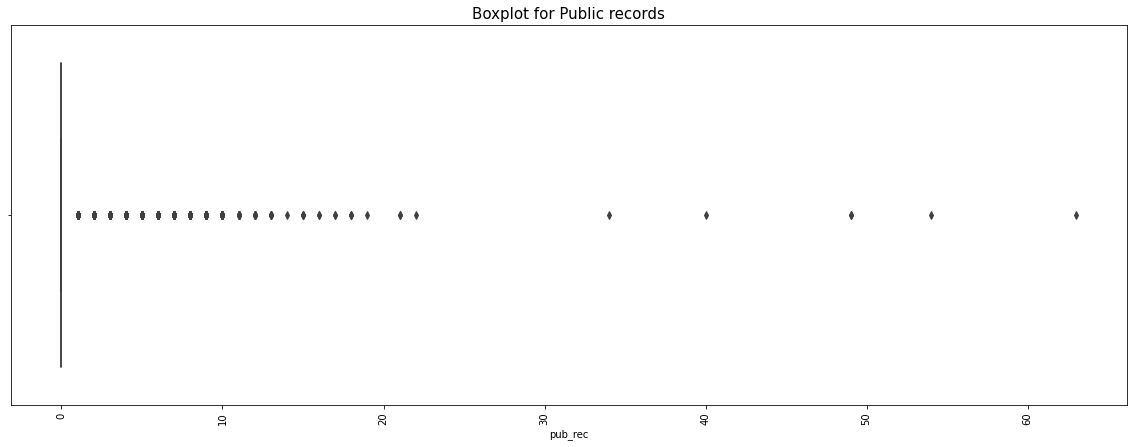

In [589]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.pub_rec)
plt.title("Boxplot for Public records", size = 15)
plt.xticks(rotation = 90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text major ticklabel objects>)

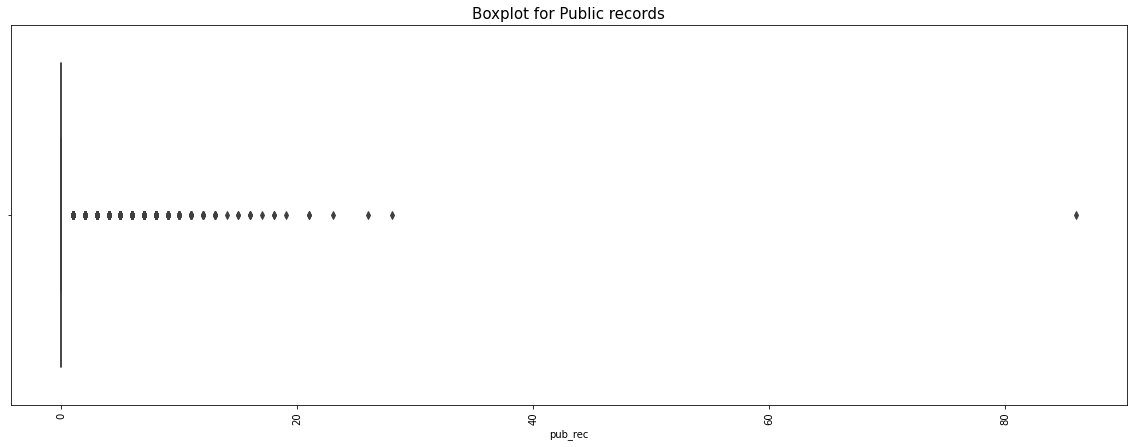

In [590]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.pub_rec)
plt.title("Boxplot for Public records", size = 15)
plt.xticks(rotation = 90)

In [591]:
pub_0 = df_train[df_train['pub_rec'] > 0]
pub_0['pub_rec'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 11., 49., 10., 54.,
       12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34., 17., 22.])

Revolving Balance = Total Credit revolving Balance

In [592]:
df_train.revol_bal.describe()

count    5.989780e+05
mean     1.650743e+04
std      2.093414e+04
min      0.000000e+00
25%      6.462000e+03
50%      1.187000e+04
75%      2.061800e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

In [593]:
df_test.revol_bal.describe()

count    2.569890e+05
mean     1.785011e+04
std      2.494715e+04
min      0.000000e+00
25%      6.484000e+03
50%      1.198200e+04
75%      2.146200e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [594]:
print("Skewness: ", round(df_train.revol_bal.skew(),2))
print("Kurtosis: ", round(df_train.revol_bal.kurt(),2))
print("Skewness: ", round(df_test.revol_bal.skew(),2))
print("Kurtosis: ", round(df_test.revol_bal.kurt(),2))

Skewness:  16.79
Kurtosis:  1098.37
Skewness:  15.03
Kurtosis:  905.97


(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000.]),
 <a list of 8 Text major ticklabel objects>)

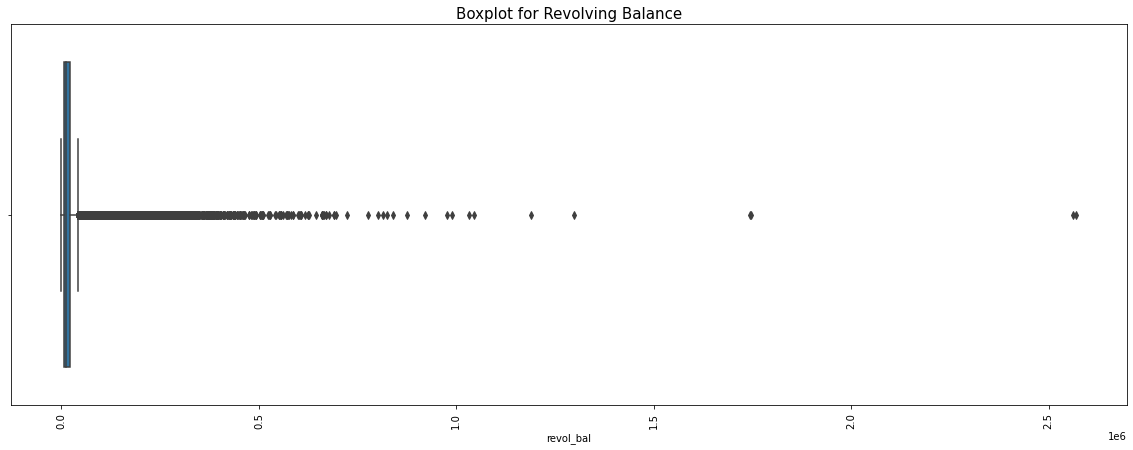

In [595]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.revol_bal)
plt.title("Boxplot for Revolving Balance", size = 15)
plt.xticks(rotation = 90)

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 <a list of 9 Text major ticklabel objects>)

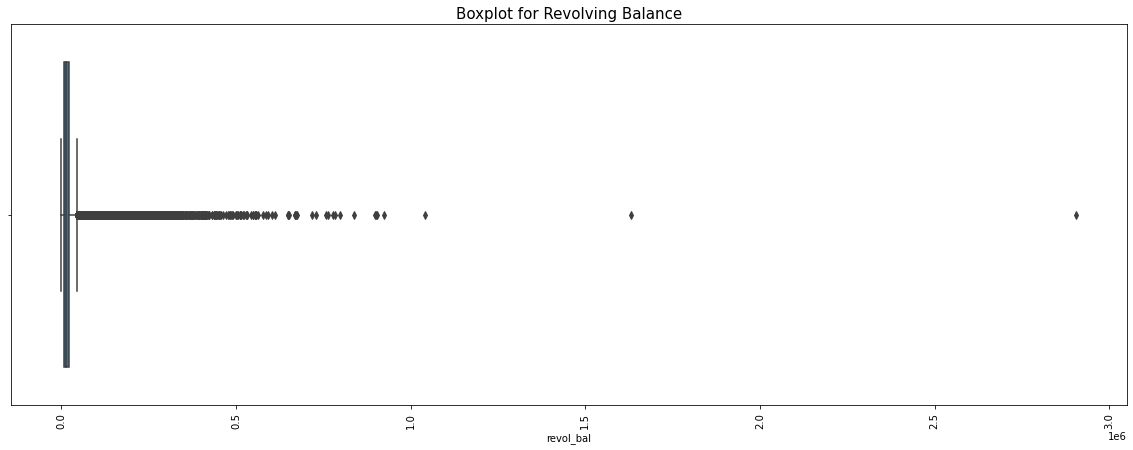

In [596]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.revol_bal)
plt.title("Boxplot for Revolving Balance", size = 15)
plt.xticks(rotation = 90)

In [597]:
max_train = df_train['revol_bal'].quantile(0.99)
max_train

85803.97999999952

In [598]:
max_test = df_test['revol_bal'].quantile(0.99)
max_test

107112.12

In [599]:
df_train.loc[df_train.revol_bal > 1000000, 'revol_bal'] = np.nan
df_train.revol_bal.fillna(max_train,inplace=True)

In [600]:
df_test.loc[df_test.revol_bal > 820000, 'revol_bal'] = np.nan
df_test.revol_bal.fillna(max_test,inplace=True)

In [601]:
print("Skewness: ", round(df_train.revol_bal.skew(),2))
print("Kurtosis: ", round(df_train.revol_bal.kurt(),2))
print("Skewness: ", round(df_test.revol_bal.skew(),2))
print("Kurtosis: ", round(df_test.revol_bal.kurt(),2))

Skewness:  9.04
Kurtosis:  183.73
Skewness:  7.99
Kurtosis:  123.14


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]),
 <a list of 8 Text major ticklabel objects>)

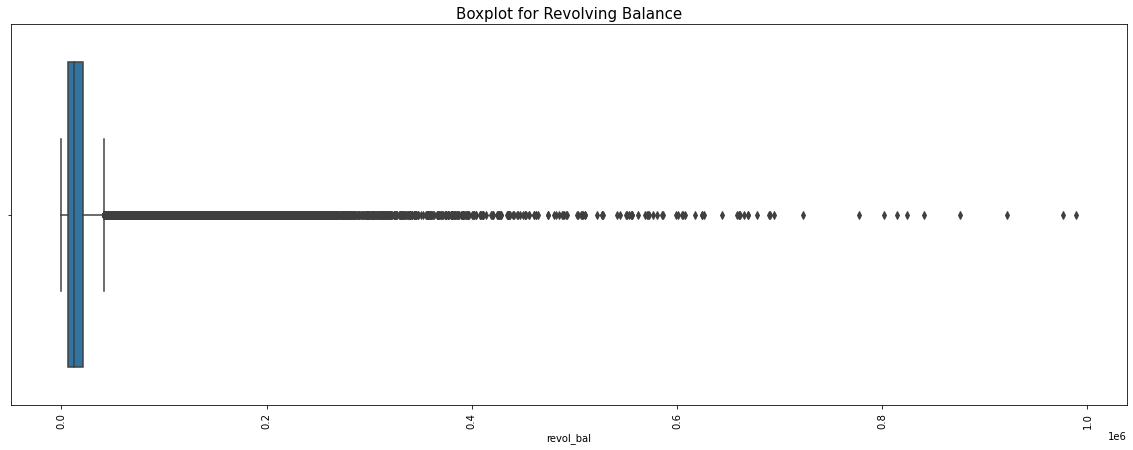

In [602]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.revol_bal)
plt.title("Boxplot for Revolving Balance", size = 15)
plt.xticks(rotation = 90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text major ticklabel objects>)

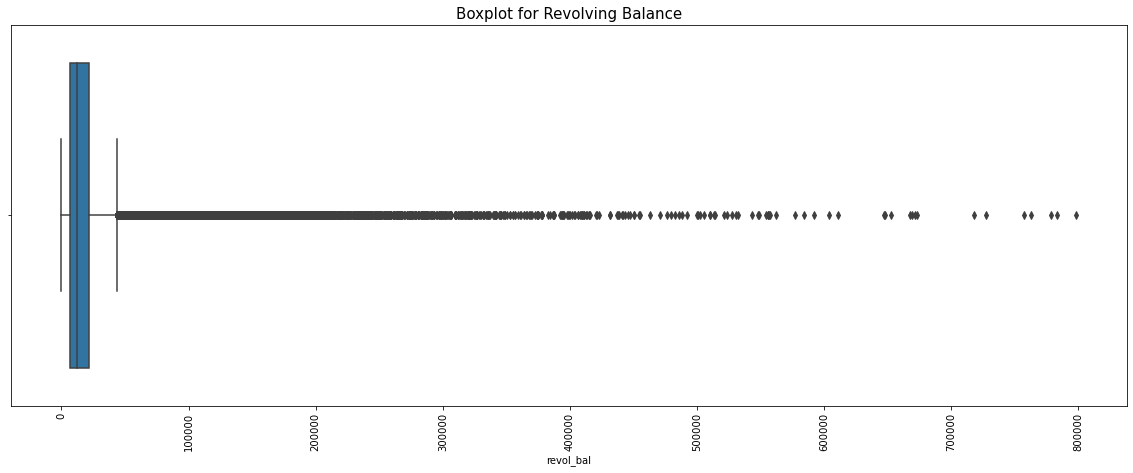

In [603]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.revol_bal)
plt.title("Boxplot for Revolving Balance", size = 15)
plt.xticks(rotation = 90)

Revolving Balance Utility = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [604]:
print(df.revol_util.isnull().sum(), df_train.revol_util.isnull().sum(), df_test.revol_util.isnull().sum())

446 341 105


In [605]:
df_train.revol_util

0         83.7
1          9.4
2         98.5
3         21.0
4         53.9
          ... 
855964    82.1
855965    84.5
855966    61.3
855967    30.6
855968    79.8
Name: revol_util, Length: 598978, dtype: float64

In [606]:
df_train.revol_util.describe()

count    598637.000000
mean         55.838410
std          23.711238
min           0.000000
25%          38.800000
50%          57.000000
75%          74.300000
max         892.300000
Name: revol_util, dtype: float64

In [607]:
df_test.revol_util.describe()

count    256884.000000
mean         53.110675
std          23.935339
min           0.000000
25%          35.200000
50%          53.200000
75%          71.400000
max         193.000000
Name: revol_util, dtype: float64

In [608]:
df_train['revol_util'].fillna(df_train.revol_util.mean(), inplace = True)
df_test['revol_util'].fillna(df_test.revol_util.mean(), inplace = True)

In [609]:
print(df.revol_util.isnull().sum(), df_train.revol_util.isnull().sum(), df_test.revol_util.isnull().sum())

446 0 0


In [610]:
print("Skewness: ", round(df_train.revol_util.skew(),2))
print("Kurtosis: ", round(df_train.revol_util.kurt(),2))
print("Skewness: ", round(df_test.revol_util.skew(),2))
print("Kurtosis: ", round(df_test.revol_util.kurt(),2))

Skewness:  -0.15
Kurtosis:  1.9
Skewness:  -0.05
Kurtosis:  -0.76


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text major ticklabel objects>)

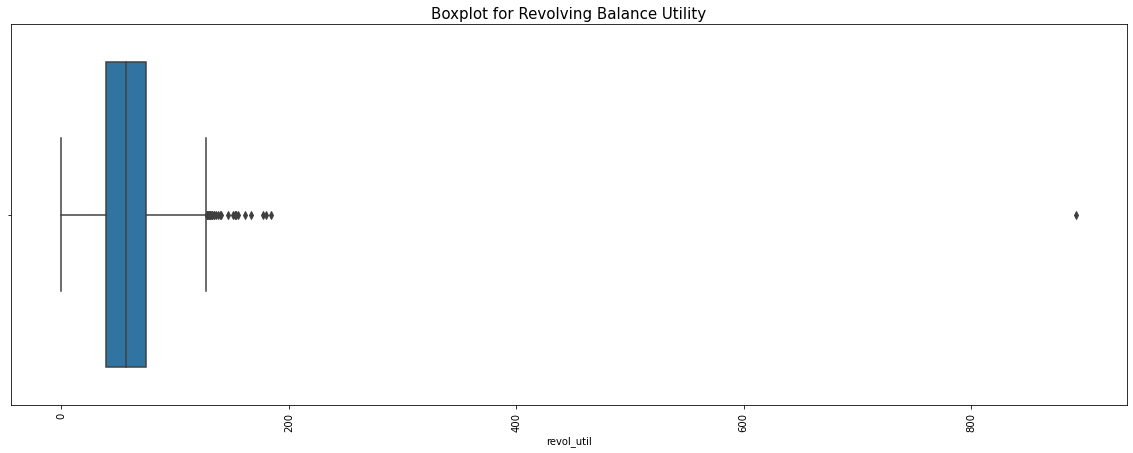

In [611]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.revol_util)
plt.title("Boxplot for Revolving Balance Utility", size = 15)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

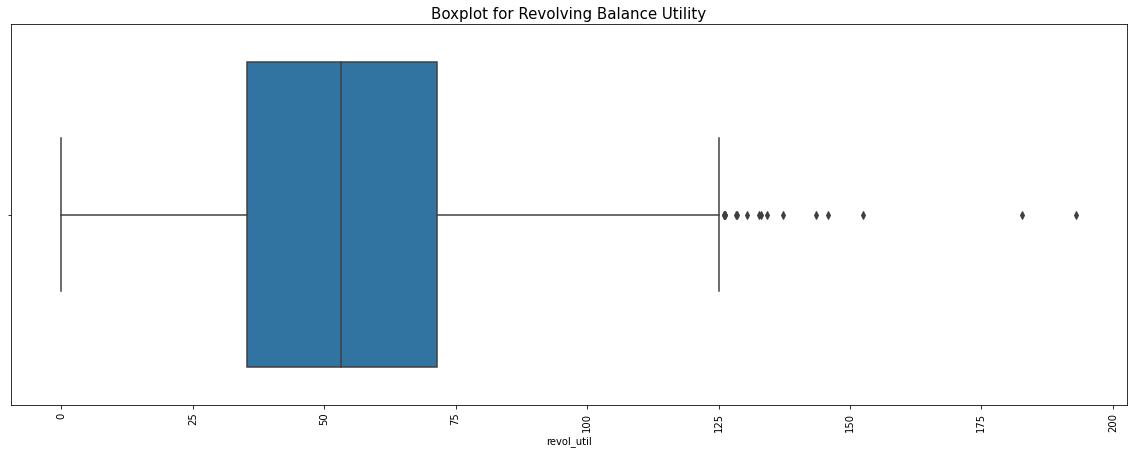

In [612]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.revol_util)
plt.title("Boxplot for Revolving Balance Utility", size = 15)
plt.xticks(rotation = 90)

In [613]:
max_train = df_test['revol_util'].quantile(0.99)
max_train

98.9

In [614]:
df_train.loc[df_train.revol_util > 800, 'revol_util'] = np.nan
df_train.revol_util.fillna(max_train,inplace=True)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

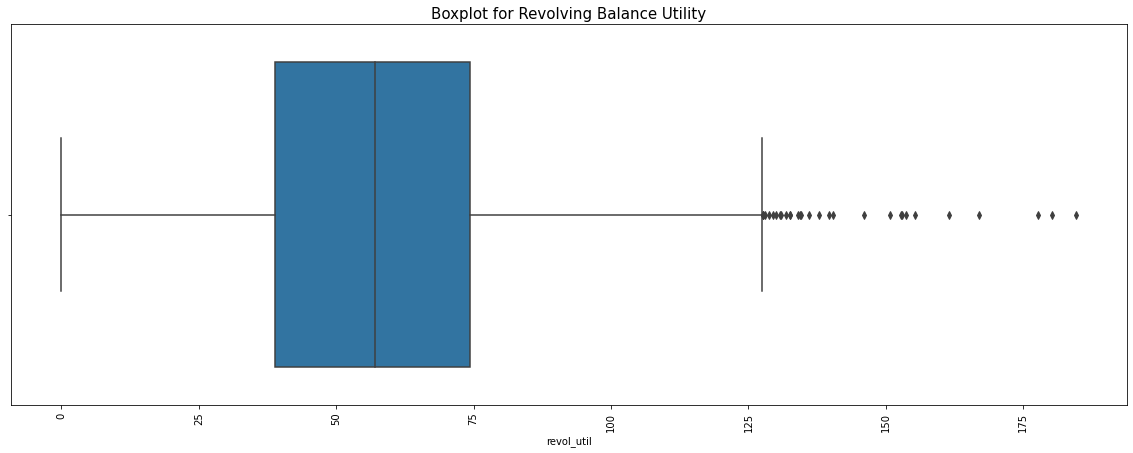

In [615]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.revol_util)
plt.title("Boxplot for Revolving Balance Utility", size = 15)
plt.xticks(rotation = 90)

In [616]:
print("Skewness: ", round(df_train.revol_util.skew(),2))
print("Kurtosis: ", round(df_train.revol_util.kurt(),2))

Skewness:  -0.23
Kurtosis:  -0.68


Total Account = The total number of credit lines currently in the borrower's credit file

In [617]:
df_train.total_acc.describe()

count    598978.000000
mean         25.226733
std          11.717682
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         162.000000
Name: total_acc, dtype: float64

In [618]:
df_test.total_acc.describe()

count    256989.000000
mean         25.368487
std          12.050771
min           4.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

In [619]:
print("Skewness: ", round(df_train.revol_util.skew(),2))
print("Kurtosis: ", round(df_train.revol_util.kurt(),2))
print("Skewness: ", round(df_test.revol_util.skew(),2))
print("Kurtosis: ", round(df_test.revol_util.kurt(),2))

Skewness:  -0.23
Kurtosis:  -0.68
Skewness:  -0.05
Kurtosis:  -0.76


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text major ticklabel objects>)

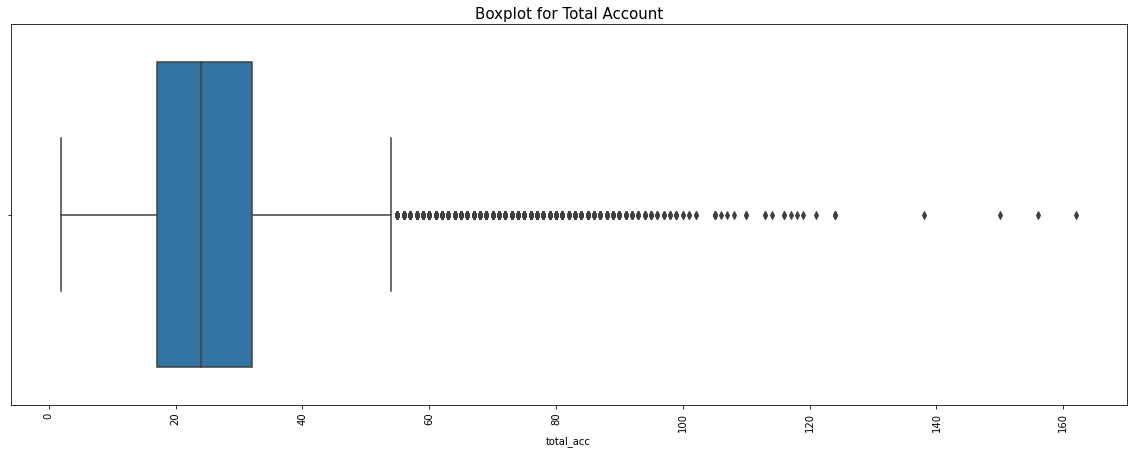

In [620]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.total_acc)
plt.title("Boxplot for Total Account", size = 15)
plt.xticks(rotation = 90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

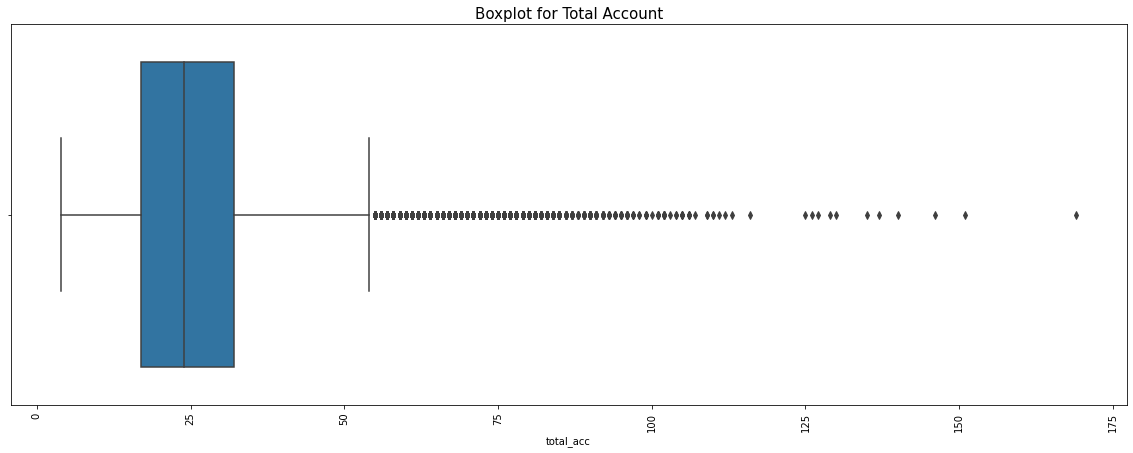

In [621]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_acc)
plt.title("Boxplot for Total Account", size = 15)
plt.xticks(rotation = 90)

In [622]:
max_train = df_train['total_acc'].quantile(0.99)
max_train

60.0

In [623]:
df_train.loc[df_train.total_acc > 120, 'total_acc'] = np.nan
df_train.total_acc.fillna(max_train,inplace=True)

In [624]:
max_test = df_test['total_acc'].quantile(0.99)
max_test

61.0

In [625]:
df_test.loc[df_test.total_acc > 133, 'total_acc'] = np.nan
df_test.total_acc.fillna(max_test,inplace=True)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

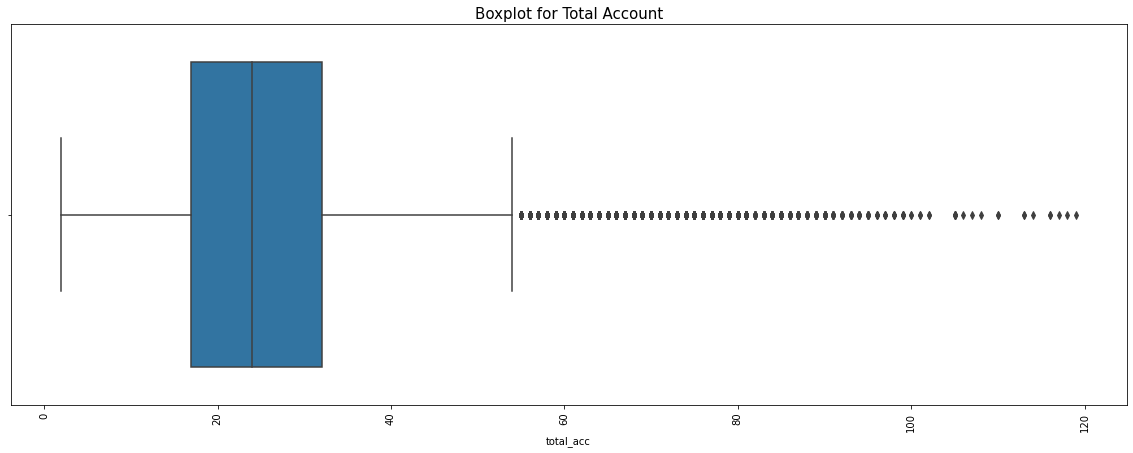

In [626]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.total_acc)
plt.title("Boxplot for Total Account", size = 15)
plt.xticks(rotation = 90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

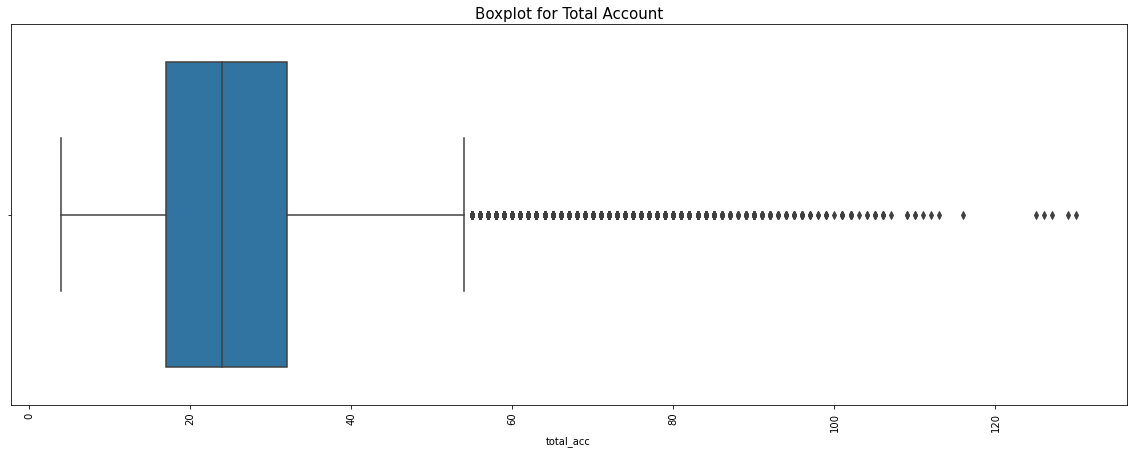

In [627]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_acc)
plt.title("Boxplot for Total Account", size = 15)
plt.xticks(rotation = 90)

Out Principal = Remaining outstanding principal for total amount funded

In [628]:
df_train.out_prncp.describe()

count    598978.000000
mean       5946.808215
std        7330.142896
min           0.000000
25%           0.000000
50%        3032.270000
75%       10070.040000
max       34073.890000
Name: out_prncp, dtype: float64

In [629]:
df_test.out_prncp.describe()

count    256989.000000
mean      13734.157713
std        8415.917925
min           0.000000
25%        7255.770000
50%       12280.720000
75%       19116.340000
max       49372.860000
Name: out_prncp, dtype: float64

In [630]:
print("Skewness: ", round(df_train.out_prncp.skew(),2))
print("Kurtosis: ", round(df_train.out_prncp.kurt(),2))
print("Skewness: ", round(df_test.out_prncp.skew(),2))
print("Kurtosis: ", round(df_test.out_prncp.kurt(),2))

Skewness:  1.25
Kurtosis:  0.86
Skewness:  0.58
Kurtosis:  -0.35


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

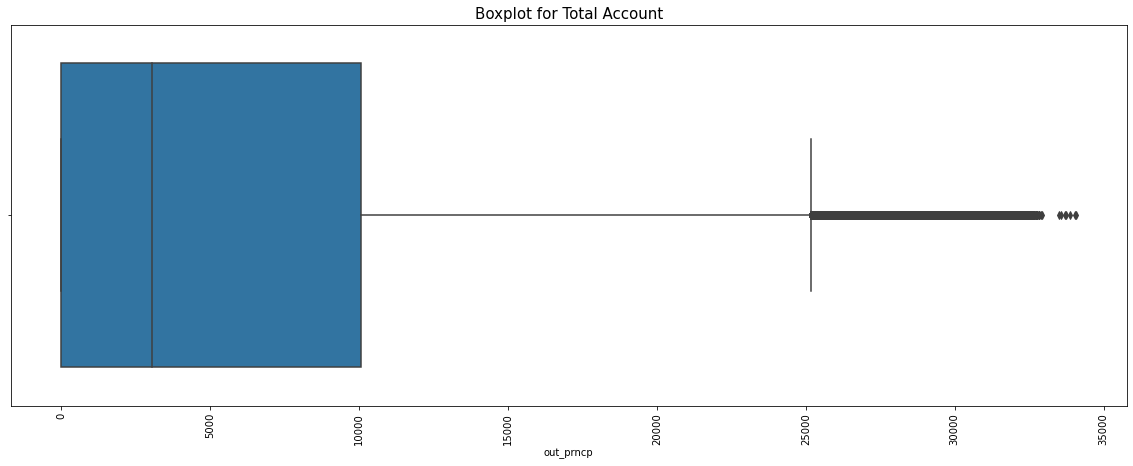

In [631]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.out_prncp)
plt.title("Boxplot for Total Account", size = 15)
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 <a list of 8 Text major ticklabel objects>)

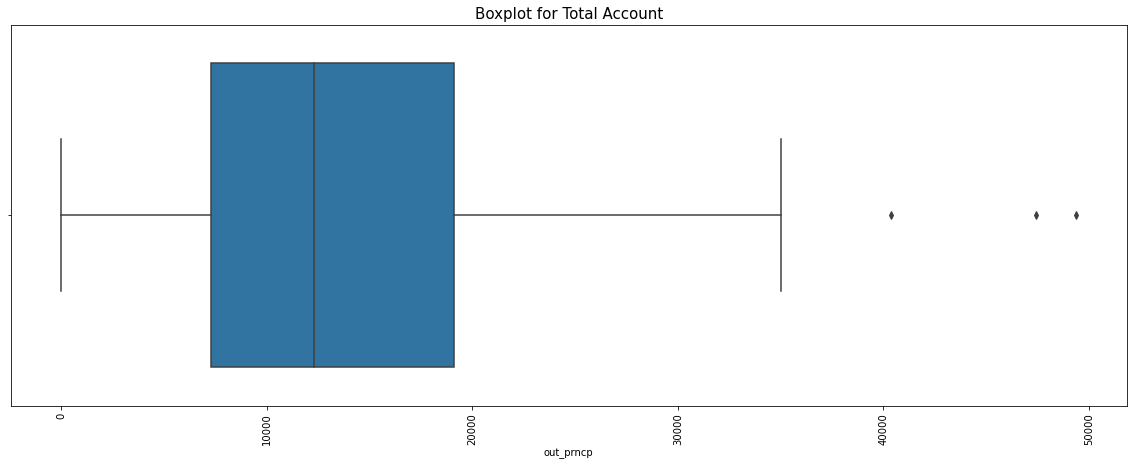

In [632]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.out_prncp)
plt.title("Boxplot for Total Account", size = 15)
plt.xticks(rotation = 90)

Outstanding Principal Investor = Remaining outstanding principal for portion of total amount funded by investors

In [633]:
df_train.out_prncp_inv.describe()

count    598978.000000
mean       5945.054198
std        7328.397671
min           0.000000
25%           0.000000
50%        3031.615000
75%       10066.860000
max       34073.890000
Name: out_prncp_inv, dtype: float64

In [634]:
df_test.out_prncp_inv.describe()

count    256989.000000
mean      13726.984982
std        8411.414144
min           0.000000
25%        7253.220000
50%       12273.150000
75%       19098.780000
max       49372.860000
Name: out_prncp_inv, dtype: float64

In [635]:
print(df_train.out_prncp_inv.isnull().sum(), df)

0               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599     5000.0       5000.0           4975.0   
1        1077430    1314167     2500.0       2500.0           2500.0   
2        1077175    1313524     2400.0       2400.0           2400.0   
3        1076863    1277178    10000.0      10000.0          10000.0   
4        1075358    1311748     3000.0       3000.0           3000.0   
...          ...        ...        ...          ...              ...   
855964  36371250   39102635    10000.0      10000.0          10000.0   
855965  36441262   39152692    24000.0      24000.0          24000.0   
855966  36271333   38982739    13000.0      13000.0          13000.0   
855967  36490806   39222577    12000.0      12000.0          12000.0   
855968  36271262   38982659    20000.0      20000.0          20000.0   

              term  int_rate  installment grade sub_grade  \
0        36 months     10.65       162.87     B        B2   
1        60

In [636]:
round(((len(df_train[df_train["out_prncp"] == df_train["out_prncp_inv"]]) / df_train.shape[0]) * 100 ), 2)

95.31

In [637]:
round(((len(df_test[df_test["out_prncp"] == df_test["out_prncp_inv"]]) / df_test.shape[0]) * 100 ), 2)

90.79

In [638]:
print("Skewness: ", round(df_train.out_prncp_inv.skew(),2))
print("Kurtosis: ", round(df_train.out_prncp_inv.kurt(),2))
print("Skewness: ", round(df_test.out_prncp_inv.skew(),2))
print("Kurtosis: ", round(df_test.out_prncp_inv.kurt(),2))

Skewness:  1.25
Kurtosis:  0.86
Skewness:  0.58
Kurtosis:  -0.36


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

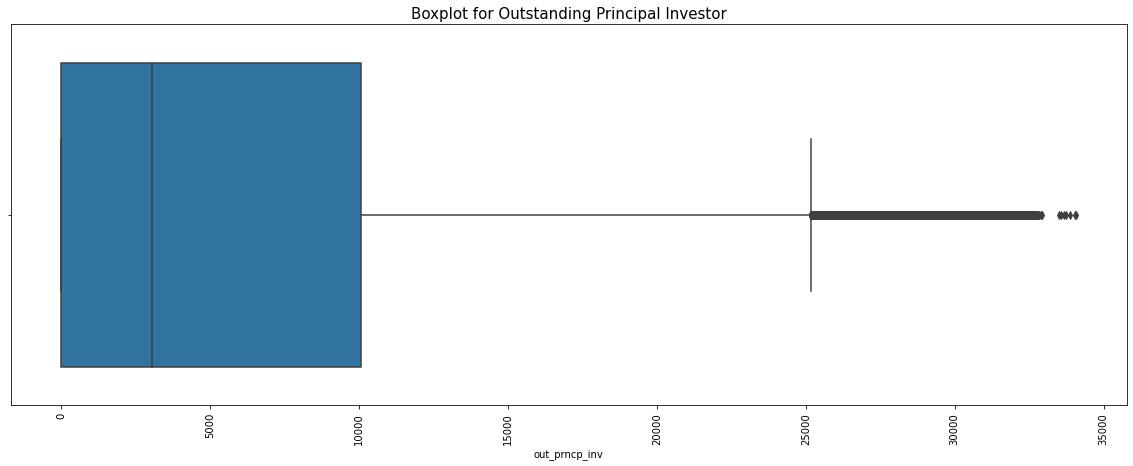

In [639]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.out_prncp_inv)
plt.title("Boxplot for Outstanding Principal Investor", size = 15)
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 <a list of 8 Text major ticklabel objects>)

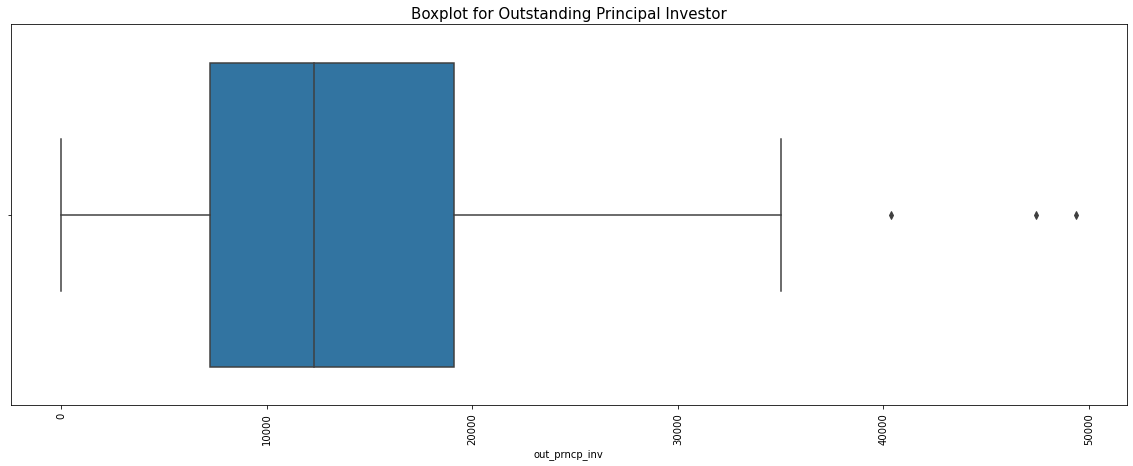

In [640]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.out_prncp_inv)
plt.title("Boxplot for Outstanding Principal Investor", size = 15)
plt.xticks(rotation = 90)

In [641]:
len(df_test[df_test['out_prncp_inv'] > 40000])

3

In [642]:
max_test = df_test['out_prncp_inv'].quantile(0.99)
df_test.loc[df_test.out_prncp_inv > 40000, 'out_prncp_inv'] = np.nan
df_test.out_prncp_inv.fillna(max_test,inplace=True)

In [643]:
len(df_test[df_test['out_prncp_inv'] > 40000])

0

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

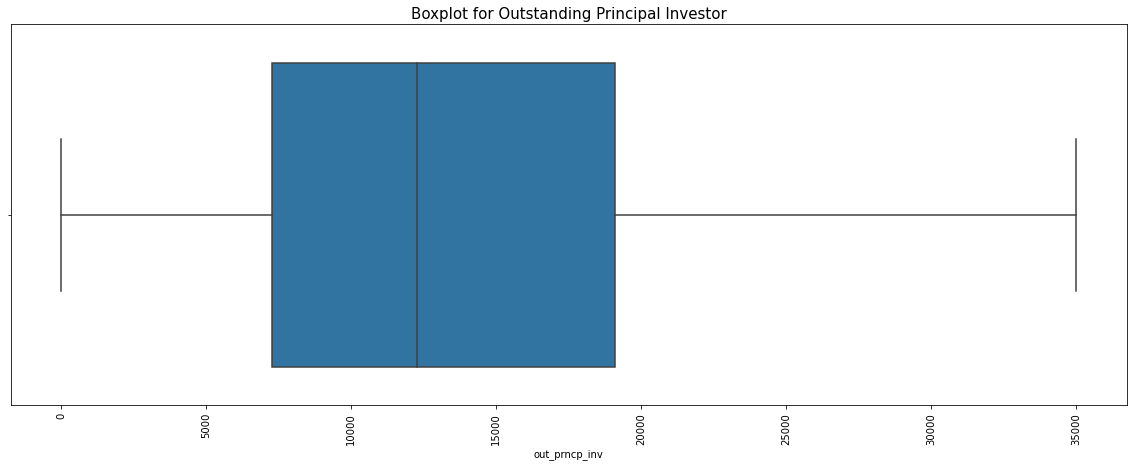

In [644]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.out_prncp_inv)
plt.title("Boxplot for Outstanding Principal Investor", size = 15)
plt.xticks(rotation = 90)

Total Payment = Payments received to date for total amount funded                                                               
Total Payment Funded = Payments received to date for total amount funded by Investor

In [645]:
print(df_train.total_pymnt.describe(),  df_train.total_pymnt_inv.describe(),
      df_test.total_pymnt.describe(),  df_test.total_pymnt_inv.describe())

count    598978.000000
mean      10073.087967
std        8091.548244
min           0.000000
25%        4242.350000
50%        7631.015000
75%       13403.250000
max       57777.579870
Name: total_pymnt, dtype: float64 count    598978.000000
mean      10029.098206
std        8070.839362
min           0.000000
25%        4219.600000
50%        7593.020000
75%       13349.895000
max       57777.580000
Name: total_pymnt_inv, dtype: float64 count    256989.000000
mean       2013.414546
std        3210.771610
min           0.000000
25%         604.730000
50%        1263.360000
75%        2310.870000
max       39967.550000
Name: total_pymnt, dtype: float64 count    256989.000000
mean       2012.437708
std        3209.129925
min           0.000000
25%         604.300000
50%        1262.790000
75%        2310.810000
max       39967.550000
Name: total_pymnt_inv, dtype: float64


In [646]:
round(((len(df_train[df_train["total_pymnt"] == df_train["total_pymnt_inv"]]) / df_train.shape[0]) * 100 ), 2)

76.54

In [647]:
round(((len(df_test[df_test["total_pymnt"] == df_test["total_pymnt_inv"]]) / df_test.shape[0]) * 100 ), 2)

90.66

In [648]:
print("Skewness: ", round(df_train.total_pymnt.skew(),2))
print("Kurtosis: ", round(df_train.total_pymnt.kurt(),2))
print("Skewness: ", round(df_test.total_pymnt.skew(),2))
print("Kurtosis: ", round(df_test.total_pymnt.kurt(),2))
print()
print("Skewness: ", round(df_train.total_pymnt_inv.skew(),2))
print("Kurtosis: ", round(df_train.total_pymnt_inv.kurt(),2))
print("Skewness: ", round(df_test.total_pymnt_inv.skew(),2))
print("Kurtosis: ", round(df_test.total_pymnt_inv.kurt(),2))

Skewness:  1.57
Kurtosis:  2.75
Skewness:  6.11
Kurtosis:  48.13

Skewness:  1.58
Kurtosis:  2.76
Skewness:  6.11
Kurtosis:  48.12


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 <a list of 9 Text major ticklabel objects>)

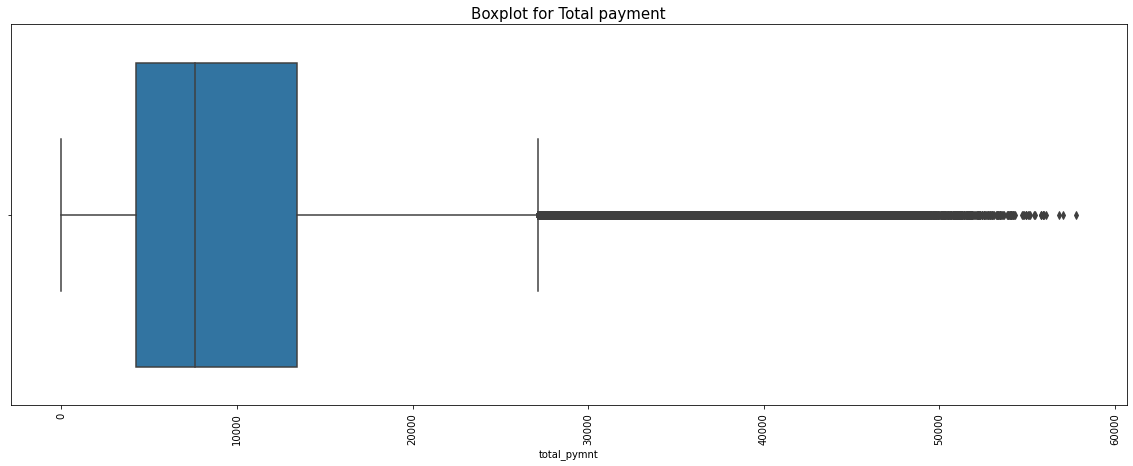

In [649]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.total_pymnt)
plt.title("Boxplot for Total payment", size = 15)
plt.xticks(rotation = 90)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000., 45000.]),
 <a list of 11 Text major ticklabel objects>)

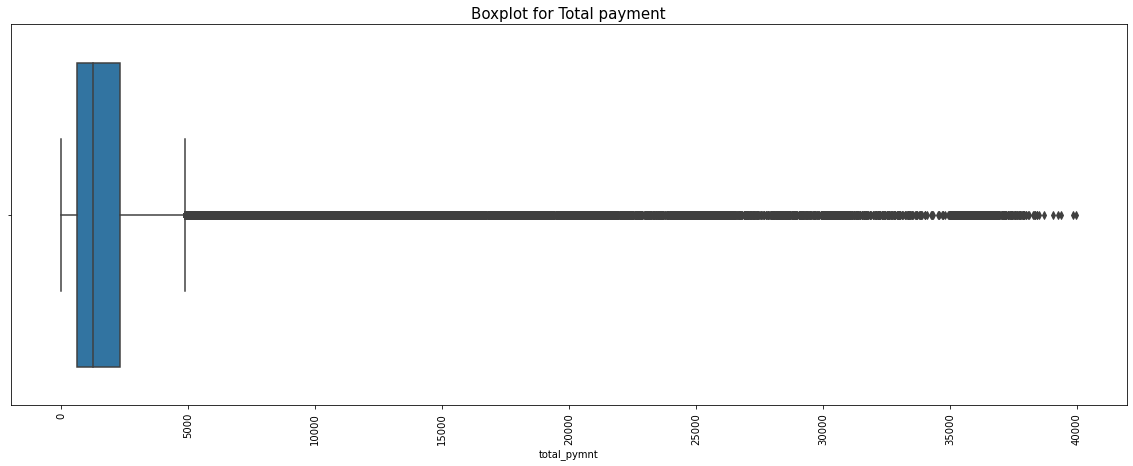

In [650]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_pymnt)
plt.title("Boxplot for Total payment", size = 15)
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 <a list of 9 Text major ticklabel objects>)

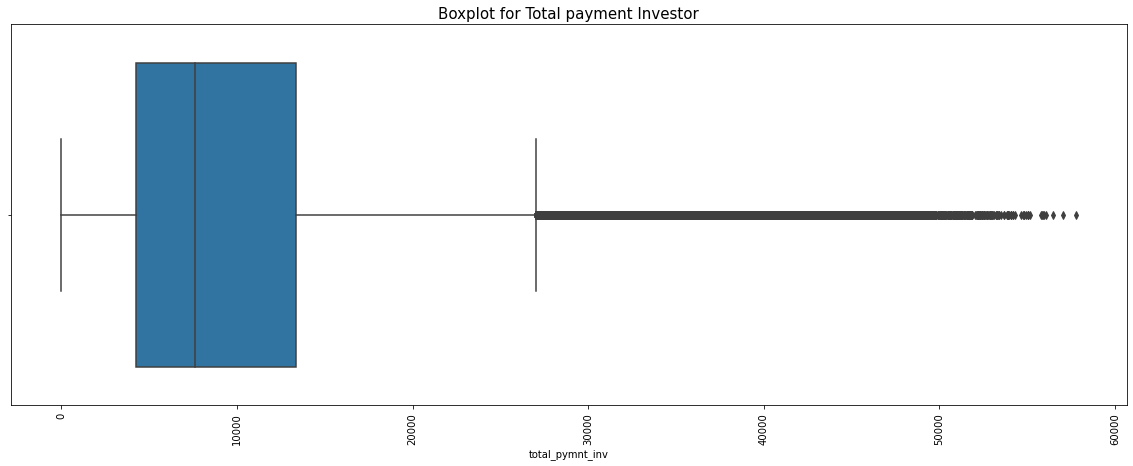

In [651]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.total_pymnt_inv)
plt.title("Boxplot for Total payment Investor", size = 15)
plt.xticks(rotation = 90)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000., 45000.]),
 <a list of 11 Text major ticklabel objects>)

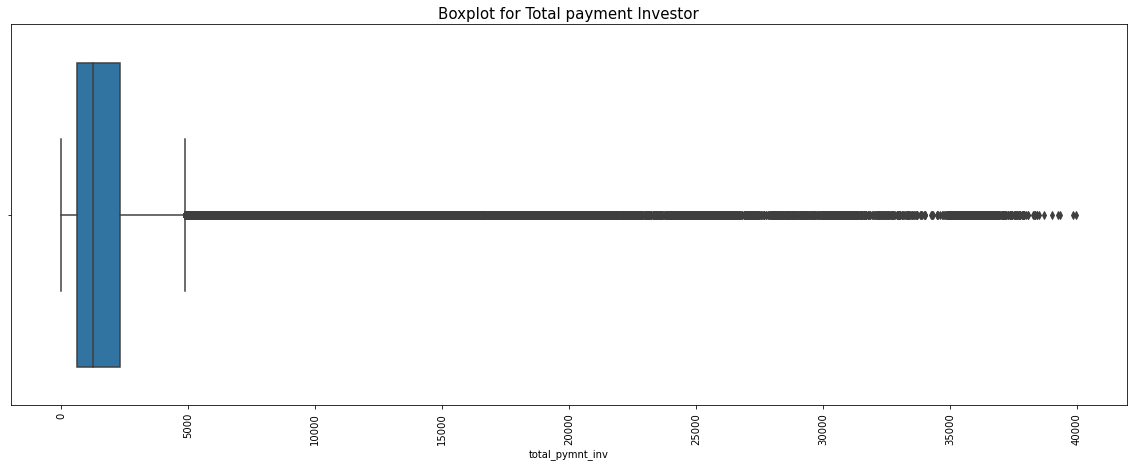

In [652]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_pymnt_inv)
plt.title("Boxplot for Total payment Investor", size = 15)
plt.xticks(rotation = 90)

Total Rec Principal = Principal received to date

In [653]:
df_train.total_rec_prncp.describe()

count    598978.000000
mean       7730.781476
std        6923.288534
min           0.000000
25%        2764.050000
50%        5393.340000
75%       10150.382500
max       35000.030000
Name: total_rec_prncp, dtype: float64

In [654]:
df_test.total_rec_prncp.describe()

count    256989.000000
mean       1469.206727
std        3051.752078
min           0.000000
25%         382.440000
50%         789.870000
75%        1469.030000
max       35000.000000
Name: total_rec_prncp, dtype: float64

In [655]:
print("Skewness: ", round(df_train.total_rec_prncp.skew(),2))
print("Kurtosis: ", round(df_train.total_rec_prncp.kurt(),2))
print("Skewness: ", round(df_test.total_rec_prncp.skew(),2))
print("Kurtosis: ", round(df_test.total_rec_prncp.kurt(),2))

Skewness:  1.63
Kurtosis:  2.68
Skewness:  6.85
Kurtosis:  56.17


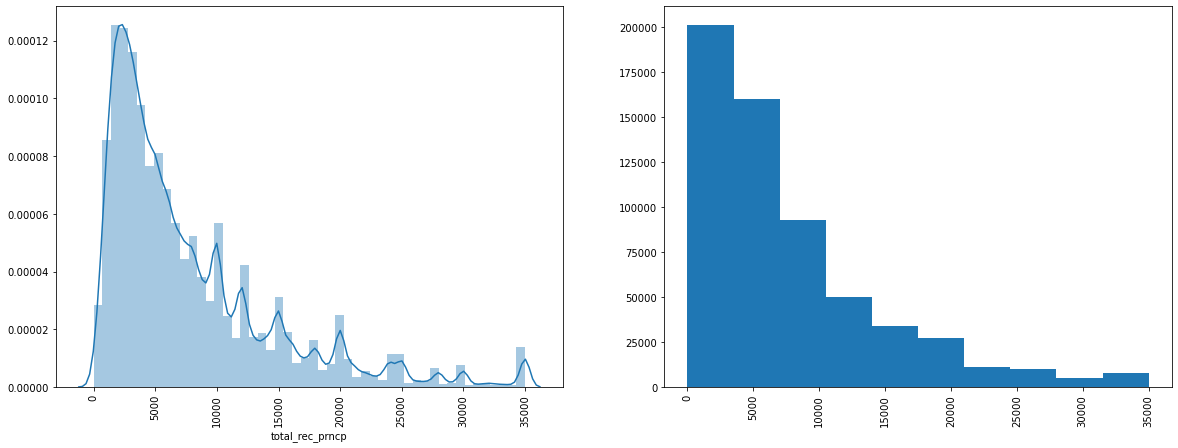

In [656]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.total_rec_prncp)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.total_rec_prncp)
plt.xticks(rotation = 90)
plt.show()

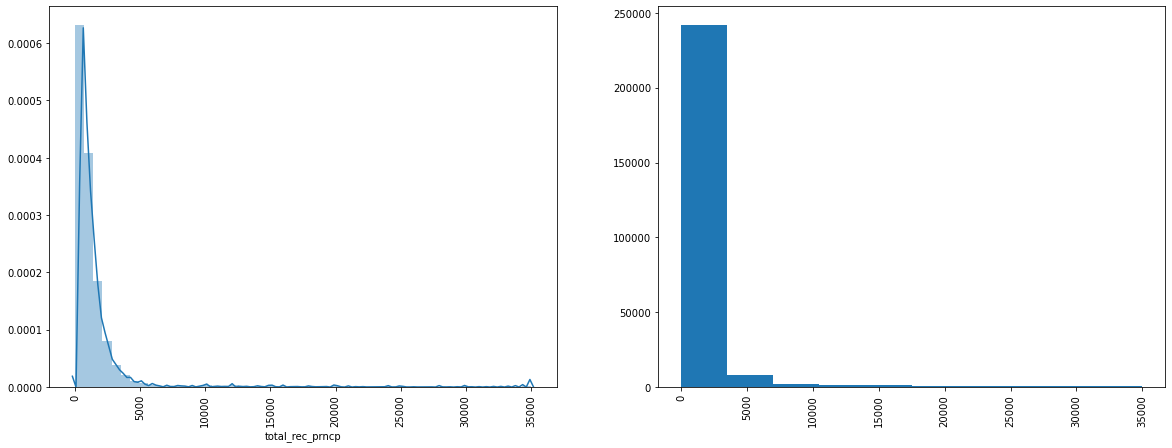

In [657]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.total_rec_prncp)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.total_rec_prncp)
plt.xticks(rotation = 90)
plt.show()

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

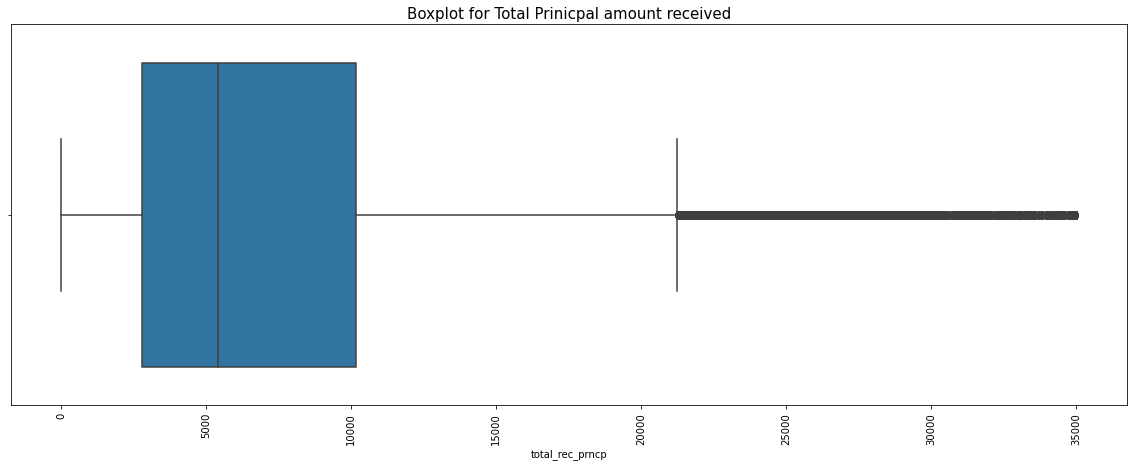

In [658]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.total_rec_prncp)
plt.title("Boxplot for Total Prinicpal amount received", size = 15)
plt.xticks(rotation = 90)

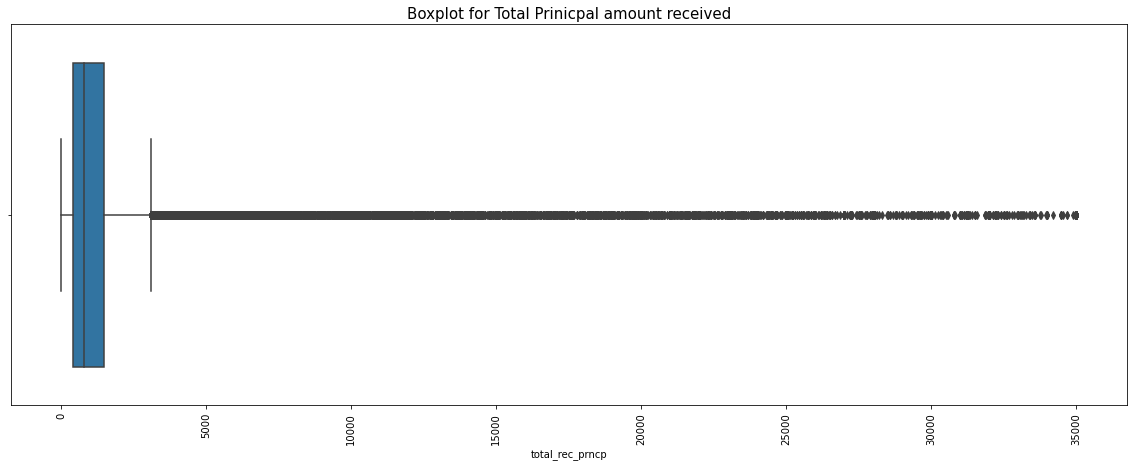

In [659]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_rec_prncp)
plt.title("Boxplot for Total Prinicpal amount received", size = 15)
plt.xticks(rotation = 90)
plt.savefig("boxplot", bbox_inches="tight")

In [660]:
payment_detail = df_train[['total_pymnt', 'total_rec_int', "total_rec_late_fee", "total_rec_prncp"]]
payment_detail

,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp
0,5861.071414,861.07,0.00,5000.00
1,1008.710000,435.17,0.00,456.46
2,3003.653644,603.65,0.00,2400.00
3,12226.302212,2209.33,16.97,10000.00
4,3242.170000,1009.07,0.00,2233.10
...,...,...,...,...
855964,3971.880000,1027.35,0.00,2944.53
855965,9532.390000,2465.65,0.00,7066.74
855966,3769.740000,1925.24,0.00,1844.50
855967,3787.670000,2234.98,0.00,1552.69


In [661]:
payment_detail['total'] = (payment_detail['total_rec_int'] + payment_detail['total_rec_late_fee'] + 
                          payment_detail['total_rec_prncp'])
payment_detail

,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,total
0,5861.071414,861.07,0.00,5000.00,5861.07
1,1008.710000,435.17,0.00,456.46,891.63
2,3003.653644,603.65,0.00,2400.00,3003.65
3,12226.302212,2209.33,16.97,10000.00,12226.30
4,3242.170000,1009.07,0.00,2233.10,3242.17
...,...,...,...,...,...
855964,3971.880000,1027.35,0.00,2944.53,3971.88
855965,9532.390000,2465.65,0.00,7066.74,9532.39
855966,3769.740000,1925.24,0.00,1844.50,3769.74
855967,3787.670000,2234.98,0.00,1552.69,3787.67


In [662]:
payment_detail['total_pymnt'] = round(payment_detail["total_pymnt"], 2)

In [663]:
round(((len(payment_detail[payment_detail["total_pymnt"] == payment_detail["total"]]) / df.shape[0]) * 100 ), 2)

56.08

In [664]:
payment_detail = df_test[['total_pymnt', 'total_rec_int', "total_rec_late_fee", "total_rec_prncp"]]
payment_detail

,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp
452272,682.67,40.64,0.0,642.03
452273,286.64,107.14,0.0,179.50
452274,0.00,0.00,0.0,0.00
452275,0.00,0.00,0.0,0.00
452276,0.00,0.00,0.0,0.00
...,...,...,...,...
733537,1916.60,890.52,0.0,1026.08
733662,2160.09,1455.86,0.0,704.23
734074,6320.12,2373.24,0.0,3946.88
734895,5368.68,890.66,0.0,4478.02


In [665]:
payment_detail['total'] = (payment_detail['total_rec_int'] + payment_detail['total_rec_late_fee'] + 
                          payment_detail['total_rec_prncp'])
payment_detail

,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,total
452272,682.67,40.64,0.0,642.03,682.67
452273,286.64,107.14,0.0,179.50,286.64
452274,0.00,0.00,0.0,0.00,0.00
452275,0.00,0.00,0.0,0.00,0.00
452276,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...
733537,1916.60,890.52,0.0,1026.08,1916.60
733662,2160.09,1455.86,0.0,704.23,2160.09
734074,6320.12,2373.24,0.0,3946.88,6320.12
734895,5368.68,890.66,0.0,4478.02,5368.68


In [666]:
payment_detail['total_pymnt'] = round(payment_detail["total_pymnt"], 2)
round(((len(payment_detail[payment_detail["total_pymnt"] == payment_detail["total"]]) / df.shape[0]) * 100 ), 2)

23.87

total_rec_int = Interest Received to date                                                                                       
total_rec_late_fee = Late fees received till date

In [667]:
print(df_train.total_rec_int.describe(), df_test.total_rec_int.describe(),
      df_train.total_rec_late_fee.describe(), df_test.total_rec_late_fee.describe())

count    598978.000000
mean       2274.617695
std        2270.974523
min           0.000000
25%         821.000000
50%        1573.125000
75%        2871.087500
max       24205.620000
Name: total_rec_int, dtype: float64 count    256989.000000
mean        544.065564
std         563.500046
min           0.000000
25%         161.280000
50%         358.330000
75%         734.700000
max        5621.670000
Name: total_rec_int, dtype: float64 count    598978.000000
mean          0.439511
std           4.245093
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64 count    256989.000000
mean          0.039884
std           1.130735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         127.500000
Name: total_rec_late_fee, dtype: float64


In [668]:
print("Skewness: ", round(df_train.total_rec_int.skew(),2))
print("Kurtosis: ", round(df_train.total_rec_int.kurt(),2))
print("Skewness: ", round(df_test.total_rec_int.skew(),2))
print("Kurtosis: ", round(df_test.total_rec_int.kurt(),2))
print()
print("Skewness: ", round(df_train.total_rec_late_fee.skew(),2))
print("Kurtosis: ", round(df_train.total_rec_late_fee.kurt(),2))
print("Skewness: ", round(df_test.total_rec_late_fee.skew(),2))
print("Kurtosis: ", round(df_test.total_rec_late_fee.kurt(),2))

Skewness:  2.51
Kurtosis:  9.05
Skewness:  2.12
Kurtosis:  6.12

Skewness:  16.49
Kurtosis:  482.53
Skewness:  40.09
Kurtosis:  2319.8


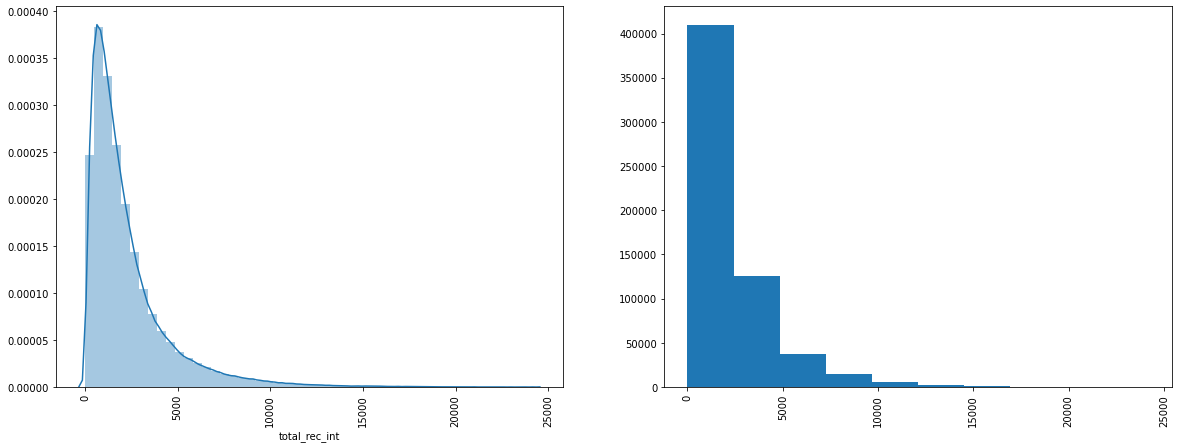

In [669]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.total_rec_int)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.total_rec_int)
plt.xticks(rotation = 90)
plt.show()

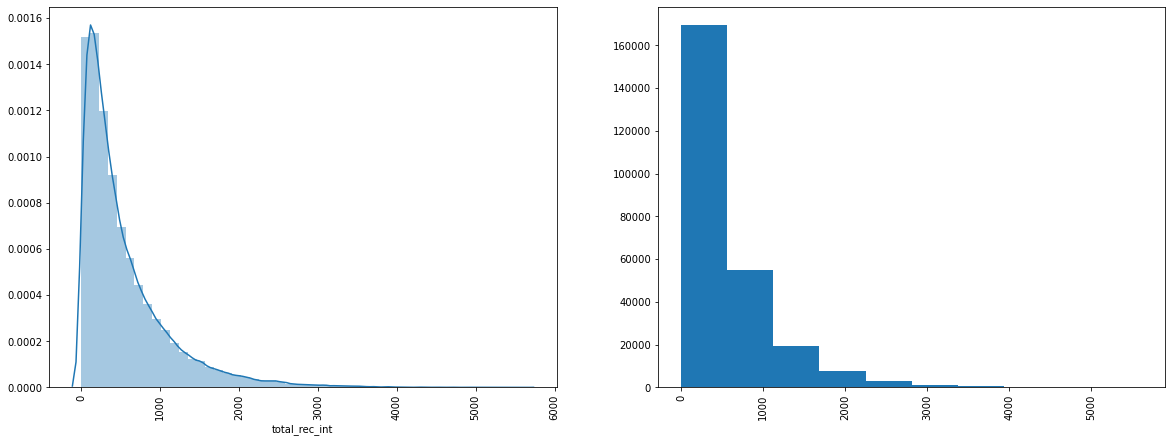

In [670]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.total_rec_int)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.total_rec_int)
plt.xticks(rotation = 90)
plt.show()

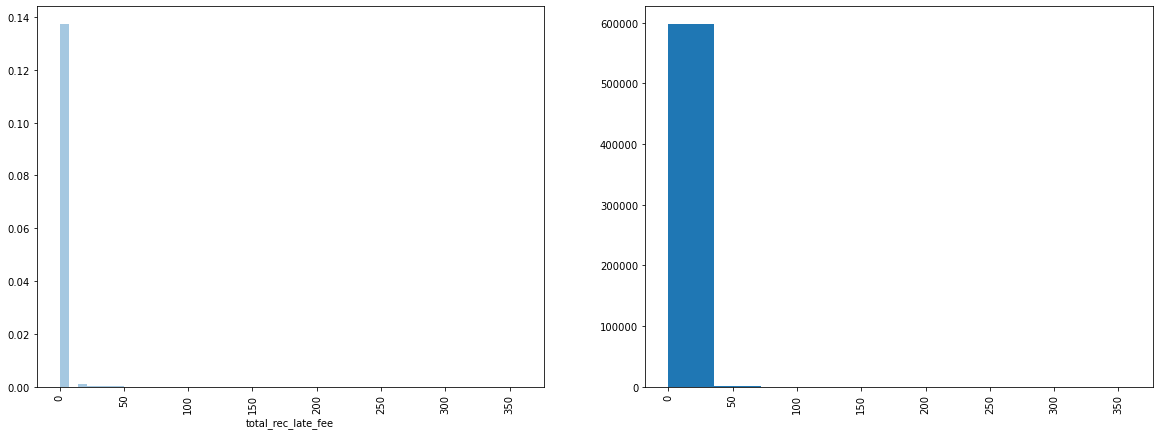

In [671]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_train.total_rec_late_fee)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_train.total_rec_late_fee)
plt.xticks(rotation = 90)
plt.show()

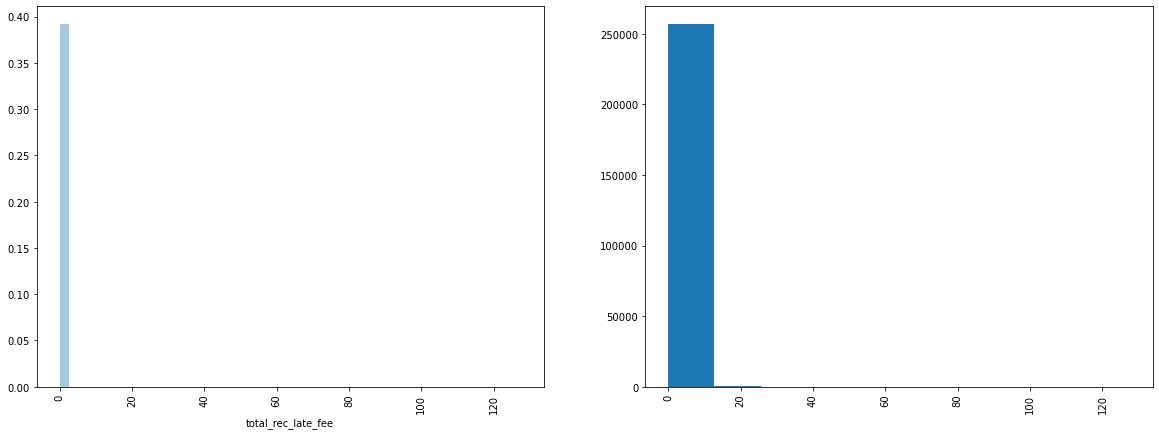

In [672]:
plt.figure(figsize=(20, 7))
plt.subplot(121)
sns.distplot(df_test.total_rec_late_fee)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.hist(df_test.total_rec_late_fee)
plt.xticks(rotation = 90)
plt.show()

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text major ticklabel objects>)

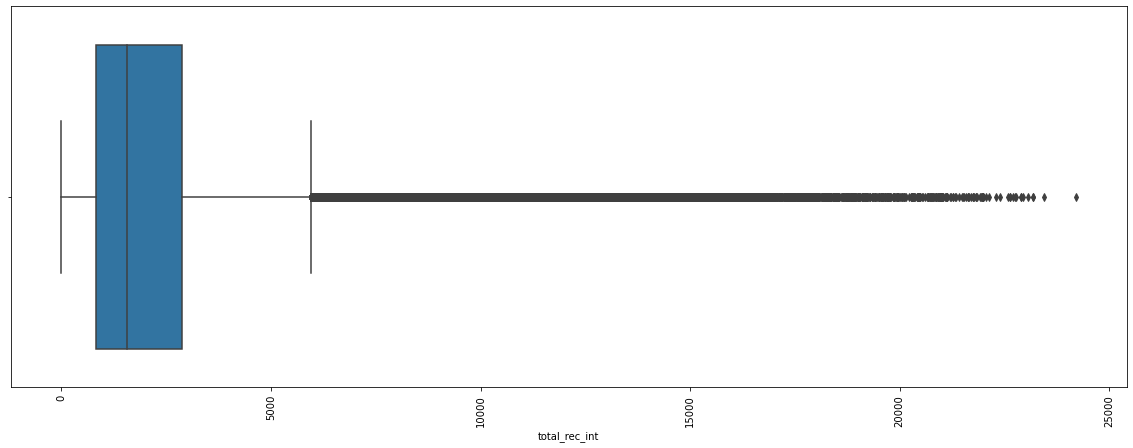

In [673]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.total_rec_int)
plt.xticks(rotation = 90)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text major ticklabel objects>)

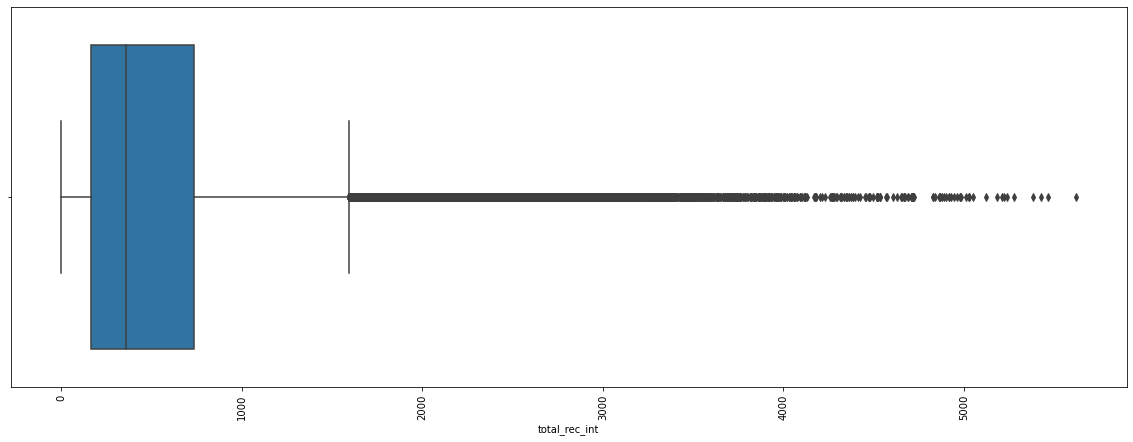

In [674]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_rec_int)
plt.xticks(rotation = 90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

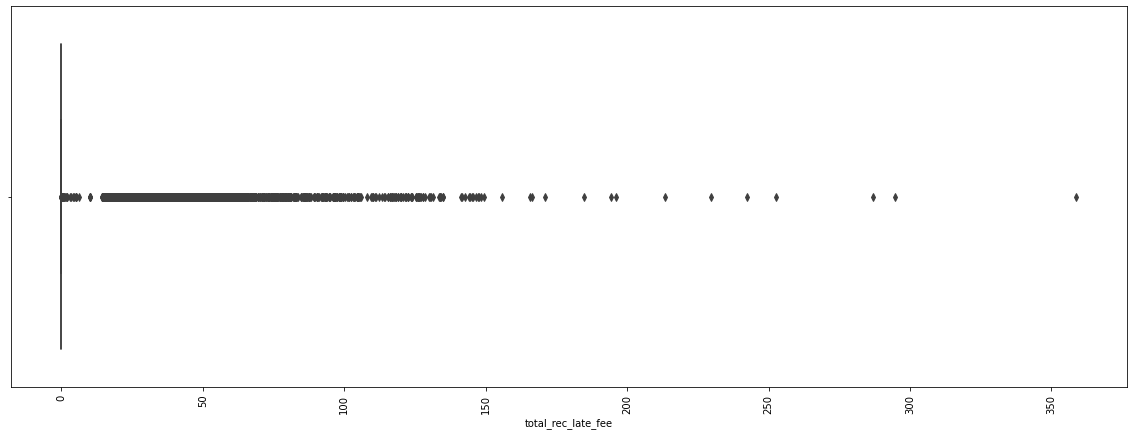

In [675]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.total_rec_late_fee)
plt.xticks(rotation = 90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

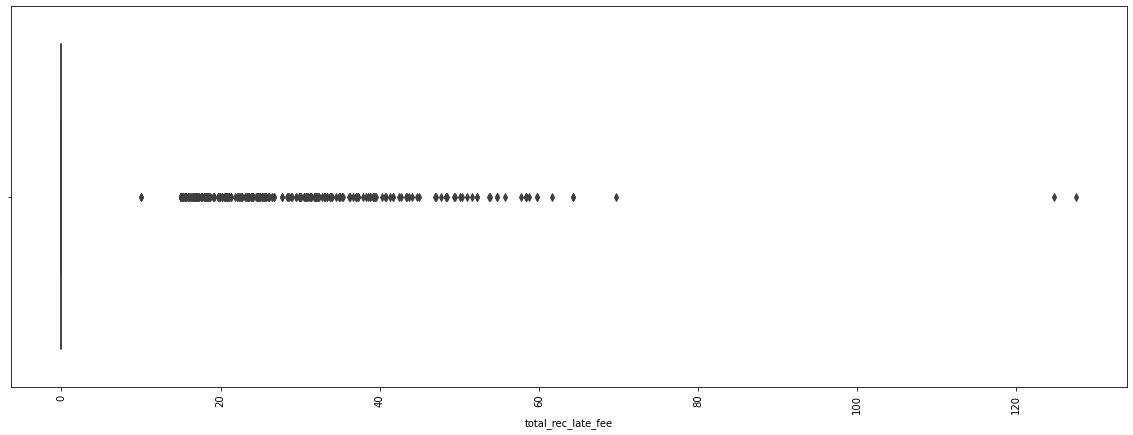

In [676]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_rec_late_fee)
plt.xticks(rotation = 90)

In [677]:
max_test = df_test['total_rec_late_fee'].quantile(0.99)
df_test.loc[df_test.total_rec_late_fee > 61, 'total_rec_late_fee'] = np.nan
df_test.total_rec_late_fee.fillna(max_test,inplace=True)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

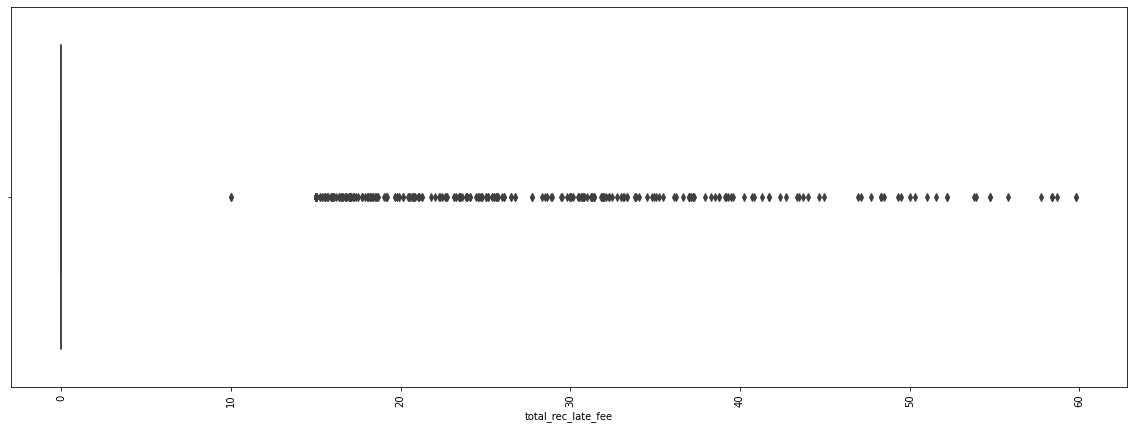

In [678]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.total_rec_late_fee)
plt.xticks(rotation = 90)

Recoveries = post charge off gross recovery

In [679]:
df_train.recoveries.describe()

count    598978.000000
mean         67.249287
std         491.327816
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [680]:
df_test.recoveries.describe()

count    256989.000000
mean          0.102372
std          51.896531
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       26308.470000
Name: recoveries, dtype: float64

In [681]:
print("Skewness: ", round(df_train.recoveries.skew(),2))
print("Kurtosis: ", round(df_train.recoveries.kurt(),2))
print("Skewness: ", round(df_test.recoveries.skew(),2))
print("Kurtosis: ", round(df_test.recoveries.kurt(),2))

Skewness:  14.58
Kurtosis:  402.72
Skewness:  506.94
Kurtosis:  256989.0


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

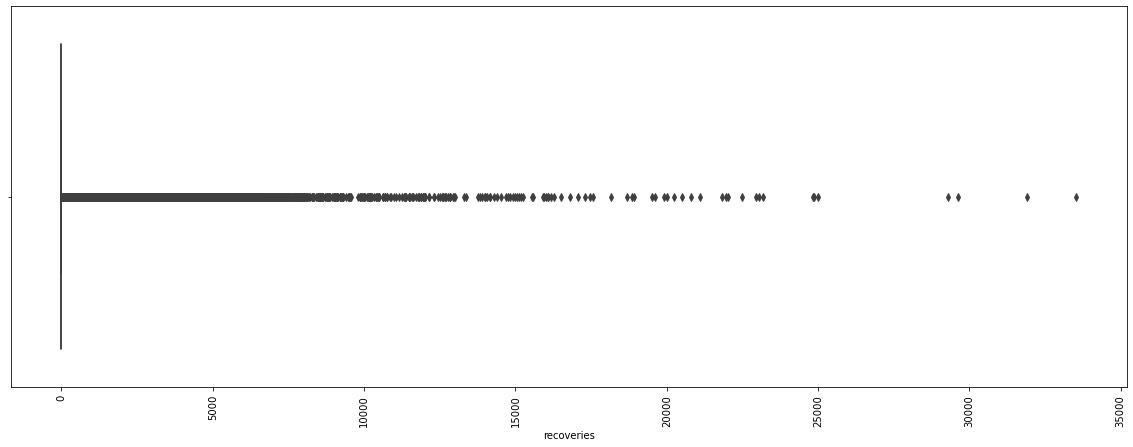

In [682]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.recoveries)
plt.xticks(rotation = 90)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text major ticklabel objects>)

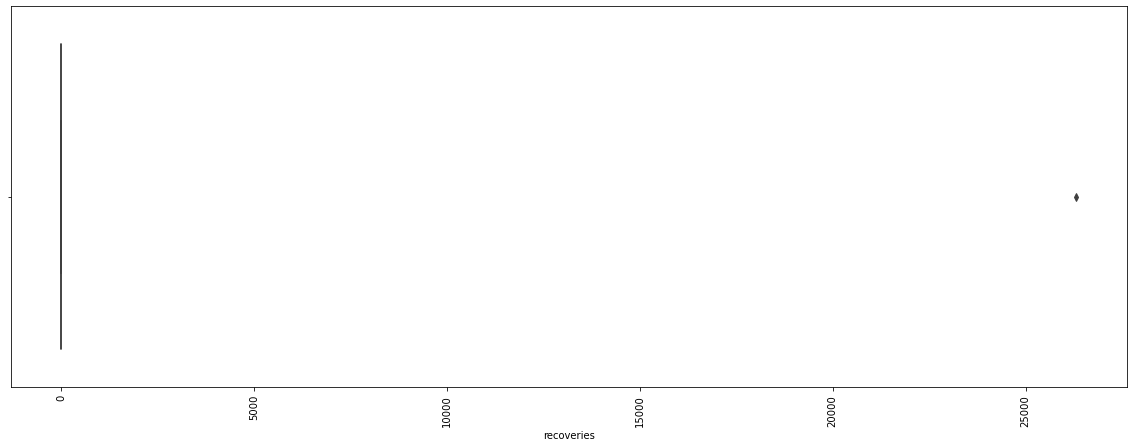

In [683]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.recoveries)
plt.xticks(rotation = 90)

In [684]:
round(((len(df_train[df_train["recoveries"] == 0]) / df_train.shape[0]) * 100 ), 2)

95.96

In [685]:
round(((len(df_test[df_test["recoveries"] == 0]) / df_test.shape[0]) * 100 ), 2)

100.0

Collection recovery fee = post charge off collection fee

In [686]:
df_train.collection_recovery_fee.describe()

count    598978.000000
mean          7.075547
std          74.587986
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

In [687]:
df_test.collection_recovery_fee.describe()

count    256989.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: collection_recovery_fee, dtype: float64

In [688]:
round(((len(df_train[df_train["collection_recovery_fee"] == 0]) / df_train.shape[0]) * 100 ), 2)

96.15

In [689]:
round(((len(df_test[df_test["collection_recovery_fee"] == 0]) / df_test.shape[0]) * 100 ), 2)

100.0

Last Payment Amount = Last total payment amount received

In [690]:
df_train.last_pymnt_amnt.describe()

count    598978.000000
mean       2815.793083
std        5398.379951
min           0.000000
25%         305.080000
50%         507.380000
75%        1506.602500
max       36475.590000
Name: last_pymnt_amnt, dtype: float64

In [691]:
df_test.last_pymnt_amnt.describe()

count    256989.000000
mean        851.302822
std        2864.890130
min           0.000000
25%         255.040000
50%         384.920000
75%         602.300000
max       36257.590000
Name: last_pymnt_amnt, dtype: float64

In [692]:
print("Skewness: ", round(df_train.last_pymnt_amnt.skew(),2))
print("Kurtosis: ", round(df_train.last_pymnt_amnt.kurt(),2))
print("Skewness: ", round(df_test.last_pymnt_amnt.skew(),2))
print("Kurtosis: ", round(df_test.last_pymnt_amnt.kurt(),2))

Skewness:  2.82
Kurtosis:  8.5
Skewness:  8.08
Kurtosis:  72.65


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

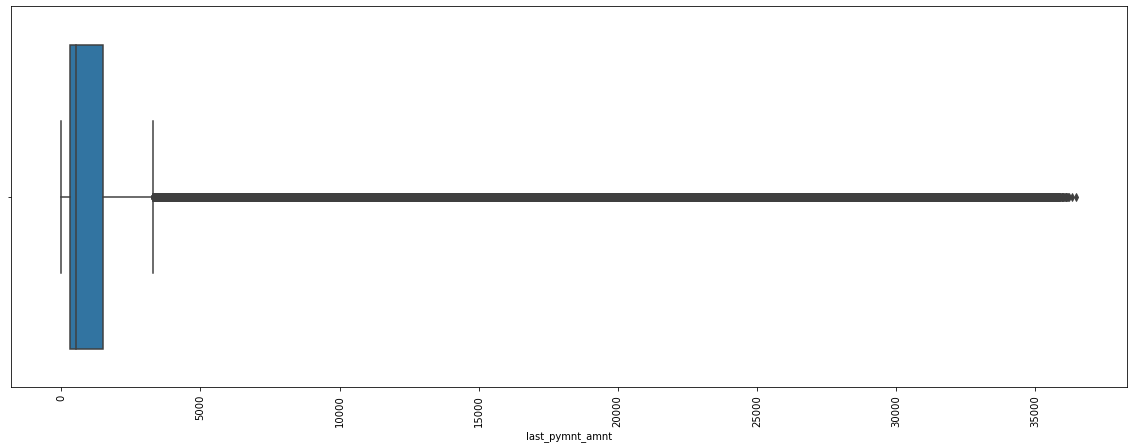

In [693]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.last_pymnt_amnt)
plt.xticks(rotation = 90)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 <a list of 10 Text major ticklabel objects>)

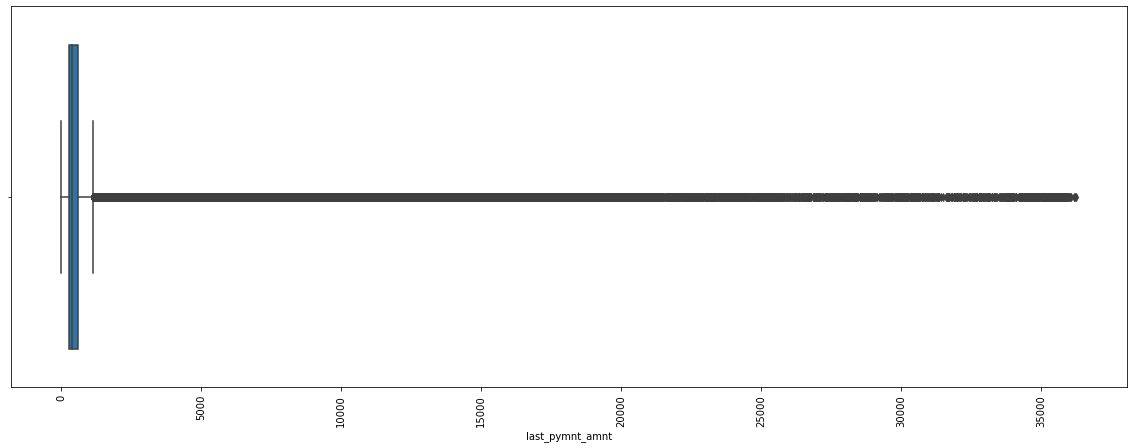

In [694]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.last_pymnt_amnt)
plt.xticks(rotation = 90)

collections_12_mths_ex_med

In [695]:
df_train.collections_12_mths_ex_med.describe()

count    598922.000000
mean          0.011255
std           0.119935
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

In [696]:
df_test.collections_12_mths_ex_med.describe()

count    256989.000000
mean          0.021164
std           0.161103
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: collections_12_mths_ex_med, dtype: float64

In [697]:
df_train['collections_12_mths_ex_med'].fillna(0, inplace = True)
df_train.collections_12_mths_ex_med.isnull().sum()

0

In [698]:
round(((len(df_train[df_train["collections_12_mths_ex_med"] == 0]) / df_train.shape[0]) * 100 ), 2)

98.96

In [699]:
round(((len(df_test[df_test["collections_12_mths_ex_med"] == 0]) / df_test.shape[0]) * 100 ), 2)

98.08

POLICY CODE = "publicly available policy_code=1, new products not publicly available policy_code=2"

In [700]:
df_train.policy_code.value_counts()

1.0    598978
Name: policy_code, dtype: int64

In [701]:
df_test.policy_code.value_counts()

1.0    256989
Name: policy_code, dtype: int64

In [702]:
df_train = df_train.drop(['dti_joint', 'verification_status_joint', 'annual_inc_joint'], axis = 1 )
df_test = df_test.drop(['dti_joint', 'verification_status_joint', 'annual_inc_joint'], axis = 1 )
print(df_train.shape, df_test.shape)

(598978, 53) (256989, 53)


acc_now_delinq = The number of accounts on which the borrower is now delinquent.

In [703]:
df_train.acc_now_delinq.value_counts()

0.0     596424
1.0       2389
2.0        136
3.0         21
4.0          4
5.0          2
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

In [704]:
df_test.acc_now_delinq.value_counts()

0.0    255613
1.0      1304
2.0        62
3.0         7
4.0         2
5.0         1
Name: acc_now_delinq, dtype: int64

In [705]:
round((len(df_train[df_train['acc_now_delinq'] == 0]) / df_train.shape[0]) * 100, 2)

99.57

In [706]:
round((len(df_test[df_test['acc_now_delinq'] == 0]) / df_test.shape[0]) * 100, 2)

99.46

Total Collection Amount = Total collection amounts ever owed

In [707]:
df_train.tot_coll_amt.describe()

count    5.316650e+05
mean     2.089273e+02
std      1.268440e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

In [708]:
df_test.tot_coll_amt.describe()

count    256989.000000
mean        259.520318
std        2190.020275
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      380757.000000
Name: tot_coll_amt, dtype: float64

In [709]:
print(df_train.tot_coll_amt.isnull().sum(), df_test.tot_coll_amt.isnull().sum())

67313 0


In [710]:
df_train['tot_coll_amt'].fillna(df_train['tot_coll_amt'].mean(), inplace = True)
print(df_train.tot_coll_amt.isnull().sum(), df_test.tot_coll_amt.isnull().sum())

0 0


In [711]:
print("Skewness: ", round(df_train.tot_coll_amt.skew(),2))
print("Kurtosis: ", round(df_train.tot_coll_amt.kurt(),2))
print("Skewness: ", round(df_test.tot_coll_amt.skew(),2))
print("Kurtosis: ", round(df_test.tot_coll_amt.kurt(),2))

Skewness:  750.16
Kurtosis:  574368.8
Skewness:  48.06
Kurtosis:  5421.55


In [712]:
round((len(df_train[df_train['tot_coll_amt'] == 0]) / df_train.shape[0]) * 100, 2)

76.98

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000.]),
 <a list of 7 Text major ticklabel objects>)

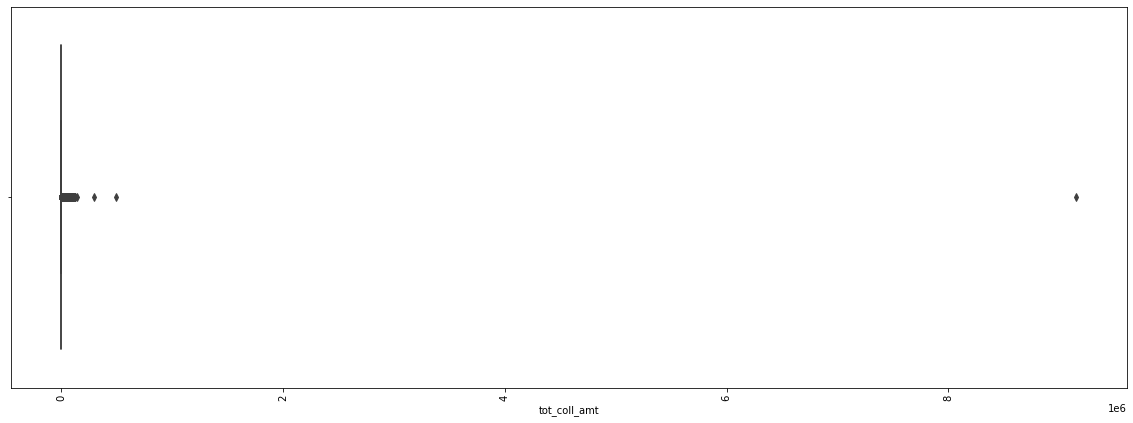

In [713]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.tot_coll_amt)
plt.xticks(rotation = 90)

In [714]:
max_train = df_train['tot_coll_amt'].quantile(0.99)
df_train.loc[df_train.tot_coll_amt > 140000, 'tot_coll_amt'] = np.nan
df_train.tot_coll_amt.fillna(max_train,inplace=True)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 <a list of 9 Text major ticklabel objects>)

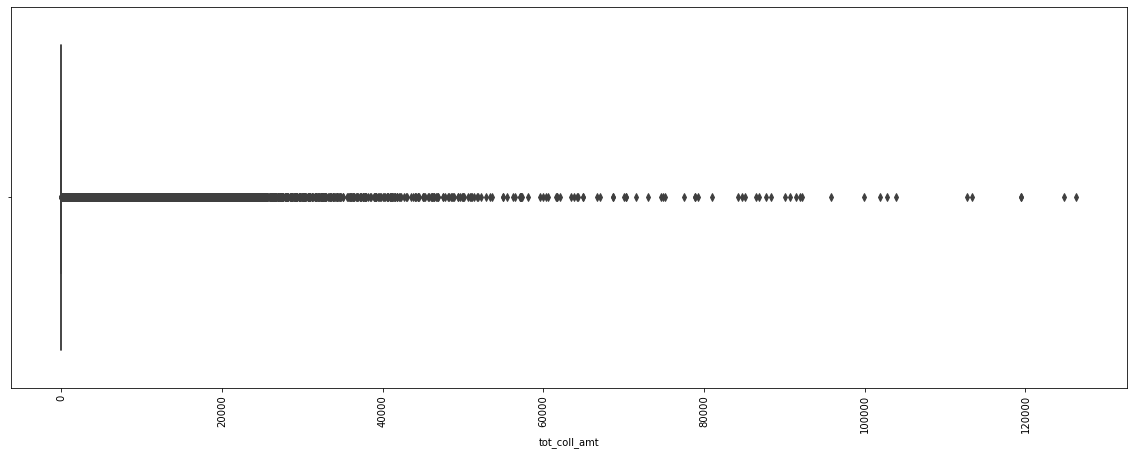

In [715]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.tot_coll_amt)
plt.xticks(rotation = 90)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000.]),
 <a list of 10 Text major ticklabel objects>)

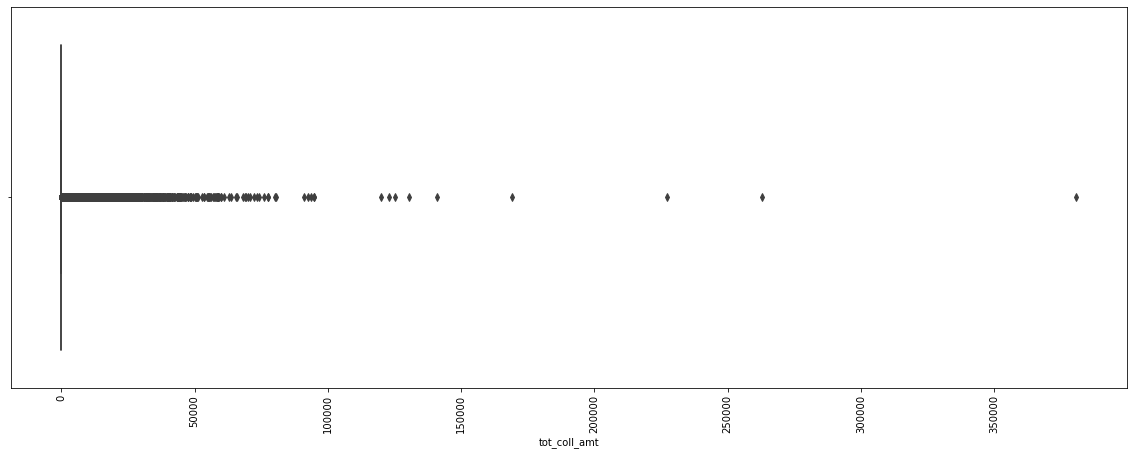

In [716]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.tot_coll_amt)
plt.xticks(rotation = 90)

In [717]:
max_test = df_test['tot_coll_amt'].quantile(0.99)
df_test.loc[df_test.tot_coll_amt > 116887, 'tot_coll_amt'] = np.nan
df_test.tot_coll_amt.fillna(max_test,inplace=True)

Total Current Bill = Total current balance of all accounts

In [718]:
df_train.tot_cur_bal.describe()

count    5.316650e+05
mean     1.389905e+05
std      1.525544e+05
min      0.000000e+00
25%      2.919700e+04
50%      8.098600e+04
75%      2.084020e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [719]:
df_test.tot_cur_bal.describe()

count    2.569890e+05
mean     1.413722e+05
std      1.567516e+05
min      0.000000e+00
25%      3.130800e+04
50%      8.105000e+04
75%      2.093400e+05
max      4.447397e+06
Name: tot_cur_bal, dtype: float64

In [720]:
print(df_train.tot_cur_bal.isnull().sum(), df_test.tot_cur_bal.isnull().sum())

67313 0


In [721]:
df_train['tot_cur_bal'].fillna(df_train['tot_cur_bal'].mean(), inplace = True)
print(df_train.tot_cur_bal.isnull().sum(), df_test.tot_cur_bal.isnull().sum())

0 0


In [722]:
print("Skewness: ", round(df_train.tot_cur_bal.skew(),2))
print("Kurtosis: ", round(df_train.tot_cur_bal.kurt(),2))
print("Skewness: ", round(df_test.tot_cur_bal.skew(),2))
print("Kurtosis: ", round(df_test.tot_cur_bal.kurt(),2))

Skewness:  3.09
Kurtosis:  37.19
Skewness:  2.92
Kurtosis:  23.58


In [723]:
round(((len(df_train[df_train["tot_cur_bal"] == df_train["tot_coll_amt"]]) / df_train.shape[0]) * 100 ), 2)

0.02

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text major ticklabel objects>)

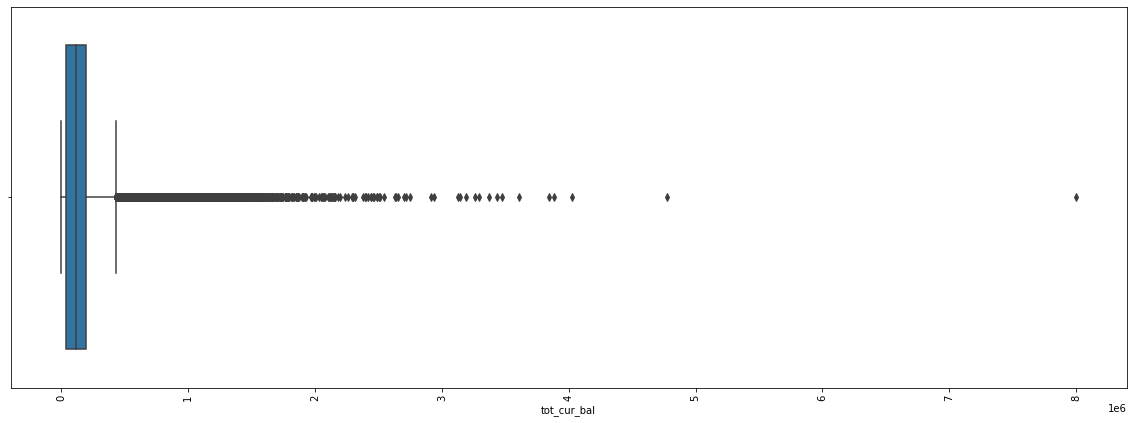

In [724]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.tot_cur_bal)
plt.xticks(rotation = 90)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]),
 <a list of 7 Text major ticklabel objects>)

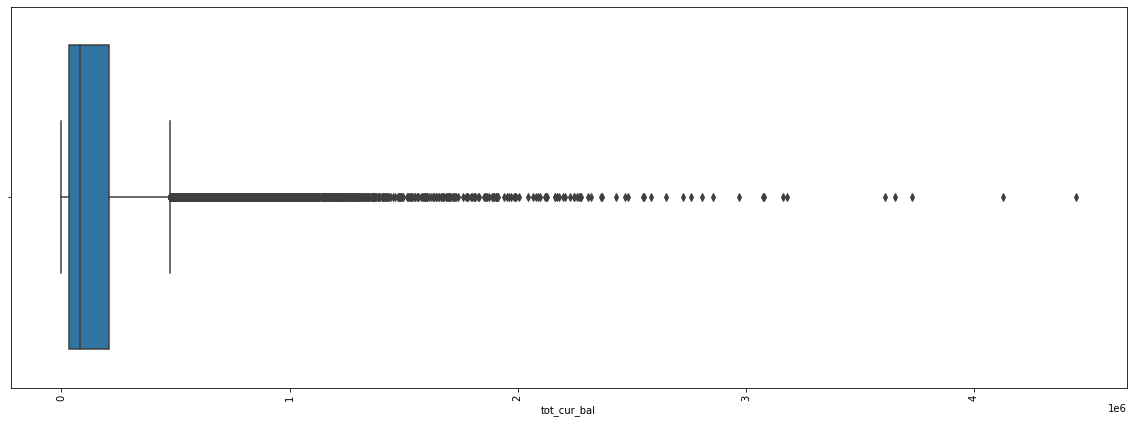

In [725]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.tot_cur_bal)
plt.xticks(rotation = 90)

In [726]:
max_train = df_train['tot_cur_bal'].quantile(0.99)
df_train.loc[df_train.tot_cur_bal > 3990000, 'tot_coll_amt'] = np.nan
df_train.tot_cur_bal.fillna(max_train,inplace=True)

In [727]:
max_test = df_test['tot_cur_bal'].quantile(0.99)
df_test.loc[df_test.tot_cur_bal > 2920000, 'tot_cur_bal'] = np.nan
df_test.tot_cur_bal.fillna(max_test,inplace=True)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text major ticklabel objects>)

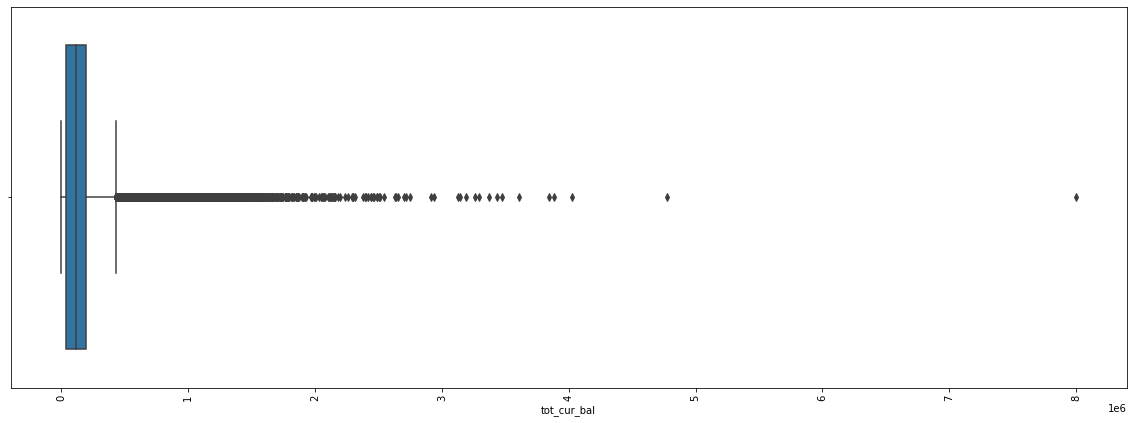

In [728]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_train.tot_cur_bal)
plt.xticks(rotation = 90)

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000.]),
 <a list of 8 Text major ticklabel objects>)

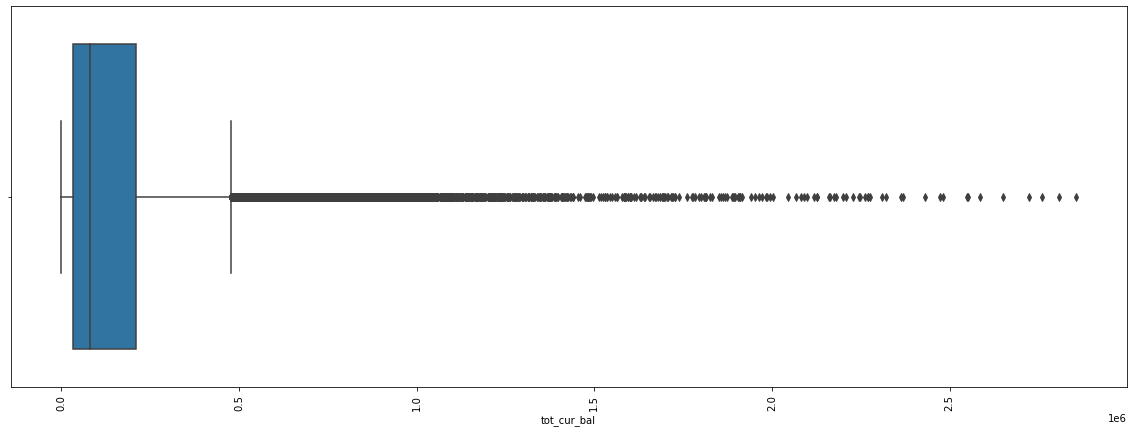

In [729]:
plt.figure(figsize=(20, 7))
sns.boxplot(df_test.tot_cur_bal)
plt.xticks(rotation = 90)

total_rev_hi_lim

In [730]:
print(df_train.total_rev_hi_lim.isnull().sum(), df_test.total_rev_hi_lim.isnull().sum())

67313 0


In [731]:
df_train['total_rev_hi_lim'].fillna(df_train['total_rev_hi_lim'].mean(), inplace = True)
print(df_train.total_rev_hi_lim.isnull().sum(), df_test.total_rev_hi_lim.isnull().sum())

0 0


In [732]:
missing_data = df_train.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df_train.isnull().sum() / df_train.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data.head()

,Total,Percentage
emp_title,34465,5.75
title,18,0.00
tot_coll_amt,3,0.00
default_ind,0,0.00
annual_inc,0,0.00


In [733]:
missing_data = df_test.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df_test.isnull().sum() / df_test.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data.head()

,Total,Percentage
emp_title,14976,5.83
title,15,0.01
default_ind,0,0.00
annual_inc,0,0.00
earliest_cr_line,0,0.00


In [734]:
df_train_1 = pd.DataFrame.copy(df_train)
df_train_2 = pd.DataFrame.copy(df_train)

In [735]:
print(df_train_1.shape, df_train_2.shape)

(598978, 53) (598978, 53)


In [736]:
df_test_1 = pd.DataFrame.copy(df_test)
df_test_2 = pd.DataFrame.copy(df_test)

In [737]:
print(df_test_1.shape, df_test_1.shape)

(256989, 53) (256989, 53)


In [738]:
df_train_1 = df_train_1.drop(['issue_d', 'sub_grade', 'emp_title', 'pymnt_plan', 'title', 
                             'zip_code', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 
                             'last_credit_pull_d', 'id', 'member_id', 'delinq_2yrs', 'recoveries',
                             'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 
                             'policy_code', 'application_type'], axis = 1)
df_train_1.shape

(598978, 34)

In [739]:
missing_data = df_train_1.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df_train_1.isnull().sum() / df_train_1.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data.head()

,Total,Percentage
tot_coll_amt,3,0.0
default_ind,0,0.0
emp_length,0,0.0
dti,0,0.0
addr_state,0,0.0


In [740]:
df_test.out_prncp_inv.fillna(df_test.out_prncp_inv.mean(), inplace = True)
df_test_1.out_prncp_inv.fillna(df_test.out_prncp_inv.mean(), inplace = True)
df_test_2.out_prncp_inv.fillna(df_test.out_prncp_inv.mean(), inplace = True)

In [741]:
df_test_1 = df_test_1.drop(['issue_d', 'sub_grade', 'emp_title', 'pymnt_plan', 'title', 
                             'zip_code', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 
                             'last_credit_pull_d', 'id', 'member_id', 'delinq_2yrs', 'recoveries',
                             'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 
                             'policy_code', 'application_type'], axis = 1)
df_test_1.shape

(256989, 34)

In [742]:
missing_data = df_test_1.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df_test_1.isnull().sum() / df_test_1.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data.head()

,Total,Percentage
default_ind,0,0.0
home_ownership,0,0.0
inq_last_6mths,0,0.0
dti,0,0.0
addr_state,0,0.0


In [743]:
df_train_2 = df_train_2.drop(['issue_d', 'sub_grade', 'emp_title', 'pymnt_plan', 'title', 
                             'zip_code','id', 'member_id', 'delinq_2yrs', 'recoveries',
                             'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 
                             'policy_code'], axis = 1)
df_train_2.shape

(598978, 39)

In [744]:
df_train_1.tot_coll_amt.fillna(df_train_1.tot_coll_amt.mean(), inplace = True)
df_train_2.tot_coll_amt.fillna(df_train_2.tot_coll_amt.mean(), inplace = True)

In [745]:
missing_data = df_train_2.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df_train_2.isnull().sum() / df_train_2.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data.head()

,Total,Percentage
default_ind,0,0.0
annual_inc,0,0.0
mths_since_last_delinq,0,0.0
inq_last_6mths,0,0.0
earliest_cr_line,0,0.0


In [746]:
df_test_2 = df_test_2.drop(['issue_d', 'sub_grade', 'emp_title', 'pymnt_plan', 'title', 
                             'zip_code','id', 'member_id', 'delinq_2yrs', 'recoveries',
                             'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 
                             'policy_code'], axis = 1)
df_test_2.shape

(256989, 39)

In [747]:
missing_data = df_test_2.isnull().sum().sort_values(ascending = False)
missing_percent = round(((df_test_2.isnull().sum() / df_test_2.isnull().count() ) * 100), 2).sort_values(ascending = False)
missing_data = pd.concat([missing_data, missing_percent], keys = ["Total", "Percentage"], axis = 1)
missing_data.head()

,Total,Percentage
default_ind,0,0.0
annual_inc,0,0.0
mths_since_last_delinq,0,0.0
inq_last_6mths,0,0.0
earliest_cr_line,0,0.0


# Label Encoding

In [748]:
colname_1 = []

for x in df_train_1.columns:
    if df_train_1[x].dtypes == "object":
        colname_1.append(x)

for feature in colname_1:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train_1[feature].value_counts())))

The feature is term and number of categories are 2
The feature is grade and number of categories are 7
The feature is home_ownership and number of categories are 4
The feature is verification_status and number of categories are 3
The feature is purpose and number of categories are 14
The feature is addr_state and number of categories are 50
The feature is initial_list_status and number of categories are 2


In [749]:
colname_2 = []

for x in df_train_2.columns:
    if df_train_2[x].dtypes == "object":
        colname_2.append(x)

for feature in colname_2:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train_2[feature].value_counts())))

The feature is term and number of categories are 2
The feature is grade and number of categories are 7
The feature is home_ownership and number of categories are 4
The feature is verification_status and number of categories are 3
The feature is purpose and number of categories are 14
The feature is addr_state and number of categories are 50
The feature is earliest_cr_line and number of categories are 677
The feature is initial_list_status and number of categories are 2
The feature is last_pymnt_d and number of categories are 97
The feature is next_pymnt_d and number of categories are 3
The feature is last_credit_pull_d and number of categories are 102
The feature is application_type and number of categories are 1


In [750]:
for feature in colname_1:
    print('The feature is {} and number of categories are \n{}\n\n'.format(feature,df_train_1[feature].value_counts()))

The feature is term and number of categories are 
 36 months    427239
 60 months    171739
Name: term, dtype: int64


The feature is grade and number of categories are 
B    173419
C    163121
A    100727
D     96354
E     45902
F     15689
G      3766
Name: grade, dtype: int64


The feature is home_ownership and number of categories are 
MORTGAGE    301448
RENT        241692
OWN          55648
OTHER          190
Name: home_ownership, dtype: int64


The feature is verification_status and number of categories are 
Source Verified    210453
Verified           203959
Not Verified       184566
Name: verification_status, dtype: int64


The feature is purpose and number of categories are 
debt_consolidation    356155
credit_card           135758
home_improvement       33805
other                  29008
major_purchase         11883
small_business          7800
car                     6401
medical                 5644
moving                  3676
vacation                3143
house            

In [751]:
for feature in colname_2:
    print('The feature is {} and number of categories are \n{}\n\n'.format(feature,df_train_2[feature].value_counts()))

The feature is term and number of categories are 
 36 months    427239
 60 months    171739
Name: term, dtype: int64


The feature is grade and number of categories are 
B    173419
C    163121
A    100727
D     96354
E     45902
F     15689
G      3766
Name: grade, dtype: int64


The feature is home_ownership and number of categories are 
MORTGAGE    301448
RENT        241692
OWN          55648
OTHER          190
Name: home_ownership, dtype: int64


The feature is verification_status and number of categories are 
Source Verified    210453
Verified           203959
Not Verified       184566
Name: verification_status, dtype: int64


The feature is purpose and number of categories are 
debt_consolidation    356155
credit_card           135758
home_improvement       33805
other                  29008
major_purchase         11883
small_business          7800
car                     6401
medical                 5644
moving                  3676
vacation                3143
house            

In [752]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for x in colname_1:
    df_train_1[x] = le.fit_transform(df_train_1[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature term
mapping {' 36 months': 0, ' 60 months': 1}
Feature grade
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Feature home_ownership
mapping {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
Feature verification_status
mapping {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
Feature purpose
mapping {'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}
Feature addr_state
mapping {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'NE': 28, 'NH': 29, 'NJ': 30, 'NM': 31, 'NV': 32, 'NY': 33, 'OH': 34, 'OK': 35, 'OR': 36, 'PA': 37, 'RI': 38, 'SC': 39, 'SD': 

In [753]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for x in colname_2:
    df_train_2[x] = le.fit_transform(df_train_2[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature term
mapping {' 36 months': 0, ' 60 months': 1}
Feature grade
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Feature home_ownership
mapping {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
Feature verification_status
mapping {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
Feature purpose
mapping {'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}
Feature addr_state
mapping {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'NE': 28, 'NH': 29, 'NJ': 30, 'NM': 31, 'NV': 32, 'NY': 33, 'OH': 34, 'OK': 35, 'OR': 36, 'PA': 37, 'RI': 38, 'SC': 39, 'SD': 

In [754]:
df_train_1.dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                        int32
int_rate                  float64
installment               float64
grade                       int32
emp_length                float64
home_ownership              int32
annual_inc                float64
verification_status         int32
purpose                     int32
addr_state                  int32
dti                       float64
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status         int32
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late_fee        float64
last_pymnt_amn

In [755]:
df_train_2.dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                        int32
int_rate                  float64
installment               float64
grade                       int32
emp_length                float64
home_ownership              int32
annual_inc                float64
verification_status         int32
purpose                     int32
addr_state                  int32
dti                       float64
earliest_cr_line            int32
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status         int32
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late

In [756]:
colname_3 = []

for x in df_test_1.columns:
    if df_test_1[x].dtypes == "object":
        colname_3.append(x)

for feature in colname_3:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_test_1[feature].value_counts())))

The feature is term and number of categories are 2
The feature is grade and number of categories are 7
The feature is home_ownership and number of categories are 4
The feature is verification_status and number of categories are 3
The feature is purpose and number of categories are 13
The feature is addr_state and number of categories are 49
The feature is initial_list_status and number of categories are 2


In [757]:
colname_4 = []

for x in df_test_2.columns:
    if df_test_2[x].dtypes == "object":
        colname_4.append(x)

for feature in colname_4:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_test_2[feature].value_counts())))

The feature is term and number of categories are 2
The feature is grade and number of categories are 7
The feature is home_ownership and number of categories are 4
The feature is verification_status and number of categories are 3
The feature is purpose and number of categories are 13
The feature is addr_state and number of categories are 49
The feature is earliest_cr_line and number of categories are 655
The feature is initial_list_status and number of categories are 2
The feature is last_pymnt_d and number of categories are 8
The feature is next_pymnt_d and number of categories are 3
The feature is last_credit_pull_d and number of categories are 9
The feature is application_type and number of categories are 2


In [758]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for x in colname_3:
    df_test_1[x] = le.fit_transform(df_test_1[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature term
mapping {' 36 months': 0, ' 60 months': 1}
Feature grade
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Feature home_ownership
mapping {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
Feature verification_status
mapping {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
Feature purpose
mapping {'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'home_improvement': 3, 'house': 4, 'major_purchase': 5, 'medical': 6, 'moving': 7, 'other': 8, 'renewable_energy': 9, 'small_business': 10, 'vacation': 11, 'wedding': 12}
Feature addr_state
mapping {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MA': 17, 'MD': 18, 'ME': 19, 'MI': 20, 'MN': 21, 'MO': 22, 'MS': 23, 'MT': 24, 'NC': 25, 'ND': 26, 'NE': 27, 'NH': 28, 'NJ': 29, 'NM': 30, 'NV': 31, 'NY': 32, 'OH': 33, 'OK': 34, 'OR': 35, 'PA': 36, 'RI': 37, 'SC': 38, 'SD': 39, 'TN': 40, 'TX': 41, 'UT':

In [759]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for x in colname_4:
    df_test_2[x] = le.fit_transform(df_test_2[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature term
mapping {' 36 months': 0, ' 60 months': 1}
Feature grade
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Feature home_ownership
mapping {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
Feature verification_status
mapping {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
Feature purpose
mapping {'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'home_improvement': 3, 'house': 4, 'major_purchase': 5, 'medical': 6, 'moving': 7, 'other': 8, 'renewable_energy': 9, 'small_business': 10, 'vacation': 11, 'wedding': 12}
Feature addr_state
mapping {'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IL': 12, 'IN': 13, 'KS': 14, 'KY': 15, 'LA': 16, 'MA': 17, 'MD': 18, 'ME': 19, 'MI': 20, 'MN': 21, 'MO': 22, 'MS': 23, 'MT': 24, 'NC': 25, 'ND': 26, 'NE': 27, 'NH': 28, 'NJ': 29, 'NM': 30, 'NV': 31, 'NY': 32, 'OH': 33, 'OK': 34, 'OR': 35, 'PA': 36, 'RI': 37, 'SC': 38, 'SD': 39, 'TN': 40, 'TX': 41, 'UT':

In [760]:
df_test_1.dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                        int32
int_rate                  float64
installment               float64
grade                       int32
emp_length                float64
home_ownership              int32
annual_inc                float64
verification_status         int32
purpose                     int32
addr_state                  int32
dti                       float64
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status         int32
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late_fee        float64
last_pymnt_amn

In [761]:
df_test_2.dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                        int32
int_rate                  float64
installment               float64
grade                       int32
emp_length                float64
home_ownership              int32
annual_inc                float64
verification_status         int32
purpose                     int32
addr_state                  int32
dti                       float64
earliest_cr_line            int32
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
initial_list_status         int32
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late

# SKEWNESS AND CORRELATION

In [762]:
"""from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = df_train_1.columns
vif_df["VIF Factor"] = [vif(df_train_1.values, i) for i in range(df_train_1.shape[1])]
vif_df.sort_values(by = 'VIF Factor', ascending = False)"""

'from statsmodels.stats.outliers_influence import variance_inflation_factor as vif\nvif_df = pd.DataFrame()\nvif_df["features"] = df_train_1.columns\nvif_df["VIF Factor"] = [vif(df_train_1.values, i) for i in range(df_train_1.shape[1])]\nvif_df.sort_values(by = \'VIF Factor\', ascending = False)'

In [763]:
"""vif_df_1 = pd.DataFrame()
vif_df_1["features"] = df_train_2.columns
vif_df_1["VIF Factor"] = [vif(df_train_2.values, i) for i in range(df_train_2.shape[1])]
vif_df_1.round(2)"""

'vif_df_1 = pd.DataFrame()\nvif_df_1["features"] = df_train_2.columns\nvif_df_1["VIF Factor"] = [vif(df_train_2.values, i) for i in range(df_train_2.shape[1])]\nvif_df_1.round(2)'

In [764]:
for x in df_train_1.columns:
    print("Column name: ", x)
    print("Skewness Value: ", df_train_1[x].skew())
    print("Kurtosis Value: ", df_train_1[x].kurtosis())
    print("*" * 75)

Column name:  loan_amnt
Skewness Value:  0.7082189624568909
Kurtosis Value:  -0.18573601515721716
***************************************************************************
Column name:  funded_amnt
Skewness Value:  0.7111155588207285
Kurtosis Value:  -0.1780301881484454
***************************************************************************
Column name:  funded_amnt_inv
Skewness Value:  0.7096850589138046
Kurtosis Value:  -0.1768054425011485
***************************************************************************
Column name:  term
Skewness Value:  0.9432397233556762
Kurtosis Value:  -1.1103025316183028
***************************************************************************
Column name:  int_rate
Skewness Value:  0.3851112397436118
Kurtosis Value:  -0.2318978289730227
***************************************************************************
Column name:  installment
Skewness Value:  0.9453419784970021
Kurtosis Value:  0.749253429827347
***********************************

In [765]:
for x in df_train_2.columns:
    print("Column name: ", x)
    print("Skewness Value: ", df_train_2[x].skew())
    print("Kurtosis Value: ", df_train_2[x].kurtosis())
    print("*" * 75)

Column name:  loan_amnt
Skewness Value:  0.7082189624568909
Kurtosis Value:  -0.18573601515721716
***************************************************************************
Column name:  funded_amnt
Skewness Value:  0.7111155588207285
Kurtosis Value:  -0.1780301881484454
***************************************************************************
Column name:  funded_amnt_inv
Skewness Value:  0.7096850589138046
Kurtosis Value:  -0.1768054425011485
***************************************************************************
Column name:  term
Skewness Value:  0.9432397233556762
Kurtosis Value:  -1.1103025316183028
***************************************************************************
Column name:  int_rate
Skewness Value:  0.3851112397436118
Kurtosis Value:  -0.2318978289730227
***************************************************************************
Column name:  installment
Skewness Value:  0.9453419784970021
Kurtosis Value:  0.749253429827347
***********************************

In [766]:
for x in df_test_1.columns:
    print("Column name: ", x)
    print("Skewness Value: ", df_test_1[x].skew())
    print("Kurtosis Value: ", df_test_1[x].kurtosis())
    print("*" * 75)

Column name:  loan_amnt
Skewness Value:  0.621679381554638
Kurtosis Value:  -0.39643454248611176
***************************************************************************
Column name:  funded_amnt
Skewness Value:  0.621679381554638
Kurtosis Value:  -0.39643454248611176
***************************************************************************
Column name:  funded_amnt_inv
Skewness Value:  0.6215004392814472
Kurtosis Value:  -0.3968493666971953
***************************************************************************
Column name:  term
Skewness Value:  0.7380574236164691
Kurtosis Value:  -1.4552825651460914
***************************************************************************
Column name:  int_rate
Skewness Value:  0.562307879796765
Kurtosis Value:  0.137076183604794
***************************************************************************
Column name:  installment
Skewness Value:  0.9202728112530207
Kurtosis Value:  0.5621149150868288
**************************************

In [767]:
for x in df_test_2.columns:
    print("Column name: ", x)
    print("Skewness Value: ", df_test_2[x].skew())
    print("Kurtosis Value: ", df_test_2[x].kurtosis())
    print("*" * 75)

Column name:  loan_amnt
Skewness Value:  0.621679381554638
Kurtosis Value:  -0.39643454248611176
***************************************************************************
Column name:  funded_amnt
Skewness Value:  0.621679381554638
Kurtosis Value:  -0.39643454248611176
***************************************************************************
Column name:  funded_amnt_inv
Skewness Value:  0.6215004392814472
Kurtosis Value:  -0.3968493666971953
***************************************************************************
Column name:  term
Skewness Value:  0.7380574236164691
Kurtosis Value:  -1.4552825651460914
***************************************************************************
Column name:  int_rate
Skewness Value:  0.562307879796765
Kurtosis Value:  0.137076183604794
***************************************************************************
Column name:  installment
Skewness Value:  0.9202728112530207
Kurtosis Value:  0.5621149150868288
**************************************

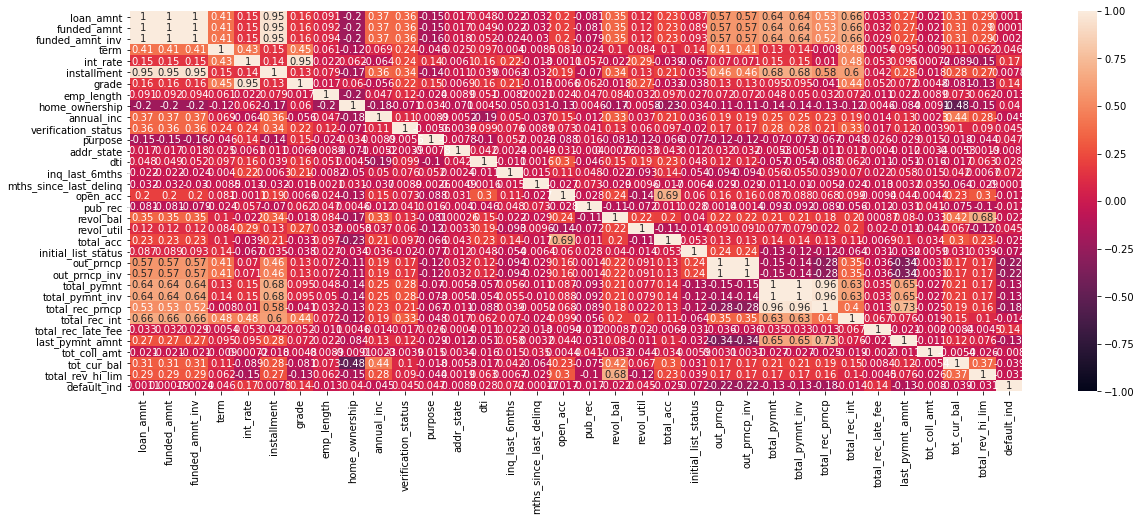

In [768]:
plt.figure(figsize = (20, 7))
corr_df = df_train_1.corr(method="pearson")
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

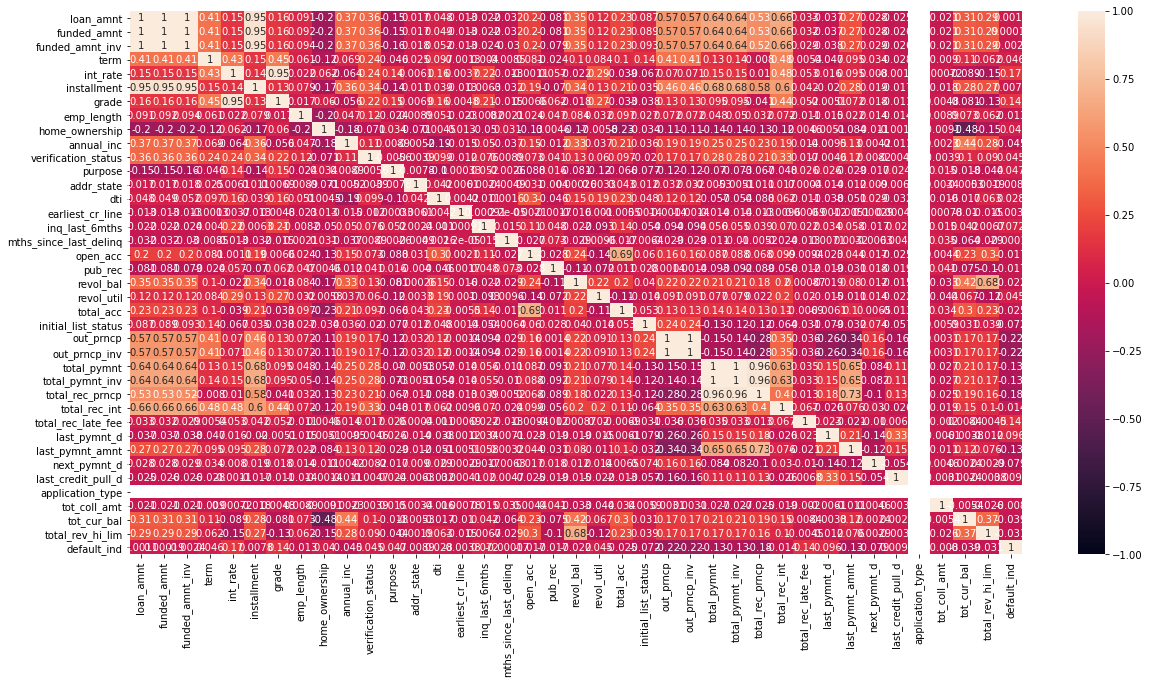

In [769]:
plt.figure(figsize = (20, 10))
corr_df = df_train_2.corr(method="pearson")
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

# STANDARD SCALING

In [770]:
df_train_1_col = df_train_1.columns
df_train_2_col = df_train_2.columns
df_test_1_col = df_test_1.columns
df_test_2_col = df_test_2.columns

In [771]:
df_train_1y_col = df_train_1.default_ind
df_train_2y_col = df_train_2.default_ind
df_test_1y_col = df_test_1.default_ind
df_test_2y_col = df_test_2.default_ind

In [772]:
Y = df_train_1.default_ind
len(Y)

598978

In [773]:
df_train_1.drop('default_ind', axis = 1, inplace = True)
df_train_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,10.0,3,24000.0,2,1,3,27.65,1.0,31.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,171.62,208.927341,138990.46045,31110.617058
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,0.5,3,30000.0,1,0,10,1.00,5.0,31.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,119.66,208.927341,138990.46045,31110.617058
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,10.0,3,12252.0,0,11,14,8.72,2.0,31.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,649.91,208.927341,138990.46045,31110.617058
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10.0,3,49200.0,1,9,4,20.00,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,357.48,208.927341,138990.46045,31110.617058
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,1.0,3,80000.0,1,9,36,17.94,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,67.79,208.927341,138990.46045,31110.617058


In [774]:
X = df_train_1
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,10.0,3,24000.0,2,1,3,27.65,1.0,31.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,171.62,208.927341,138990.46045,31110.617058
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,0.5,3,30000.0,1,0,10,1.00,5.0,31.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,119.66,208.927341,138990.46045,31110.617058
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,10.0,3,12252.0,0,11,14,8.72,2.0,31.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,649.91,208.927341,138990.46045,31110.617058
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10.0,3,49200.0,1,9,4,20.00,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,357.48,208.927341,138990.46045,31110.617058
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,1.0,3,80000.0,1,9,36,17.94,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,67.79,208.927341,138990.46045,31110.617058


In [775]:
Y_1 = df_train_2.default_ind
len(Y_1)

598978

In [776]:
df_train_2.drop('default_ind', axis = 1, inplace = True)
df_train_2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,10.0,3,24000.0,2,1,3,27.65,257,1.0,31.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,39,171.62,0,41,0,208.927341,138990.46045,31110.617058
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,0.5,3,30000.0,1,0,10,1.00,40,5.0,31.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,5,119.66,0,99,0,208.927341,138990.46045,31110.617058
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,10.0,3,12252.0,0,11,14,8.72,555,2.0,31.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,55,649.91,0,41,0,208.927341,138990.46045,31110.617058
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10.0,3,49200.0,1,9,4,20.00,203,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,39,357.48,0,40,0,208.927341,138990.46045,31110.617058
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,1.0,3,80000.0,1,9,36,17.94,268,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,40,67.79,0,41,0,208.927341,138990.46045,31110.617058


In [777]:
df_train_2.shape

(598978, 38)

In [778]:
X_1 = df_train_2
X_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,10.0,3,24000.0,2,1,3,27.65,257,1.0,31.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,39,171.62,0,41,0,208.927341,138990.46045,31110.617058
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,0.5,3,30000.0,1,0,10,1.00,40,5.0,31.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,5,119.66,0,99,0,208.927341,138990.46045,31110.617058
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,10.0,3,12252.0,0,11,14,8.72,555,2.0,31.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,55,649.91,0,41,0,208.927341,138990.46045,31110.617058
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10.0,3,49200.0,1,9,4,20.00,203,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,39,357.48,0,40,0,208.927341,138990.46045,31110.617058
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,1.0,3,80000.0,1,9,36,17.94,268,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,40,67.79,0,41,0,208.927341,138990.46045,31110.617058


In [779]:
Y_df = df_test_1.default_ind
df_test_1.drop('default_ind', axis = 1, inplace = True)
X_df = df_test_1
X_df.shape

(256989, 33)

In [780]:
Y_df_1 = df_test_2.default_ind
df_test_2.drop('default_ind', axis = 1, inplace = True)
X_df_1 = df_test_2
X_df_1.shape

(256989, 38)

In [781]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_df = scaler.transform(X_df)

In [782]:
X

array([[-1.1444464 , -1.14341202, -1.1398812 , ...,  0.01091826,
         0.        ,  0.        ],
       [-1.44433354, -1.44362136, -1.43672608, ...,  0.01091826,
         0.        ,  0.        ],
       [-1.45632902, -1.45562974, -1.44871981, ...,  0.01091826,
         0.        ,  0.        ],
       ...,
       [-0.18480755, -0.18274212, -0.17738418, ..., -0.1247073 ,
        -0.7292476 , -0.38247961],
       [-0.30476241, -0.30282585, -0.2973215 , ..., -0.1247073 ,
        -0.56059435, -0.11992015],
       [ 0.65487644,  0.65784405,  0.66217709, ..., -0.1247073 ,
        -0.73530771,  0.30892696]])

In [783]:
X_df

array([[ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         2.030696  ,  0.4197854 ],
       [ 0.41496673,  0.41767657,  0.42230244, ..., -0.08575819,
        -0.71485224,  0.09887939],
       [-0.90453669, -0.90324454, -0.89700812, ..., -0.1247073 ,
        -0.58283098,  0.35268687],
       ...,
       [ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         2.21111462,  0.53939582],
       [ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         0.19591704,  0.37019084],
       [ 1.21566539,  1.21923552,  1.22288408, ..., -0.1247073 ,
         0.20928267,  2.09724861]])

In [784]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_1)
X_1 = scaler.transform(X_1)
X_df_1 = scaler.transform(X_df_1)

In [785]:
X_1

array([[-1.1444464 , -1.14341202, -1.1398812 , ...,  0.01091826,
         0.        ,  0.        ],
       [-1.44433354, -1.44362136, -1.43672608, ...,  0.01091826,
         0.        ,  0.        ],
       [-1.45632902, -1.45562974, -1.44871981, ...,  0.01091826,
         0.        ,  0.        ],
       ...,
       [-0.18480755, -0.18274212, -0.17738418, ..., -0.1247073 ,
        -0.7292476 , -0.38247961],
       [-0.30476241, -0.30282585, -0.2973215 , ..., -0.1247073 ,
        -0.56059435, -0.11992015],
       [ 0.65487644,  0.65784405,  0.66217709, ..., -0.1247073 ,
        -0.73530771,  0.30892696]])

In [786]:
X_df_1

array([[ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         2.030696  ,  0.4197854 ],
       [ 0.41496673,  0.41767657,  0.42230244, ..., -0.08575819,
        -0.71485224,  0.09887939],
       [-0.90453669, -0.90324454, -0.89700812, ..., -0.1247073 ,
        -0.58283098,  0.35268687],
       ...,
       [ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         2.21111462,  0.53939582],
       [ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         0.19591704,  0.37019084],
       [ 1.21566539,  1.21923552,  1.22288408, ..., -0.1247073 ,
         0.20928267,  2.09724861]])

# SPLITTING THE DATA

In [787]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
print("The number of rows in X_train data is: {} \nThe Number of column in X_train data is: {}".format(X_train.shape[0], X_train.shape[1]))
print()
print("*" * 50)
print("The number of rows in X_test data is: {} \nThe Number of column in X_test data is: {}".format(X_test.shape[0], X_test.shape[1]))
print()
print("*" * 50)
print("The number of rows in Y_train data is: {}".format(Y_train.shape[0]))
print()
print("*" * 50)
print("The number of rows in Y_test data is: {} ".format(Y_test.shape[0]))

The number of rows in X_train data is: 419284 
The Number of column in X_train data is: 33

**************************************************
The number of rows in X_test data is: 179694 
The Number of column in X_test data is: 33

**************************************************
The number of rows in Y_train data is: 419284

**************************************************
The number of rows in Y_test data is: 179694 


# LOGISTIC REGRESSION

In [788]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [789]:
Y_pred = classifier.predict(X_test)

In [790]:
print(df_train_1_col[:])
print("*" * 75)

print(classifier.coef_)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'addr_state', 'dti', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')
***************************************************************************
[[ 2.09352442e+00  1.63810387e+01  1.05098369e+01  1.29879599e-01
   9.17808910e-01  1.05764496e+00 -5.75133525e-01  1.77097325e-02
   9.91768728e-02 -4.14663707e-01 -4.29483344e-02  1.13616695e-01
  -4.96582308e-02 -6.85186893e-02  1.36502591e-01  1.16135207e-03
  -5.71724962e-02 -1.28961591e-01  3.16369473e-02 -4

In [791]:
col = pd.DataFrame(df_train_1_col[ : ])
coeff = pd.DataFrame(classifier.coef_).T
pd.concat([col, coeff], keys = ['Columns', 'Coefficients'], axis = 1)

,Columns,Coefficients
,0,0
0,loan_amnt,2.093524
1,funded_amnt,16.381039
2,funded_amnt_inv,10.509837
3,term,0.129880
4,int_rate,0.917809
5,installment,1.057645
6,grade,-0.575134
7,emp_length,0.017710
8,home_ownership,0.099177


In [792]:
print("Beta0 Value is =", classifier.intercept_)

Beta0 Value is = [-10.27905804]


In [793]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[165904     15]
 [   729  13046]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165919
           1       1.00      0.95      0.97     13775

    accuracy                           1.00    179694
   macro avg       1.00      0.97      0.99    179694
weighted avg       1.00      1.00      1.00    179694

Accuracy of the model:  0.995859628034325


In [794]:
y_pred_prob = classifier.predict_proba(X_test)
print("         class : 0      class: 1  ")
y_pred_prob

         class : 0      class: 1  


array([[9.93597605e-01, 6.40239492e-03],
       [9.99518553e-01, 4.81446902e-04],
       [9.95544637e-01, 4.45536332e-03],
       ...,
       [9.93953256e-01, 6.04674436e-03],
       [0.00000000e+00, 1.00000000e+00],
       [9.75823806e-01, 2.41761943e-02]])

In [795]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)

auc = metrics.auc(fpr,tpr)
auc

0.9734938171840329

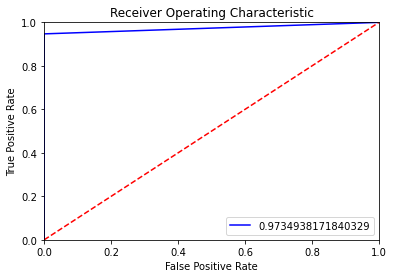

In [796]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')

plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [797]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm = confusion_matrix(Y_test, predict_mine)
    total_err = cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 684  , type 2 error : 659  , type 1 error: 25
Errors at threshold  0.41000000000000003 : 687  , type 2 error : 662  , type 1 error: 25
Errors at threshold  0.42000000000000004 : 689  , type 2 error : 666  , type 1 error: 23
Errors at threshold  0.43000000000000005 : 697  , type 2 error : 675  , type 1 error: 22
Errors at threshold  0.44000000000000006 : 702  , type 2 error : 680  , type 1 error: 22
Errors at threshold  0.45000000000000007 : 708  , type 2 error : 686  , type 1 error: 22
Errors at threshold  0.4600000000000001 : 713  , type 2 error : 693  , type 1 error: 20
Errors at threshold  0.4700000000000001 : 717  , type 2 error : 698  , type 1 error: 19
Errors at threshold  0.4800000000000001 : 723  , type 2 error : 705  , type 1 error: 18
Errors at threshold  0.4900000000000001 : 737  , type 2 error : 720  , type 1 error: 17
Errors at threshold  0.5000000000000001 : 744  , type 2 error : 729  , type 1 error: 15
Errors at threshold  0.5100000000000001 : 

In [798]:
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [799]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm1 = confusion_matrix(Y_test,y_pred_class)
print(cfm1)
acc1 = accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc1)
print(classification_report(Y_test, y_pred_class))

[[165894     25]
 [   659  13116]]
Accuracy of the model:  0.9961935289992988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165919
           1       1.00      0.95      0.97     13775

    accuracy                           1.00    179694
   macro avg       1.00      0.98      0.99    179694
weighted avg       1.00      1.00      1.00    179694



In [800]:
from sklearn import metrics
#y_pred_class is the list of predicted values on the basis of 0.46 threshold
fpr1, tpr1,z = metrics.roc_curve(Y_test, y_pred_class)
auc1 = metrics.auc(fpr1,tpr1)
print(auc1)

0.9760045168433215


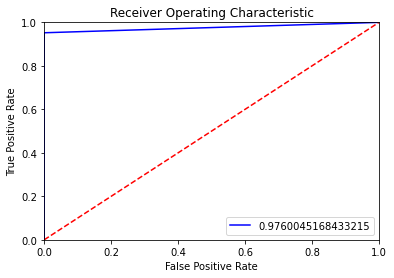

In [801]:
# Printing ROC Curve & AUC for threshold value for 0.46
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# TEST DATA PREDICTION

In [802]:
X_df

array([[ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         2.030696  ,  0.4197854 ],
       [ 0.41496673,  0.41767657,  0.42230244, ..., -0.08575819,
        -0.71485224,  0.09887939],
       [-0.90453669, -0.90324454, -0.89700812, ..., -0.1247073 ,
        -0.58283098,  0.35268687],
       ...,
       [ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         2.21111462,  0.53939582],
       [ 1.25465072,  1.25826274,  1.26186371, ..., -0.1247073 ,
         0.19591704,  0.37019084],
       [ 1.21566539,  1.21923552,  1.22288408, ..., -0.1247073 ,
         0.20928267,  2.09724861]])

In [805]:
Y_df

311

In [809]:
Y_pred_test = classifier.predict(X_df)

In [810]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_test = confusion_matrix(Y_df,Y_pred_test)
print(cfm_test)

print("Classification report: ")

print(classification_report(Y_df,Y_pred_test))

acc_test = accuracy_score(Y_df,Y_pred_test)
print("Accuracy of the model: ",acc_test)

[[256632     46]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256678
           1       0.84      0.80      0.82       311

    accuracy                           1.00    256989
   macro avg       0.92      0.90      0.91    256989
weighted avg       1.00      1.00      1.00    256989

Accuracy of the model:  0.999575857332415


In [811]:
from sklearn import metrics

fpr_test, tpr_test, z_test = metrics.roc_curve(Y_df, Y_pred_test)

auc_test = metrics.auc(fpr_test,tpr_test)
auc_test

0.8986242199335969

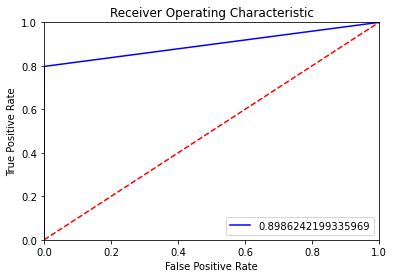

In [812]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_test, tpr_test, 'b', label = auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# DECISION TREE

In [813]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion = "gini", random_state = 10)

# fit the model on basis of Training Data
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

In [814]:
# PRediction of TEST Data
Y_pred_tree = model_tree.predict(X_test)

In [815]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_tree = confusion_matrix(Y_test,Y_pred_tree)
print(cfm_tree)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_tree))

acc_tree = accuracy_score(Y_test,Y_pred_tree)
print("Accuracy of the model: ",acc_tree)

[[165452    467]
 [   401  13374]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165919
           1       0.97      0.97      0.97     13775

    accuracy                           1.00    179694
   macro avg       0.98      0.98      0.98    179694
weighted avg       1.00      1.00      1.00    179694

Accuracy of the model:  0.9951695660400458


In [816]:
# To know how much depth or level the decission tree is build
model_tree.get_depth()

42

In [817]:
list(zip(df_train_1, model_tree.feature_importances_))

[('loan_amnt', 0.001020184965609954),
 ('funded_amnt', 0.2711624263575561),
 ('funded_amnt_inv', 0.02879416958538698),
 ('term', 8.867946646712682e-05),
 ('int_rate', 0.0010858357920139996),
 ('installment', 0.0031196315863322786),
 ('grade', 0.0002901164784357695),
 ('emp_length', 0.0005044000200618635),
 ('home_ownership', 0.00016190491847817794),
 ('annual_inc', 0.001451493450948417),
 ('verification_status', 0.0002431927521442202),
 ('purpose', 0.00039687343128648456),
 ('addr_state', 0.0005858323474605735),
 ('dti', 0.0018579869997029253),
 ('inq_last_6mths', 0.00042673750628728055),
 ('mths_since_last_delinq', 0.0010055565386498386),
 ('open_acc', 0.0006301056400526551),
 ('pub_rec', 0.0001882133997741434),
 ('revol_bal', 0.0017631316165101004),
 ('revol_util', 0.0015885072800836948),
 ('total_acc', 0.0005543529208303789),
 ('initial_list_status', 6.414495813787063e-05),
 ('out_prncp', 0.00162945337869219),
 ('out_prncp_inv', 0.11327025731816263),
 ('total_pymnt', 0.0017653940076

In [818]:
# PRediction of TEST Data
Y_pred_tree_test = model_tree.predict(X_df)

In [819]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_tree_test = confusion_matrix(Y_df,Y_pred_tree_test)
print(cfm_tree_test)

print("Classification report: ")

print(classification_report(Y_df,Y_pred_tree_test))

acc_tree_test = accuracy_score(Y_df,Y_pred_tree_test)
print("Accuracy of the model: ",acc_tree_test)

[[ 90865 165813]
 [     3    308]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.35      0.52    256678
           1       0.00      0.99      0.00       311

    accuracy                           0.35    256989
   macro avg       0.50      0.67      0.26    256989
weighted avg       1.00      0.35      0.52    256989

Accuracy of the model:  0.35477393974061144


In [820]:
# Tuning the Decission tree is same like Prunning the Tree
from sklearn.tree import DecisionTreeClassifier
model_tree_prune = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 5, max_depth = 20, 
                                          random_state = 10)

# fit the model on basis of Training Data
model_tree_prune.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=10)

In [821]:
# PRediction of TEST Data
Y_pred_prune = model_tree_prune.predict(X_test)

In [822]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_prune = confusion_matrix(Y_test,Y_pred_prune)
print(cfm_prune)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_prune))

acc_prune = accuracy_score(Y_test,Y_pred_prune)
print("Accuracy of the model: ",acc_prune)

[[165850     69]
 [   422  13353]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165919
           1       0.99      0.97      0.98     13775

    accuracy                           1.00    179694
   macro avg       1.00      0.98      0.99    179694
weighted avg       1.00      1.00      1.00    179694

Accuracy of the model:  0.9972675771032978


In [823]:
# To know how much depth or level the decission tree is build
model_tree_prune.get_depth()

20

In [825]:
list(zip(df_train_1_col, model_tree_prune.feature_importances_))

[('loan_amnt', 0.0011896141720073132),
 ('funded_amnt', 0.27683253651721995),
 ('funded_amnt_inv', 0.02907127889637151),
 ('term', 0.0),
 ('int_rate', 0.00016880246895966327),
 ('installment', 0.0016760950346498729),
 ('grade', 0.00010939250927647453),
 ('emp_length', 5.0681894538863506e-05),
 ('home_ownership', 3.449964877624535e-05),
 ('annual_inc', 0.0002279149664581783),
 ('verification_status', 3.4618119310819477e-06),
 ('purpose', 2.217032812018978e-05),
 ('addr_state', 0.00012413029533039357),
 ('dti', 0.00032810440674880663),
 ('inq_last_6mths', 0.0001109907253749748),
 ('mths_since_last_delinq', 0.00013569159292198735),
 ('open_acc', 7.102703755542956e-05),
 ('pub_rec', 1.1153508660408058e-05),
 ('revol_bal', 0.0002828936111660316),
 ('revol_util', 0.0001738631589186569),
 ('total_acc', 0.00016880392719911455),
 ('initial_list_status', 0.0),
 ('out_prncp', 0.00036439716524373924),
 ('out_prncp_inv', 0.11560066821900924),
 ('total_pymnt', 0.0007609727021417229),
 ('total_pymnt_

In [826]:
# PRediction of TEST Data
Y_pred_prune_test = model_tree_prune.predict(X_df)

In [827]:
cfm_prune_test = confusion_matrix(Y_df,Y_pred_prune_test)
print(cfm_prune_test)

print("Classification report: ")

print(classification_report(Y_df,Y_pred_prune_test))

acc_prune_test = accuracy_score(Y_df,Y_pred_prune_test)
print("Accuracy of the model: ",acc_prune_test)

[[129068 127610]
 [    12    299]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67    256678
           1       0.00      0.96      0.00       311

    accuracy                           0.50    256989
   macro avg       0.50      0.73      0.34    256989
weighted avg       1.00      0.50      0.67    256989

Accuracy of the model:  0.5033950869492468


In [828]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model on basis of Training Data
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [829]:
Y_pred_entropy = model_entropy.predict(X_test)

In [830]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_entropy = confusion_matrix(Y_test, Y_pred_entropy)
print(cfm_entropy)

print("Classification report: ")

print(classification_report(Y_test, Y_pred_entropy))

acc_entropy = accuracy_score(Y_test, Y_pred_entropy)
print("Accuracy of the model: ",acc_entropy)

[[165528    391]
 [   375  13400]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165919
           1       0.97      0.97      0.97     13775

    accuracy                           1.00    179694
   macro avg       0.98      0.99      0.98    179694
weighted avg       1.00      1.00      1.00    179694

Accuracy of the model:  0.9957371976805013


In [831]:
# To know how much depth or level the decission tree is build
model_entropy.get_depth()

42

In [833]:
# PRediction of TEST Data
Y_pred_entropy_test = model_entropy.predict(X_df)

In [834]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm_entropy_test = confusion_matrix(Y_df, Y_pred_entropy_test)
print(cfm_entropy_test)

print("Classification report: ")

print(classification_report(Y_df, Y_pred_entropy_test))

acc_entropy_test = accuracy_score(Y_df, Y_pred_entropy_test)
print("Accuracy of the model: ",acc_entropy_test)

[[103803 152875]
 [     9    302]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.40      0.58    256678
           1       0.00      0.97      0.00       311

    accuracy                           0.41    256989
   macro avg       0.50      0.69      0.29    256989
weighted avg       1.00      0.41      0.58    256989

Accuracy of the model:  0.40509515971500726


# Gradient Boosting

In [841]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting = GradientBoostingClassifier()

model_GradientBoosting.fit(X_train,Y_train)

Y_pred_gb = model_GradientBoosting.predict(X_test)

In [842]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm_gb = confusion_matrix(Y_test,Y_pred_gb)
print(cfm_gb)
#classification_report
print("Classification report: ")
print(classification_report(Y_test,Y_pred_gb))
#accuracy_score
acc_gb = accuracy_score(Y_test, Y_pred_gb)
print("Accuracy of the model: ",acc_gb)

[[165892     27]
 [  1017  12758]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    165919
           1       1.00      0.93      0.96     13775

    accuracy                           0.99    179694
   macro avg       1.00      0.96      0.98    179694
weighted avg       0.99      0.99      0.99    179694

Accuracy of the model:  0.9941901232094561


In [845]:
from sklearn import metrics
fpr_gb , tpr_gb , z_gb = metrics.roc_curve(Y_test , Y_pred_gb)
auc_gb = metrics.auc(fpr_gb,tpr_gb)
auc_gb

0.9630039344521302

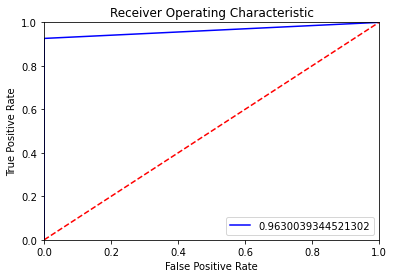

In [846]:
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr_gb, tpr_gb, 'b', label = auc_gb) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [843]:
# PRediction of TEST Data
Y_pred_test_gb = model_GradientBoosting.predict(X_df)

In [844]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm_gb_1 = confusion_matrix(Y_df,Y_pred_test_gb)
print(cfm_gb_1)
#classification_report
print("Classification report: ")
print(classification_report(Y_df,Y_pred_test_gb))
#accuracy_score
acc_gb_1 = accuracy_score(Y_df,Y_pred_test_gb)
print("Accuracy of the model: ",acc_gb_1)

[[168804  87874]
 [    11    300]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.66      0.79    256678
           1       0.00      0.96      0.01       311

    accuracy                           0.66    256989
   macro avg       0.50      0.81      0.40    256989
weighted avg       1.00      0.66      0.79    256989

Accuracy of the model:  0.6580203821953469


# ADA Booster Classifier 

In [847]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
Y_pred_ada = ada.predict(X_test)

In [848]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm_ada = confusion_matrix(Y_test,Y_pred_ada)
print(cfm_ada)
print("Classification report: ")
print(classification_report(Y_test,Y_pred_ada))
acc_ada = accuracy_score(Y_test,Y_pred_ada)
print("Accuracy of the model: ",acc_ada)

[[165789    130]
 [  1479  12296]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    165919
           1       0.99      0.89      0.94     13775

    accuracy                           0.99    179694
   macro avg       0.99      0.95      0.97    179694
weighted avg       0.99      0.99      0.99    179694

Accuracy of the model:  0.9910458891226196


In [849]:
from sklearn import metrics
fpr_ada, tpr_ada, z_ada = metrics.roc_curve(Y_test , Y_pred_ada)
auc_ada = metrics.auc(fpr_ada, tpr_ada)
auc_ada

0.9459240320498811

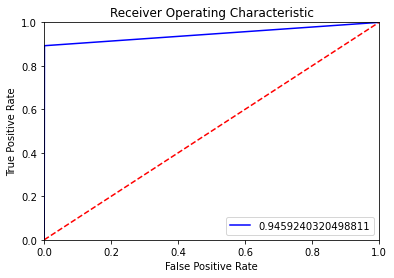

In [850]:

#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr_ada, tpr_ada, 'b', label = auc_ada) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [851]:
# PRediction of TEST Data
Y_pred_test_ada = ada.predict(X_df)

In [852]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm_ada_1 = confusion_matrix(Y_df,Y_pred_test_ada)
print(cfm_ada_1)
#classification_report
print("Classification report: ")
print(classification_report(Y_df,Y_pred_test_ada))
#accuracy_score
acc_ada_1 = accuracy_score(Y_df,Y_pred_test_ada)
print("Accuracy of the model: ",acc_ada_1)

[[236637  20041]
 [    47    264]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    256678
           1       0.01      0.85      0.03       311

    accuracy                           0.92    256989
   macro avg       0.51      0.89      0.49    256989
weighted avg       1.00      0.92      0.96    256989

Accuracy of the model:  0.9218332302160793


# FINAL OUTPUT

In [853]:
Y_pred_test.shape

(256989,)

In [856]:
df_test_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
452272,25000.0,25000.0,25000.0,0,5.32,752.87,0,1.0,0,150000.0,0,1,44,9.54,0.0,31.0,7.0,0.0,19339.0,42.5,18.0,1,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,701.14,0.0,430856.0,45500.0
452273,18000.0,18000.0,18000.0,1,19.48,471.70,4,7.0,3,150000.0,0,2,4,9.39,1.0,31.0,18.0,1.0,14052.0,40.7,27.0,1,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,335.34,60.0,36247.0,34500.0
452274,7000.0,7000.0,7000.0,0,7.49,217.72,0,10.0,0,59000.0,0,1,18,13.06,1.0,23.0,10.0,0.0,10467.0,24.2,34.0,1,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,55222.0,43200.0
452275,20000.0,20000.0,20000.0,0,17.97,722.75,3,7.0,0,180000.0,0,2,41,25.10,0.0,31.0,13.0,0.0,59126.0,92.1,30.0,1,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.00,418.0,277227.0,64200.0
452276,15000.0,15000.0,15000.0,0,6.99,463.09,0,2.0,0,93000.0,0,1,17,14.86,1.0,31.0,8.0,0.0,14914.0,43.2,17.0,1,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,306430.0,34500.0


In [857]:
df_test_1['Prediction'] = Y_pred_test
df_test_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Prediction
452272,25000.0,25000.0,25000.0,0,5.32,752.87,0,1.0,0,150000.0,0,1,44,9.54,0.0,31.0,7.0,0.0,19339.0,42.5,18.0,1,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,701.14,0.0,430856.0,45500.0,0
452273,18000.0,18000.0,18000.0,1,19.48,471.70,4,7.0,3,150000.0,0,2,4,9.39,1.0,31.0,18.0,1.0,14052.0,40.7,27.0,1,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,335.34,60.0,36247.0,34500.0,0
452274,7000.0,7000.0,7000.0,0,7.49,217.72,0,10.0,0,59000.0,0,1,18,13.06,1.0,23.0,10.0,0.0,10467.0,24.2,34.0,1,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,55222.0,43200.0,0
452275,20000.0,20000.0,20000.0,0,17.97,722.75,3,7.0,0,180000.0,0,2,41,25.10,0.0,31.0,13.0,0.0,59126.0,92.1,30.0,1,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.00,418.0,277227.0,64200.0,0
452276,15000.0,15000.0,15000.0,0,6.99,463.09,0,2.0,0,93000.0,0,1,17,14.86,1.0,31.0,8.0,0.0,14914.0,43.2,17.0,1,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,306430.0,34500.0,0


In [859]:
len(df_test_1[df_test_1['Prediction'] == 0])

256695

In [860]:
len(df_test_1[df_test_1['Prediction'] == 1])

294